<a href="https://colab.research.google.com/github/sivannavis/NLP-for-human-rights/blob/main/WordEmbed_for_10k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Read in 10k dataset demonstration
Previous code in DEI-10k

In [7]:
import pandas as pd
import itertools
import spacy
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime

# import chart_studio
# import chart_studio.plotly as py
# import chart_studio.tools as tls
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

from tqdm.notebook import tqdm_notebook
from tqdm import  tqdm
tqdm_notebook.pandas(desc="progress bar")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Connecting to working directory and read in 10k data for a specific year

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
# working directory
%cd "/content/gdrive/MyDrive/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed"
!pwd

/content/gdrive/.shortcut-targets-by-id/1OPzVNu0CgKsi5tBwlMJVXZTu1EWX9F6C/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed
/content/gdrive/.shortcut-targets-by-id/1OPzVNu0CgKsi5tBwlMJVXZTu1EWX9F6C/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed


In [ ]:
# for specific years
selected_year = '2020'

In [ ]:
dir_10ks = '10ks_para_sics/'
file_name_prefix_10ks = dir_10ks + '10ks_para_sics_'

df_selected_year_10ks = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv')

# read with row limits
# df_selected_year_10ks = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv', nrows = 100)


ParserError: ignored

In [ ]:
df_selected_year_10ks.shape

(2017623, 4)

In [ ]:

df_selected_year_10ks.head()

id ticker_display  \
0  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
1  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
2  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
3  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
4  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   

  primary_industry_id                                               text  
0               HC-BP  Indicate by check mark whether the registrant:...  
1               HC-BP  Indicate by check mark whether the registrant ...  
2               HC-BP  Indicate by check mark whether the registrant ...  
3               HC-BP  This Annual Report on Form 10-K contains forwa...  
4               HC-BP  In some cases you can identify forward-looking...

## **Demonstration of duplication dropping process (ignored for samples)**

In [ ]:
# Create 10k column to drop duplicate paragraphs at the 10k level
df_selected_year_10ks['10K_id'] = df_selected_year_10ks.apply(lambda row: row['id'].rsplit('_', 1)[0], axis=1)

KeyboardInterrupt: ignored

In [ ]:
df_selected_year_10ks_deduped = df_selected_year_10ks.drop_duplicates(subset=['10K_id', 'text'], keep='first')

In [ ]:
df_selected_year_10ks_deduped.drop(['10K_id'], inplace=True, axis=1)

In [ ]:
df_selected_year_10ks_deduped.shape
df_selected_year_10ks_deduped.head()

In [ ]:
selected_year_10ks_dir = f'{selected_year}_DEI_10ks'

In [ ]:
os.mkdir(selected_year_10ks_dir)

In [ ]:
df_selected_year_10ks_deduped.to_csv(f'{selected_year_10ks_dir}/{selected_year}_10ks_deduped.csv.gz', compression='gzip', index=False)

In [ ]:
del df_selected_year_10ks_deduped
del df_selected_year_10ks

# Embedding 1.0 - skip gram with unigram tonkenizers

## data preprocessing

### sampling and dropping duplicates

In [ ]:
# 1000-sample example
# for specific years
selected_year = '2020'
# read with row limits
sample = 1000
# df_selected_year_10ks_sample = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv', nrows = sample, usecols = [3])
df_selected_year_10ks_sample = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv', nrows = sample)
print(df_selected_year_10ks_sample.shape)


(1000, 4)


In [ ]:
# drop duplicates
df_selected_year_10ks_sample['10K_id'] = df_selected_year_10ks_sample.apply(lambda row: row['id'].rsplit('_', 1)[0], axis=1)
df_selected_year_10ks_sample_deduped = df_selected_year_10ks_sample.drop_duplicates(subset=['10K_id', 'text'], keep='first')
df_selected_year_10ks_sample_deduped.drop(['10K_id'], inplace=True, axis=1)
print(df_selected_year_10ks_sample_deduped.shape)

# save to files
selected_year_10ks_sample_dir = f'{selected_year}_DEI_10ks'
# os.mkdir(selected_year_10ks_sample_dir)
df_selected_year_10ks_sample_deduped.to_csv(f'{selected_year_10ks_sample_dir}/{selected_year}_10ks_sample_deduped.csv.gz', compression='gzip', index=False)

(979, 4)


In [ ]:
df_selected_year_10ks_sample_deduped.head()

id ticker_display  \
0  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
1  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
2  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
3  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
4  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   

  primary_industry_id                                               text  
0               HC-BP  Indicate by check mark whether the registrant:...  
1               HC-BP  Indicate by check mark whether the registrant ...  
2               HC-BP  Indicate by check mark whether the registrant ...  
3               HC-BP  This Annual Report on Form 10-K contains forwa...  
4               HC-BP  In some cases you can identify forward-looking...

### tokenizers(unigram)
text to sentense runtime: ~4s

In [ ]:


import pandas as pd
import os
from nltk.corpus import stopwords
import nltk.data
import logging
import numpy as np
from gensim.models import Word2Vec
from gensim.models import fasttext


In [ ]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def text_to_wordlist( text, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    text = BeautifulSoup(text).get_text()
    #  
    # 2. Remove non-letters
    text = re.sub("[^a-zA-Z]"," ", text)
    #
    # 3. Convert words to lower case and split them
    words = text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words(" "))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [ ]:
# Download the punkt tokenizer for sentence splitting
import nltk.data
nltk.download("popular")   

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Define a function to split a review into parsed sentences
def text_to_sentences( text, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(text.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( text_to_wordlist( raw_sentence, \
              remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
sentences = []  # Initialize an empty list of sentences

# print(df_selected_year_10ks_sample)
print ("Parsing sentences from training set")
for text in df_selected_year_10ks_sample_deduped['text']:
    # print(text)
    sentences += text_to_sentences(text, tokenizer)

Parsing sentences from training set
Indicate by check mark whether the registrant: (1) has filed all reports required to be filed by Section 13 or 15(d) of the Securities Exchange Act of 1934 during the preceding 12 months (or for such shorter period that the registrant was required to file such reports) and (2) has been subject to such filing requirements for the past 90 days.    Yes  ☒    No  ☐
Indicate by check mark whether the registrant has submitted electronically every Interactive Data File required to be submitted pursuant to Rule 405 of Regulation S-T (§ 232.405 of this chapter) during the preceding 12 months (or for such shorter period that the registrant was required to submit such files).    Yes  ☒    No  ☐
Indicate by check mark whether the registrant is a large accelerated filer an accelerated filer a non-accelerated filer a smaller reporting company or an emerging growth company. See the definitions of the "large accelerated filer" "accelerated filer" "smaller reporting 

In [ ]:
# check sentences
print(len(sentences))
print(sentences[0])

3999
['indicate', 'by', 'check', 'mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding', 'months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days']


## Training Word2Vec model with uni-gram

In [ ]:
# Import the built-in logging module and configure it so that Word2Vec 
# output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print("Training model...")

# Using default architecture: skip-gram
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

2022-03-28 14:27:10,452 : INFO : collecting all words and their counts
2022-03-28 14:27:10,454 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-28 14:27:10,493 : INFO : collected 5545 word types from a corpus of 123921 raw words and 3999 sentences
2022-03-28 14:27:10,495 : INFO : Loading a fresh vocabulary
2022-03-28 14:27:10,504 : INFO : effective_min_count=40 retains 512 unique words (9% of original 5545, drops 5033)
2022-03-28 14:27:10,506 : INFO : effective_min_count=40 leaves 92670 word corpus (74% of original 123921, drops 31251)
2022-03-28 14:27:10,511 : INFO : deleting the raw counts dictionary of 5545 items
2022-03-28 14:27:10,513 : INFO : sample=0.001 downsamples 53 most-common words
2022-03-28 14:27:10,514 : INFO : downsampling leaves estimated 57386 word corpus (61.9% of prior 92670)
2022-03-28 14:27:10,524 : INFO : estimated required memory for 512 words and 300 dimensions: 1484800 bytes
2022-03-28 14:27:10,529 : INFO : resetting layer wei

Training model...


2022-03-28 14:27:10,657 : INFO : training model with 4 workers on 512 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-03-28 14:27:10,809 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-28 14:27:10,814 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-28 14:27:10,820 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-28 14:27:10,828 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-28 14:27:10,830 : INFO : EPOCH - 1 : training on 123921 raw words (57502 effective words) took 0.2s, 349826 effective words/s
2022-03-28 14:27:10,972 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-28 14:27:10,981 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-28 14:27:10,998 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-28 14:27:11,001 : INFO : worker thread finished; awaiting finish of 0 mo

In [ ]:
# checking model results
# model.doesnt_match("identify statements term such".split())
print(model.wv.doesnt_match("statements term such products cost".split()))
print(model.wv.most_similar("equity"))
print(model.wv.most_similar("patent"))
print(model.wv.similarity("agreement", "statements"))

term
[('investment', 0.9995008707046509), ('employees', 0.9971827864646912), ('debt', 0.996971607208252), ('control', 0.9967048168182373), ('service', 0.9965953826904297), ('sale', 0.9962947368621826), ('issued', 0.9962123036384583), ('taxable', 0.9961662888526917), ('distributions', 0.9958862066268921), ('ownership', 0.9958574771881104)]
[('such', 0.9959632158279419), ('which', 0.9896880388259888), ('patents', 0.9861694574356079), ('intellectual', 0.9850419759750366), ('claims', 0.9841432571411133), ('able', 0.983773946762085), ('if', 0.983095109462738), ('not', 0.9808897376060486), ('third', 0.9797574877738953), ('would', 0.9795460104942322)]
0.52431726


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
model.wv.most_similar(positive = ['rights', 'patent'], negative = ['properties'], topn = 10)

[('more', 0.9585977792739868),
 ('that', 0.9578635096549988),
 ('would', 0.9536533355712891),
 ('will', 0.9422581195831299),
 ('result', 0.9414169192314148),
 ('do', 0.9412647485733032),
 ('impact', 0.939698338508606),
 ('affect', 0.9393108487129211),
 ('have', 0.9353950619697571),
 ('it', 0.9340128898620605)]

In [ ]:
words = model.wv.index2word
print(len(words))
print(words[:100])
print(model['financial'])
# for word in words:
    # print(word,model[word])

524
['the', 'of', 'and', 'to', 'in', 'or', 'a', 'our', 'for', 'we', 'as', 'that', 'with', 'on', 'may', 'be', 'company', 'is', 'are', 'by', 'not', 'other', 'from', 'which', 'any', 'an', 's', 'have', 'such', 'if', 'at', 'properties', 'will', 'product', 'under', 'clinical', 'could', 'lease', 'certain', 'us', 'shares', 'ser', 'including', 'development', 'financial', 'property', 'these', 'december', 'million', 'has', 'its', 'agreement', 'also', 'all', 'subject', 'this', 'products', 'costs', 'approval', 'common', 'future', 'additional', 'business', 'than', 'holdco', 'operating', 'value', 'fda', 'study', 'stock', 'term', 'candidates', 'microbiome', 'based', 'result', 'was', 'it', 'income', 'were', 'operations', 'leases', 'addition', 'rights', 'research', 'expenses', 'market', 'patent', 'statements', 'time', 'ability', 'results', 'related', 'master', 'use', 'more', 'third', 'their', 'over', 'management', 'required']
[-7.18645379e-02 -5.05775474e-02 -7.96697289e-02 -3.70738171e-02
 -4.85505722e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


# Embedding 2.0 tri-gram/bi-gram/uni-gram on skip-gram

## data preprocessing

### sampling and dropping duplicates_copy

In [ ]:
# 1000-sample example
# for specific years
selected_year = '2020'
# read with row limits
sample = 3000
# df_selected_year_10ks_sample = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv', nrows = sample, usecols = [3])
df_selected_year_10ks_sample = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv', nrows = sample)
print(df_selected_year_10ks_sample.shape)


(3000, 4)


In [ ]:
# drop duplicates
df_selected_year_10ks_sample['10K_id'] = df_selected_year_10ks_sample.apply(lambda row: row['id'].rsplit('_', 1)[0], axis=1)
df_selected_year_10ks_sample_deduped = df_selected_year_10ks_sample.drop_duplicates(subset=['10K_id', 'text'], keep='first')
df_selected_year_10ks_sample_deduped.drop(['10K_id'], inplace=True, axis=1)
print(df_selected_year_10ks_sample_deduped.shape)

# save to files
selected_year_10ks_sample_dir = f'{selected_year}_DEI_10ks'
# os.mkdir(selected_year_10ks_sample_dir)
df_selected_year_10ks_sample_deduped.to_csv(f'{selected_year_10ks_sample_dir}/{selected_year}_10ks_sample_deduped.csv.gz', compression='gzip', index=False)

(2929, 4)


In [ ]:
df_selected_year_10ks_sample_deduped.head()

id ticker_display  \
0  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
1  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
2  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
3  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
4  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   

  primary_industry_id                                               text  
0               HC-BP  Indicate by check mark whether the registrant:...  
1               HC-BP  Indicate by check mark whether the registrant ...  
2               HC-BP  Indicate by check mark whether the registrant ...  
3               HC-BP  This Annual Report on Form 10-K contains forwa...  
4               HC-BP  In some cases you can identify forward-looking...

### tokenizers(unigram)
text to sentense runtime: ~4s

In [ ]:


import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
import nltk.data
import logging
import numpy as np
from gensim.models import Word2Vec
from gensim.models import fasttext


In [ ]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

# stopwords_exp = stopwords.words("english") + ['e','d']
my_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
       'but', 'if', 'because', 's', 't',
       'don', "don't", 'should', "should've", 'now', 'd', 'll',
       'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn',
       "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't",
       'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma',
       'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",
       'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't",
       'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"] + ['e', 'd', 'yes', 'no', 'b', 'k']

def text_to_wordlist( text, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    text = BeautifulSoup(text).get_text()
    #  
    # 2. Remove non-letters
    text = re.sub("[^a-zA-Z]"," ", text)
    #
    # 3. Convert words to lower case and split them
    words = text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(my_stopwords)
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [ ]:
# Download the punkt tokenizer for sentence splitting
import nltk.data
nltk.download("popular")   

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# load stopwords
nltk.download("stopwords")

# Define a function to split a review into parsed sentences
def text_to_sentences( text, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(text.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( text_to_wordlist( raw_sentence, \
              remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words, so this returns a list of lists
    return sentences

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
sentences = []  # Initialize an empty list of sentences
nltk.download("stopwords")
from nltk.corpus import stopwords

# Tokenizing
# 3000 samples take 1m20s

# print(df_selected_year_10ks_sample)
print ("Parsing sentences from training set")
for text in df_selected_year_10ks_sample_deduped['text']:
    print(text)
    sentences += text_to_sentences(text, tokenizer, False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Parsing sentences from training set
Indicate by check mark whether the registrant: (1) has filed all reports required to be filed by Section 13 or 15(d) of the Securities Exchange Act of 1934 during the preceding 12 months (or for such shorter period that the registrant was required to file such reports) and (2) has been subject to such filing requirements for the past 90 days.    Yes  ☒    No  ☐
Indicate by check mark whether the registrant has submitted electronically every Interactive Data File required to be submitted pursuant to Rule 405 of Regulation S-T (§ 232.405 of this chapter) during the preceding 12 months (or for such shorter period that the registrant was required to submit such files).    Yes  ☒    No  ☐
Indicate by check mark whether the registrant is a large accelerated filer an accelerated filer a non-accelerated filer a smaller reporting company or a

In [ ]:
# check sentences
print(len(sentences))
# print(sentences[0])
print(np.array(sentences[:10]))

# check word list
from gensim import corpora
from gensim.models import TfidfModel

# show dictionary of tokenized text
id2word = corpora.Dictionary(sentences)
print(id2word)
sorted(id2word.token2id.items(), key=lambda x: x[1], reverse=False)
print(id2word.token2id)
# texts = data_bigrams_trigrams
# corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

11949
[list(['indicate', 'by', 'check', 'mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding', 'months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days'])
 list(['yes', 'no'])
 list(['indicate', 'by', 'check', 'mark', 'whether', 'the', 'registrant', 'has', 'submitted', 'electronically', 'every', 'interactive', 'data', 'file', 'required', 'to', 'be', 'submitted', 'pursuant', 'to', 'rule', 'of', 'regulation', 's', 't', 'of', 'this', 'chapter', 'during', 'the', 'preceding', 'months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'submit', 'such', 'files'])
 list(['yes', 'no'])
 list(['indicate', 'by', 'chec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


Dictionary(8656 unique tokens: ['act', 'all', 'and', 'be', 'been']...)
{'act': 0, 'all': 1, 'and': 2, 'be': 3, 'been': 4, 'by': 5, 'check': 6, 'd': 7, 'days': 8, 'during': 9, 'exchange': 10, 'file': 11, 'filed': 12, 'filing': 13, 'for': 14, 'has': 15, 'indicate': 16, 'mark': 17, 'months': 18, 'of': 19, 'or': 20, 'past': 21, 'period': 22, 'preceding': 23, 'registrant': 24, 'reports': 25, 'required': 26, 'requirements': 27, 'section': 28, 'securities': 29, 'shorter': 30, 'subject': 31, 'such': 32, 'that': 33, 'the': 34, 'to': 35, 'was': 36, 'whether': 37, 'no': 38, 'yes': 39, 'chapter': 40, 'data': 41, 'electronically': 42, 'every': 43, 'files': 44, 'interactive': 45, 'pursuant': 46, 'regulation': 47, 'rule': 48, 's': 49, 'submit': 50, 'submitted': 51, 't': 52, 'this': 53, 'a': 54, 'accelerated': 55, 'an': 56, 'company': 57, 'emerging': 58, 'filer': 59, 'growth': 60, 'is': 61, 'large': 62, 'non': 63, 'reporting': 64, 'smaller': 65, 'b': 66, 'definitions': 67, 'in': 68, 'see': 69, 'annual

### [failed] build bi-grams < token-to-phrases-to-token method

In [ ]:
from gensim.models.phrases import Phrases, Phraser
def build_phrases(sentences):
    phrases = Phrases(sentences,
                      min_count=5,
                      threshold=7,
                      progress_per=1000)
    return Phraser(phrases)

In [ ]:
# build phrase model
phrases_model = build_phrases(sentences)

# save bi-gram phrase model
phrases_model.save('phrases_model.txt')
phrases_model= Phraser.load('phrases_model.txt')

2022-03-28 14:42:53,769 : INFO : collecting all words and their counts
2022-03-28 14:42:53,773 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2022-03-28 14:42:53,861 : INFO : PROGRESS: at sentence #1000, processed 28116 words and 17592 word types
2022-03-28 14:42:53,919 : INFO : PROGRESS: at sentence #2000, processed 57395 words and 28465 word types
2022-03-28 14:42:53,983 : INFO : PROGRESS: at sentence #3000, processed 88994 words and 39105 word types
2022-03-28 14:42:54,067 : INFO : collected 45600 word types from a corpus of 123921 words (unigram + bigrams) and 3999 sentences
2022-03-28 14:42:54,068 : INFO : using 45600 counts as vocab in Phrases<0 vocab, min_count=5, threshold=7, max_vocab_size=40000000>
2022-03-28 14:42:54,071 : INFO : source_vocab length 45600
2022-03-28 14:42:54,563 : INFO : Phraser built with 1024 phrasegrams
2022-03-28 14:42:54,565 : INFO : saving Phraser object under phrases_model.txt, separately None
2022-03-28 14:42:54,590 : INFO : sa

In [ ]:
# bi-gram extraction
def sentence_to_bi_grams(phrases_model, sentence):
    return ' '.join(phrases_model[sentence])

# bo-gram concatenation
def sentences_to_bi_grams(n_grams, sentences, output_file_name):
  with open(output_file_name, 'w+') as out_file:
    for sentence in sentences:
        # cleaned_sentence = clean_sentence(sentence)
        # tokenized_sentence = tokenize(cleaned_sentence)
        parsed_sentence = sentence_to_bi_grams(n_grams, sentence)
        out_file.write(parsed_sentence + '\n')

# sentences_to_bi_grams(phrases_model, sentences, "sample_bigram")


# def sentences_to_bi_grams(n_grams, input_file_name, output_file_name):
#     with open(input_file_name, 'r') as input_file_pointer:
#         with open(output_file_name, 'w+') as out_file:
#             for sentence in get_sentences(input_file_pointer):
#                 cleaned_sentence = clean_sentence(sentence)
#                 tokenized_sentence = tokenize(cleaned_sentence)
#                 parsed_sentence = sentence_to_bi_grams(n_grams, tokenized_sentence)
#                 out_file.write(parsed_sentence + '\n')

### bigram tokenizers: phrases within tokenizing (**with Phraser**)

#### n-gram pipelines

In [ ]:
from gensim.models.phrases import Phrases, Phraser
def build_phrases(sentences, min_count, threshold):
    phrases = Phrases(sentences,
                      min_count=min_count,
                      threshold=threshold,
                      progress_per=1000)
    return Phraser(phrases)


# build phrase model
bi_phrases_model = build_phrases(sentences, 5, 100)

# save bi-gram phrase model
bi_phrases_model.save('bi_phrases_model.txt')
bi_phrases_model= Phraser.load('bi_phrases_model.txt')


In [ ]:
# bi-gram extraction
def sentence_to_bi_grams(phrases_model, sentence):
    return ' '.join(phrases_model[sentence])

# bi-gram concatenation
def sentences_to_bi_grams(n_grams, tokenized_sentences, output_file_name): 
    # with open(input_file_name, 'r') as input_file_pointer: 
        with open(output_file_name, 'w+') as out_file: 
            for tokenized_sentence in tokenized_sentences: 
                # clean_sentence = clean_sentence(sentence) 
                # tokenized_sentence = tokenize(cleaned_sentence) 
                parsed_sentence = sentence_to_bi_grams(n_grams, tokenized_sentence) 
                out_file.write(parsed_sentence + '\n')

sentences_to_bi_grams(bi_phrases_model, sentences, "sample_bigram.txt")

# build bi-gram form tokenizers
bi_sentences = []
for bi_sentence in open("sample_bigram.txt").readlines():
  bi_sentences.append(bi_sentence.split())
print(bi_sentences[:10])



[['indicate', 'by', 'check_mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding_months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days'], ['yes_no'], ['indicate', 'by', 'check_mark', 'whether', 'the', 'registrant', 'has', 'submitted', 'electronically', 'every', 'interactive', 'data', 'file', 'required', 'to', 'be', 'submitted', 'pursuant', 'to', 'rule', 'of', 'regulation', 's', 't', 'of', 'this', 'chapter', 'during', 'the', 'preceding_months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'submit', 'such', 'files'], ['yes_no'], ['indicate', 'by', 'check_mark', 'whether', 'the', 'registrant', 'is', 'a', '

In [ ]:
print(len(bi_phrases_model.phrasegrams.keys()))
print(bi_phrases_model.phrasegrams.keys())


# for bigram in bi_phrases_model.phrasegrams.keys():
#     print(bigram)

# for ngrams, _ in bi_phrases_model.vocab.items():
#     unicode_ngrams = ngrams.decode('utf-8')
#     if '_' in unicode_ngrams:
#         print(unicode_ngrams)

684
dict_keys([(b'check', b'mark'), (b'mark', b'whether'), (b'preceding', b'months'), (b'yes', b'no'), (b'large', b'accelerated'), (b'accelerated', b'filer'), (b'smaller', b'reporting'), (b'emerging', b'growth'), (b'filer', b'smaller'), (b'annual', b'report'), (b'form', b'k'), (b'forward', b'looking'), (b'looking', b'statements'), (b'safe', b'harbor'), (b'differ', b'materially'), (b'you', b'should'), (b'intellectual', b'property'), (b'trade', b'names'), (b'microbiome', b'therapeutics'), (b'therapeutics', b'platform'), (b'ecobiotic', b'microbiome'), (b'colonic', b'microbiome'), (b'immune', b'system'), (b'infectious', b'diseases'), (b'microbiome', b'therapeutic'), (b'clinical', b'trials'), (b'know', b'how'), (b'competitive', b'advantage'), (b'clostridium', b'difficile'), (b'difficile', b'infection'), (b'phase', b'b'), (b'metastatic', b'melanoma'), (b'active', b'mild'), (b'moderate', b'uc'), (b'randomized', b'double'), (b'placebo', b'controlled'), (b'modified', b'mayo'), (b'serious', b'ad

In [ ]:

# build trigram and four-gram phrase model
tri_phrases_model = build_phrases(bi_sentences, 5, 10)

# save tri-gram and four-gram phrase model
tri_phrases_model.save('tri_phrases_model.txt')
tri_phrases_model= Phraser.load('tri_phrases_model.txt')

In [ ]:
# building tri-gram and four-gram in similar approach
sentences_to_bi_grams(tri_phrases_model, bi_sentences, "sample_trigram.txt")
tri_sentences = []
uni_gram = []
bi_grams = []
tri_grams = []
four_grams = []
for tri_sentence in open("sample_trigram.txt").readlines():
    tri_sentences.append(tri_sentence.split())
  
# Manually delete four-gram and count grams
for sentence_i in range(len(tri_sentences)):
  for index in range(len(tri_sentences[sentence_i])-1, 0, -1):
    if tri_sentences[sentence_i][index].count("_") > 2:
      four_grams.append(tri_sentences[sentence_i][index])
      # del tri_sentences[sentence_i][index]
    elif tri_sentences[sentence_i][index].count("_") == 1:
      bi_grams.append(tri_sentences[sentence_i][index])
    elif tri_sentences[sentence_i][index].count("_") == 2:
      tri_grams.append(tri_sentences[sentence_i][index])
    else:
      uni_gram.append(tri_sentences[sentence_i][index])

uni_gram = set(uni_gram)
bi_grams = set(bi_grams)
tri_grams =set(tri_grams)
four_grams =set(four_grams)

# preview grams
print(tri_sentences[:10])
print(uni_gram)
print(bi_grams)
print(tri_grams)
print(four_grams)

# see sizes
# print(sum( [len(listElem) for listElem in tri_sentences]))
print(len(set([tuple(t) for t in sentences])))
print(len(uni_gram))
print(len(bi_grams))
print(len(tri_grams))
print(len(four_grams))
# print(len(tri_phrases_model.phrasegrams.keys()))
# print(tri_phrases_model.phrasegrams.keys())


[['indicate_by', 'check_mark_whether', 'the', 'registrant_has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities_exchange', 'act', 'of', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has_been', 'subject', 'to', 'such', 'filing_requirements', 'for', 'the', 'past_days'], ['yes_no'], ['indicate_by', 'check_mark_whether', 'the', 'registrant_has', 'submitted', 'electronically', 'every', 'interactive', 'data', 'file', 'required', 'to', 'be_submitted', 'pursuant', 'to', 'rule', 'of', 'regulation', 's', 't', 'of', 'this', 'chapter', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required', 'to', 'submit', 'such', 'files'], ['yes_no'], ['indicate_by', 'check_mark_whether', 'the', 'registrant', 'is', 'a', 'large_accelerated_filer', 'an', 'accelerated_filer'

#### extra tests

In [ ]:
# check bi-gram model
print(bi_phrases_model["people in new york go to columbia university".split()])
test_sent = "The human microbiome is one of the richest and most diverse ecosystems on earth with a population of approximately 30 – 50 trillion microorganisms that live in our intestines mouth skin and elsewhere in or on the body.".split()
# ['we', 'are', 'initially', 'focused', 'on', 'implementing', 'our', 'microbiome_therapeutics', 'platform', 'to', 'develop', 'ecobiotic_microbiome', 'therapeutics', 'that', 'treat', 'dysbiosis', 'in', 'the', 'colonic_microbiome', 'one', 'of', 'the', 'most', 'diverse', 'microbial', 'ecologies', 'in', 'the', 'human', 'body']
bi_test = bi_phrases_model[test_sent]
tri_test = tri_phrases_model[bi_test]
print(bi_test)
print(tri_test)

# bi_test = sentence_to_bi_grams(bi_phrases_model, test_sent)
# tri_test = sentence_to_bi_grams(tri_phrases_model, bi_test)
# print(bi_test)
# print(tri_test)


['people', 'in', 'new_york', 'go', 'to', 'columbia', 'university']
['The', 'human', 'microbiome', 'is', 'one', 'of', 'the', 'richest', 'and', 'most', 'diverse', 'ecosystems', 'on', 'earth', 'with', 'a', 'population', 'of', 'approximately', '30', '–', '50', 'trillion', 'microorganisms', 'that', 'live', 'in', 'our', 'intestines', 'mouth', 'skin', 'and', 'elsewhere', 'in', 'or', 'on', 'the', 'body.']
['The', 'human_microbiome', 'is', 'one', 'of', 'the', 'richest', 'and', 'most', 'diverse', 'ecosystems', 'on', 'earth', 'with', 'a', 'population', 'of', 'approximately', '30', '–', '50', 'trillion', 'microorganisms', 'that', 'live', 'in', 'our', 'intestines', 'mouth', 'skin', 'and', 'elsewhere', 'in', 'or', 'on', 'the', 'body.']


In [ ]:


# check rows
print(len(sentences))
print(len(bi_sentences))
print(len(tri_sentences))

# check phrases of first sentence
print(sentences[0])
print(bi_sentences[0])
print(tri_sentences[0])
print(len(sentences[0]))
print(len(bi_sentences[0]))
print(len(tri_sentences[0]))
# print(sentences)

11949
11949
11949
['indicate', 'by', 'check', 'mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding', 'months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days']
['indicate', 'by', 'check_mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding_months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days']
['indicate_by', 'check_mar

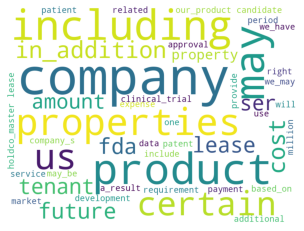

In [ ]:

from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
fig,ax=plt.subplots()

# with open(r'...\vanity fair.txt') as f:
#     text=f.read()
text = open("sample_bigram.txt").read()

mycloudword=WordCloud(width=800, 
                      height=600, 
                      scale=1, 
                      margin=2,
                      background_color='white',
                      max_words=200, 
                      min_font_size=20, 
                      max_font_size=140,
                      stopwords=STOPWORDS, 
                      random_state=50).generate(text)


ax.imshow(mycloudword)
ax.axis("off")
plt.show()

## Training Word2Vec model with bi-gram tokenizers
runtime: ~1s

In [ ]:
# Import the built-in logging module and configure it so that Word2Vec 
# output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 200    # Word vector dimensionality                      
min_word_count = 20   # Minimum word count - this limits vocabulary size              
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print("Training model...")

# Using default architecture: skip-gram
bi_model = word2vec.Word2Vec(bi_sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
bi_model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
bi_model_name = "200features_20minwords_10context_bigram"
bi_model.save(bi_model_name)

2022-04-04 13:29:53,906 : INFO : collecting all words and their counts
2022-04-04 13:29:53,908 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-04-04 13:29:53,971 : INFO : PROGRESS: at sentence #10000, processed 301635 words, keeping 8362 word types
2022-04-04 13:29:53,986 : INFO : collected 9145 word types from a corpus of 359141 raw words and 11949 sentences
2022-04-04 13:29:53,987 : INFO : Loading a fresh vocabulary
2022-04-04 13:29:53,997 : INFO : effective_min_count=20 retains 1876 unique words (20% of original 9145, drops 7269)
2022-04-04 13:29:53,999 : INFO : effective_min_count=20 leaves 323714 word corpus (90% of original 359141, drops 35427)
2022-04-04 13:29:54,008 : INFO : deleting the raw counts dictionary of 9145 items
2022-04-04 13:29:54,009 : INFO : sample=0.001 downsamples 45 most-common words
2022-04-04 13:29:54,011 : INFO : downsampling leaves estimated 225406 word corpus (69.6% of prior 323714)
2022-04-04 13:29:54,019 : INFO : estimated

Training model...


2022-04-04 13:29:54,421 : INFO : training model with 4 workers on 1876 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:29:54,825 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:29:54,843 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:29:54,854 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:29:54,860 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:29:54,861 : INFO : EPOCH - 1 : training on 359141 raw words (225326 effective words) took 0.4s, 523493 effective words/s
2022-04-04 13:29:55,266 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:29:55,273 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:29:55,295 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:29:55,304 : INFO : worker thread finished; awaiting finish of 0 

## Tests for Bi-gram model

### unigram tasks revisit

In [ ]:
# checking model results
# model.doesnt_match("identify statements term such".split())
print(bi_model.wv.doesnt_match("statements term products cost".split()))
print(bi_model.wv.most_similar("equity"))
print(bi_model.wv.most_similar("patent"))
print(bi_model.wv.similarity("agreement", "statements"))

term
[('due_to', 0.999792218208313), ('amounts', 0.9997806549072266), ('operating', 0.9997774362564087), ('but', 0.9997711181640625), ('income', 0.999763011932373), ('can', 0.9997619986534119), ('corporate', 0.9997580647468567), ('conditions', 0.9997528791427612), ('investments', 0.999748706817627), ('payments', 0.9997476935386658)]
[('made', 0.9996281862258911), ('it_is', 0.999602198600769), ('before', 0.9995973110198975), ('liability', 0.9995805025100708), ('coverage', 0.999579668045044), ('service', 0.9995537996292114), ('can', 0.9995492696762085), ('cost', 0.9995476007461548), ('whether', 0.9995436668395996), ('it', 0.9995430111885071)]
0.99640816


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
bi_model.wv.most_similar(positive = ['rights', 'patent'], negative = ['properties'], topn = 10)

[('united_states', 0.9967228174209595),
 ('drug', 0.9965649843215942),
 ('clinical', 0.9961990714073181),
 ('after', 0.9961965680122375),
 ('disease', 0.9961912631988525),
 ('designation', 0.9960988759994507),
 ('associated_with', 0.9960062503814697),
 ('receive', 0.995975911617279),
 ('more_than', 0.9959595203399658),
 ('data', 0.9959198236465454)]

In [ ]:
words = bi_model.wv.index2word
print(len(words))
print(words[:100])
print(model['financial'])
# for word in words:
    # print(word,model[word])

396
['the', 'of', 'and', 'to', 'or', 'in', 'a', 'our', 'for', 'that', 'as', 'is', 'we', 'are', 'with', 'company', 'on', 'by', 'any', 'which', 'from', 'other', 'such', 'may', 'at', 'properties', 'an', 'under', 'us', 'including', 'certain', 'be', 'not', 'ser', 'lease', 'if', 'these', 'december', 'its', 'have', 'development', 'million', 'we_may', 'products', 'fda', 'will', 'company_s', 'also', 'all', 'property', 'future', 'this', 'operations', 'in_addition', 'may_be', 'was', 'has', 'costs', 's', 'shares', 'product', 'were', 'we_have', 'their', 'subject_to', 'use', 'related', 'approval', 'could', 'additional', 'will_be', 'our_product', 'results', 'each', 'research', 'during', 'candidates', 'required', 'data', 'management', 'united_states', 'requirements', 'based_on', 'assets', 'our_business', 'time', 'more', 'one', 'study', 'period', 'terms', 'include', 'expenses', 'rights', 'sears_holdings', 'it', 'holdco_master', 'amount', 'common_shares', 'upon']
[-2.58139987e-02 -1.01507939e-01 -6.3321

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


### Bi-gram tasks

In [ ]:
print(np.array(bi_sentences[:10]))

[list(['indicate_by', 'check_mark', 'whether', 'the', 'registrant_has', 'filed', 'all', 'reports', 'required_to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities_exchange', 'act', 'of', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required_to', 'file', 'such_reports', 'and', 'has_been', 'subject_to', 'such', 'filing_requirements', 'for', 'the', 'past', 'days'])
 list(['yes_no'])
 list(['indicate_by', 'check_mark', 'whether', 'the', 'registrant_has', 'submitted', 'electronically', 'every', 'interactive', 'data', 'file', 'required_to', 'be_submitted', 'pursuant_to', 'rule', 'of', 'regulation_s', 't', 'of', 'this', 'chapter', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required_to', 'submit', 'such', 'files'])
 list(['yes_no'])
 list(['indicate_by', 'check_mark', 'whether', 'the', 'registrant', 'is', 'a', 'large_accelerated', 'filer', 'an',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
# vector comparison

bi_words = bi_model.wv.index2word
print(len(bi_words))
print(np.array(bi_words[:100]))

words = model.wv.index2word
print(len(words))
print(np.array(words[:100]))

775
['the' 'of' 'and' 'to' 'or' 'in' 'a' 'our' 'for' 'that' 'as' 'with' 'we'
 'is' 'are' 'company' 'on' 'by' 'which' 'any' 'other' 'from' 'may'
 'properties' 'at' 'such' 'under' 'not' 'including' 'us' 'certain' 'ser'
 'lease' 'be' 'if' 'an' 'december' 'these' 'have' 'its' 'we_may'
 'company_s' 'products' 'fda' 'million' 'development' 'all' 'operations'
 'also' 'in_addition' 'property' 'future' 'may_be' 'this' 'has' 'will'
 'were' 'costs' 'shares' 's' 'product' 'we_have' 'use' 'will_be'
 'our_product' 'was' 'their' 'candidates' 'approval' 'during' 'results'
 'united_states' 'related' 'each' 'our_business' 'could' 'based_on' 'data'
 'research' 'include' 'assets' 'terms' 'one' 'additional' 'holdco_master'
 'common_shares' 'more' 'it' 'period' 'management' 'requirements' 'study'
 'with_respect' 'a_result' 'value' 'rights' 'when' 'holdco' 'subject_to'
 'expenses']
512
['the' 'of' 'and' 'to' 'in' 'or' 'a' 'our' 'for' 'we' 'as' 'that' 'with'
 'on' 'may' 'be' 'company' 'is' 'are' 'by' 'not' 'o

In [ ]:
# check similarity
print(bi_model.wv.doesnt_match("financial statements terms our_product cost".split()))
print(bi_model.wv.most_similar("performance_obligation"))
print(bi_model.wv.similarity("consolidated_financial", "intellectual_property"))
bi_model.wv.most_similar(positive = ['rights', 'patent'], negative = ['operating_partnership'], topn = 10)

our_product
[('years', 0.9997206926345825), ('over', 0.9996860027313232), ('accounting', 0.999680757522583), ('method', 0.9996769428253174), ('transaction', 0.9996553659439087), ('prior_to', 0.999649167060852), ('two', 0.9996329545974731), ('fair_value', 0.9996291399002075), ('within', 0.9996289014816284), ('contract', 0.9996263980865479)]
0.99800456


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


[('may_be', 0.9988439083099365),
 ('such', 0.9988014698028564),
 ('our_ability', 0.9984623193740845),
 ('more', 0.9984403848648071),
 ('to', 0.9984323978424072),
 ('could', 0.9984145760536194),
 ('may', 0.9983721971511841),
 ('that', 0.9983164072036743),
 ('be', 0.9982485175132751),
 ('result_in', 0.998161256313324)]

In [ ]:
# check bi-gram vector

print(bi_model['financial_statements'])

[ 1.87983122e-02 -4.52784374e-02  1.78240065e-04 -6.92998767e-02
 -6.28733486e-02  8.81104358e-03 -3.46368924e-02 -1.09478250e-01
  4.85493392e-02  4.21178080e-02  1.41268820e-01  1.18060365e-01
  1.63614199e-01  9.47266293e-04 -5.43026626e-03  3.83733772e-02
  3.72898728e-02  1.96786374e-01 -2.84680147e-02 -2.58536655e-02
 -4.62494902e-02  9.78386998e-02  4.80938703e-02  7.60323089e-03
  6.29026219e-02  1.51516289e-01  1.99554209e-03 -5.19088954e-02
 -1.88240390e-02  2.88843028e-02  3.49030942e-02 -9.03798342e-02
  6.59036636e-02 -5.55185564e-02 -4.10377458e-02  2.60883681e-02
 -1.36049241e-02  6.07377067e-02  8.13206285e-02  4.79778089e-02
 -5.59574328e-02  7.11861476e-02 -2.10566055e-02  1.15797017e-02
  1.10969022e-02  9.17419232e-03 -1.19810516e-03 -1.15549276e-02
 -9.76547506e-03  9.17602628e-02  7.46617764e-02  1.97635591e-02
  4.45490610e-03  1.54439192e-02  4.68664914e-02 -5.50736226e-02
  1.35281205e-01  1.08510129e-01  1.50367886e-01 -1.33459553e-01
  6.01534285e-02  2.25527

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


## Training Word2Vec model with tri-gram tokenizers
lower min_word_count because of smaller vocab
runtime: ~1s

In [ ]:
# Import the built-in logging module and configure it so that Word2Vec 
# output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 200    # Word vector dimensionality                      
min_word_count = 4   # Minimum word count - this limits vocabulary size              
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
from gensim.models import Word2Vec
print("Training model...")

# Using default architecture: skip-gram
tri_model = word2vec.Word2Vec(tri_sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
tri_model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
tri_model_name = "200features_4minwords_10context_trigram"
tri_model.save(tri_model_name)

2022-04-04 13:29:27,116 : INFO : collecting all words and their counts


Training model...


2022-04-04 13:29:27,121 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-04-04 13:29:27,187 : INFO : PROGRESS: at sentence #10000, processed 273729 words, keeping 9881 word types
2022-04-04 13:29:27,201 : INFO : collected 10727 word types from a corpus of 326578 raw words and 11949 sentences
2022-04-04 13:29:27,202 : INFO : Loading a fresh vocabulary
2022-04-04 13:29:27,218 : INFO : effective_min_count=4 retains 6663 unique words (62% of original 10727, drops 4064)
2022-04-04 13:29:27,219 : INFO : effective_min_count=4 leaves 319788 word corpus (97% of original 326578, drops 6790)
2022-04-04 13:29:27,245 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:29:27,247 : INFO : sample=0.001 downsamples 35 most-common words
2022-04-04 13:29:27,251 : INFO : downsampling leaves estimated 230621 word corpus (72.1% of prior 319788)
2022-04-04 13:29:27,272 : INFO : estimated required memory for 6663 words and 200 dimensions: 13992300 bytes
2022

## Tests for 3grams model

### unigram tasks revisit

In [ ]:
# checking model results
# model.doesnt_match("identify statements term such".split())
print(tri_model.wv.doesnt_match("statements term products cost".split()))
print(tri_model.wv.most_similar("equity"))
print(tri_model.wv.most_similar("patent"))
print(tri_model.wv.similarity("agreement", "statements"))

term
[('interests', 0.9886375665664673), ('note', 0.9871084094047546), ('recurring', 0.9836004972457886), ('restructuring', 0.9813556671142578), ('portfolio', 0.9781492948532104), ('senior_unsecured', 0.9775498509407043), ('discussion', 0.9764997959136963), ('investment', 0.9763639569282532), ('revenues', 0.9760096073150635), ('annual_report_on', 0.9742156267166138)]
[('does_not', 0.9886793494224548), ('fails', 0.9863079190254211), ('what', 0.9854890704154968), ('renew', 0.9826957583427429), ('practice', 0.9826781153678894), ('imply', 0.9796797633171082), ('product', 0.9793249368667603), ('party', 0.9791011810302734), ('no_assurance', 0.9790675640106201), ('restore', 0.9787293672561646)]
0.27695295


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
tri_model.wv.most_similar(positive = ['rights', 'patent'], negative = ['properties'], topn = 10)

[('product', 0.9404640793800354),
 ('it', 0.9336739182472229),
 ('it_is', 0.9283263683319092),
 ('must', 0.9094356894493103),
 ('vie', 0.9039958715438843),
 ('does_not', 0.901915431022644),
 ('approved', 0.8990758657455444),
 ('applicable', 0.8957728147506714),
 ('primary_beneficiary', 0.8951925039291382),
 ('bank_holding_company', 0.8935604095458984)]

In [ ]:
words = tri_model.wv.index2word
print(len(words))
print(words[:100])
print(tri_model['financial'][:10])
# for word in words:
    # print(word,model[word])

3567
['the', 'of', 'and', 'to', 'our', 'in', 'or', 'a', 'for', 'we', 'that', 'as', 'may', 'are', 'is', 'on', 'with', 'by', 'be', 'any', 'other', 'which', 'from', 'not', 'have', 'if', 'company', 'such', 'at', 'these', 'december', 'an', 'under', 'us', 'properties', 'including', 'certain', 'million', 'could', 'also', 'subject', 'all', 'business', 's', 'its', 'will', 'this', 'future', 'shares', 'operations', 'was', 'result', 'in_addition', 'during', 'management', 'products', 'ability', 'their', 'property', 'were', 'assets', 'company_s', 'development', 'costs', 'time', 'fda', 'required', 'additional', 'lease', 'each', 'will_be', 'svc', 'services', 'related', 'has', 'generally', 'period', 'based_on', 'use', 'results', 'requirements', 'product', 'it', 'treatment', 'reit', 'u_s', 'amount', 'market', 'changes', 'united_states', 'data', 'one', 'financial', 'new', 'product_candidates', 'available', 'include', 'approval', 'agreement', 'tenants']
[-0.04308179  0.02554431  0.11382531  0.05951478 -0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


### Bi-gram tasks

In [ ]:
print(np.array(tri_sentences[40:60]))

[list(['from', 'these', 'clinical', 'data', 'we', 'identify', 'the', 'microbiological', 'and', 'functional', 'differences_between', 'a', 'healthy', 'and', 'a', 'diseased', 'microbiome', 'which', 'we', 'then', 'use', 'to', 'design', 'potential', 'ecobiotic_microbiome_therapeutics'])
 list(['after', 'further', 'in', 'lab', 'preclinical_testing', 'selected', 'ecobiotic_microbiome_therapeutic', 'candidates', 'are', 'then', 'studied', 'in', 'clinical_trials'])
 list(['we', 'apply', 'a', 'comparative', 'genomic', 'systems', 'biology', 'framework', 'that', 'leverages', 'proprietary', 'computational', 'microbiological', 'and', 'screening', 'capabilities', 'to', 'design', 'lead', 'candidates', 'that', 'target', 'the', 'microbiological', 'and', 'functional', 'deficiencies', 'identified', 'in', 'the', 'setting', 'of', 'human', 'disease'])
 list(['we', 'are', 'able', 'to', 'apply', 'this', 'framework', 'and', 'experience', 'to', 'clinical', 'data', 'sets', 'from', 'published', 'studies', 'and', 't

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
# vector comparison
tri_words = tri_model.wv.index2word
print(len(tri_words))
print(np.array(tri_words[:500]))

bi_words = bi_model.wv.index2word
print(len(bi_words))
print(np.array(bi_words[:100]))

# words = model.wv.index2word
# print(len(words))
# print(np.array(words))

3567
['the' 'of' 'and' 'to' 'our' 'in' 'or' 'a' 'for' 'we' 'that' 'as' 'may'
 'are' 'is' 'on' 'with' 'by' 'be' 'any' 'other' 'which' 'from' 'not'
 'have' 'if' 'company' 'such' 'at' 'these' 'december' 'an' 'under' 'us'
 'properties' 'including' 'certain' 'million' 'could' 'also' 'subject'
 'all' 'business' 's' 'its' 'will' 'this' 'future' 'shares' 'operations'
 'was' 'result' 'in_addition' 'during' 'management' 'products' 'ability'
 'their' 'property' 'were' 'assets' 'company_s' 'development' 'costs'
 'time' 'fda' 'required' 'additional' 'lease' 'each' 'will_be' 'svc'
 'services' 'related' 'has' 'generally' 'period' 'based_on' 'use'
 'results' 'requirements' 'product' 'it' 'treatment' 'reit' 'u_s' 'amount'
 'market' 'changes' 'united_states' 'data' 'one' 'financial' 'new'
 'product_candidates' 'available' 'include' 'approval' 'agreement'
 'tenants' 'more' 'due' 'those' 'ser' 'income' 'applicable' 'securities'
 'operating' 'through' 'no' 'value' 'vicinium' 'significant' 'risk'
 'current'

In [ ]:
# check similarity
print(tri_model.wv.doesnt_match("financial statements terms in_addition cost".split()))
print(tri_model.wv.most_similar("performance_obligation"))
print(tri_model.wv.similarity("may_be", "in_addition"))
tri_model.wv.most_similar(positive = ['rights', 'patent'], negative = ['operating_partnership'], topn = 10)

terms
[('method', 0.998005747795105), ('transaction_price', 0.9962403178215027), ('until', 0.9962165355682373), ('reference_product', 0.9961352944374084), ('b', 0.9952586889266968), ('six_months', 0.9944313764572144), ('one_year', 0.9942219853401184), ('within_days', 0.9941058158874512), ('days', 0.9940553903579712), ('market_exclusivity', 0.9939128160476685)]


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


KeyError: ignored

In [ ]:
# check bi-gram vector

print(tri_model['financial_statements'])

[ 0.03670413  0.04467368  0.07223174 -0.04929886  0.14935064  0.04332414
  0.09428374  0.01245075  0.08956733  0.1849683  -0.00991827  0.004048
  0.00867787 -0.00183245  0.18731722  0.02601435 -0.06376855 -0.00202463
  0.10141489  0.05918287 -0.15032929 -0.05948171 -0.00410475  0.12783767
 -0.06255154 -0.07900032  0.0065693  -0.0085132   0.03942611  0.12115411
 -0.06354938  0.07203832 -0.06971461 -0.08169822 -0.08166199 -0.01734529
 -0.07055935 -0.00586445 -0.06756555 -0.11813731 -0.01180653 -0.09619471
 -0.06796102 -0.15645832  0.06264407  0.17536433  0.13171631  0.03395368
 -0.23214965 -0.13785248  0.01140057 -0.08524673 -0.09437026 -0.07492419
 -0.05999158  0.06735806 -0.13670109 -0.03594421 -0.04085476 -0.182882
 -0.06604591 -0.17266712 -0.00293767  0.11695794 -0.03666683 -0.01953185
  0.04042882 -0.04496082 -0.0209622   0.03455377 -0.05751946  0.05545133
 -0.02700187 -0.02257266  0.11716054  0.10045001 -0.13095695 -0.02655536
  0.0539871   0.1001749   0.05248135  0.00983323  0.017

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


### tasks with DEI terms

In [ ]:
# load model
tri_model_name = "200features_5minwords_10context_trigram"
tri_model = Word2Vec.load(tri_model_name)

2022-04-04 13:30:01,225 : INFO : loading Word2Vec object from 200features_5minwords_10context_trigram
2022-04-04 13:30:01,333 : INFO : loading wv recursively from 200features_5minwords_10context_trigram.wv.* with mmap=None
2022-04-04 13:30:01,335 : INFO : setting ignored attribute vectors_norm to None
2022-04-04 13:30:01,337 : INFO : loading vocabulary recursively from 200features_5minwords_10context_trigram.vocabulary.* with mmap=None
2022-04-04 13:30:01,339 : INFO : loading trainables recursively from 200features_5minwords_10context_trigram.trainables.* with mmap=None
2022-04-04 13:30:01,342 : INFO : setting ignored attribute cum_table to None
2022-04-04 13:30:01,344 : INFO : loaded 200features_5minwords_10context_trigram


In [ ]:
# vector comparison
# tri_words = tri_model.wv.sort_by_descending_frequency()
tri_words = tri_model.wv.index2word
print(len(tri_words))
print(np.array(tri_words[:1000]))

bi_words = bi_model.wv.index2word
print(len(bi_words))
print(np.array(bi_words[:100]))

5883
['the' 'of' 'and' 'to' 'our' 'in' 'or' 'a' 'for' 'we' 'that' 'as' 'may'
 'are' 'is' 'on' 'with' 'by' 'be' 'any' 'other' 'which' 'from' 'not'
 'have' 'if' 'company' 'such' 'at' 'these' 'december' 'an' 'under' 'us'
 'properties' 'including' 'certain' 'million' 'could' 'also' 'subject'
 'all' 'business' 's' 'its' 'will' 'this' 'future' 'shares' 'operations'
 'was' 'result' 'in_addition' 'during' 'management' 'products' 'ability'
 'their' 'property' 'were' 'assets' 'company_s' 'development' 'costs'
 'time' 'fda' 'required' 'additional' 'lease' 'each' 'will_be' 'svc'
 'services' 'related' 'has' 'generally' 'period' 'based_on' 'use'
 'results' 'requirements' 'product' 'it' 'treatment' 'reit' 'u_s' 'amount'
 'market' 'changes' 'united_states' 'data' 'one' 'financial' 'new'
 'product_candidates' 'available' 'include' 'approval' 'agreement'
 'tenants' 'more' 'due' 'those' 'ser' 'income' 'applicable' 'securities'
 'operating' 'through' 'no' 'value' 'vicinium' 'significant' 'risk'
 'current'

In [ ]:
from posixpath import pardir
# check similarity

risk_terms=  ['strike', 'sit_in', 'operational_disruption', 'protest', 'injury', 
              'operational_disruption', 'operating_cost', 'delay', 'disruption',
              'lawsuit', 'litigation', 'impoundment', 'detain','penalt', 'sanction', 'court', 'consent_decree',
              'brand_damage', 'monetary_damage','brand_reputation', 'brand_recognition','social_license','decreased_trust','decreased_innovation','lost_opportunity', 'resign',
              'divest', 'restitution', 'conciliation_agreement',
              'modern_slavery', 'debt_bondage', 'human_traffic',
              'alleg', 'accus', 'exploit', 'publicly_expose', 'investigat', 'enforcement', 'security_force', 'inspection', 'inspector',
              'scandal', 'government_action', 'share_price', 'share_value']

practice_terms = ['wage','wage_theft','living_wage',
                  'precarity', 'precarious_work','gig_work','alternative_work','alternate_work','contingent_work','informal_work','casual_work','hazardous_work',
                  'confinement', 'document_retention','restriction_of_movement','delayed_wage','pay_manipulation','punishment', 'poor food','deprivation','unpaid_wage', 'delayed_payment','wage_violation',
                  'freedom_of_association','collective_bargaining', 'work_stoppage','hotline',
                  'code_of_conduct', 'due_diligence','ethical_recruit', 'handbook','social_audit','equal_benefits','transparency', 'traceability', 'visibility', 'accessibility','timely_payments','union', 'worker_committee','empower', 'accommodation',
                  'outsource', 'subcontracting','program', 'initiative', 'training','exempt', 'recruit', 'promotion', 'arbitration','mentorship', 'affirmative_action',
                   'order_delay','lead_time','unplanned_shipment','corruption', 'quota_system', 'delayed_payment','weak_governance', 'wage_violation','informal_supply_chain', 'last-minute_order_modification', 'unfair_timing_demand', 'pricing_pressure','poor_forecasting', 'irresponsible_exit']
# print(tri_model.wv.doesnt_match("financial statements terms in_addition cost".split()))
def check_occ(terms, vocab):
  coterms = []
  for term in terms:
    if term in vocab:
      coterms.append(term)
  return coterms

risk_coterms = check_occ(risk_terms, tri_words)
practice_coterms = check_occ(practice_terms, tri_words)
print("risk:", len(risk_coterms), "practice:", len(practice_coterms))

# most similar
print("Risks:")
for term in risk_coterms:
  print("most_similar", term, tri_model.wv.most_similar(term, topn = 5))
  # print("most_similar_cosmul", term, tri_model.wv.most_similar_cosmul(term, topn = 5))
  # print("centroid", term, tri_model.wv.rank_by_centrality(term))
  # print("similar_by_key", term, tri_model.wv.similar_by_word(term))

print("Practice:")
for term in practice_coterms:
  print(term, tri_model.wv.most_similar(term, topn = 5))

# pair comparison
pairs = [['price', 'value'], ['product','products'],['property','asset'], ['equal', 'equity'], # intuitively similar words
         ['less', 'more'], ['decrease', 'increase'], ['success', 'failure'], ['above', 'below']] # intuitively opposite words
for pair in pairs:
  print(pair, tri_model.wv.similarity(*pair))
  # print(pair, tri_model.wv.relative_cosine_similarity(*pair))
# print(tri_model.wv.most_similar(positive = ['fair_value', 'equity'], negative = ['risk'], topn = 10))

# analogies
def analogy(worda, wordb, wordc):
    result = tri_model.wv.most_similar(negative=[worda], 
                                positive=[wordb, wordc])
    return result

negs = ['less', 'failure', 'below']
analogies = [analogy('decrease', 'increase', neg) for neg in negs]
display(analogies)

2022-04-04 13:30:01,532 : INFO : precomputing L2-norms of word weight vectors


risk: 9 practice: 11
Risks:
most_similar strike [('approximately', 0.9933938980102539), ('approximately_million', 0.9912269711494446), ('billion', 0.9879677295684814), ('modified_mayo', 0.9872329235076904), ('january', 0.9862313270568848)]
most_similar injury [('work', 0.9984647631645203), ('follow', 0.9979711174964905), ('natural_disasters', 0.9976847171783447), ('efficient', 0.997649073600769), ('elements', 0.9975494146347046)]
most_similar delay [('cause', 0.9974578022956848), ('limit', 0.9948245882987976), ('proprietary_information', 0.9930590987205505), ('generate_revenue', 0.9928991794586182), ('significantly', 0.992605447769165)]
most_similar disruption [('could_harm', 0.9920597076416016), ('business_strategy', 0.9913638830184937), ('capital_resources', 0.9912766814231873), ('could_adversely_affect', 0.9911504983901978), ('commercialization_efforts', 0.989228367805481)]
most_similar lawsuit [('once', 0.9972646236419678), ('body', 0.9972394108772278), ('exempt', 0.997081279754638

[[('limit', 0.9930518269538879),
  ('some', 0.9923424124717712),
  ('managers', 0.9917946457862854),
  ('be_adversely_affected', 0.9900513291358948),
  ('adversely_affected', 0.9887820482254028),
  ('weaken', 0.9881138205528259),
  ('additional_financing', 0.9867679476737976),
  ('competitors', 0.9864538311958313),
  ('generate_revenue', 0.9860653877258301),
  ('trading_volume', 0.982947587966919)],
 [('taking', 0.981658935546875),
  ('may_prove', 0.9813777208328247),
  ('relinquish', 0.97672039270401),
  ('these', 0.9679750204086304),
  ('additional_financing', 0.9660961627960205),
  ('acquire', 0.9649408459663391),
  ('obtain', 0.9647849798202515),
  ('weaken', 0.9630248546600342),
  ('their_businesses', 0.9615572690963745),
  ('tenants', 0.9612085819244385)],
 [('significantly', 0.9929987192153931),
  ('generate_revenue', 0.991894543170929),
  ('invest', 0.990606963634491),
  ('impair', 0.9904859662055969),
  ('limit', 0.9895432591438293),
  ('proprietary_technology', 0.989461541175

In [ ]:
# test word analogies
import gensim.downloader as api

# Download the models
# fasttext_model300 = api.load('fasttext-wiki-news-subwords-300')
# word2vec_model300 = api.load('word2vec-google-news-300')
# glove_model300 = api.load('glove-wiki-gigaword-300')
# model = api.load("glove-wiki-gigaword-50")

# Correlation with human opinion on word similarity
from gensim.test.utils import datapath
# similarities = tri_model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))
# similarities = tri_model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))
# similarities2 = tri_model.wv.evaluate_word_pairs(datapath('simlex999.txt'))

# analogy test
# analogy_scores = tri_model.wv.evaluate_word_analogies(datapath('questions-words.txt'))

# print("similarities", similarities)
# print("similarities", similarities2)
# print("analogy", analogy_scores)


2022-04-04 13:30:01,603 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2022-04-04 13:30:01,607 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)


## Grid Search for 3-gram model

In [ ]:
# testing example for current model
tri_test = []
for term in risk_coterms+practice_coterms:
  tri_test.append(tri_model.wv.most_similar(term, topn = 30))


# print(tri_test)
df = pd.DataFrame(data = tri_test, index = risk_coterms+practice_coterms)
display(df)

0   \
strike               (approximately, 0.9933938980102539)   
injury                        (work, 0.9984647631645203)   
delay                        (cause, 0.9974578022956848)   
disruption              (could_harm, 0.9920597076416016)   
lawsuit                       (once, 0.9972646236419678)   
litigation               (carry_out, 0.9971609711647034)   
court                   (instrument, 0.9985125660896301)   
enforcement          (post_approval, 0.9988259673118591)   
inspection         (leahy_smith_act, 0.9927226901054382)   
due_diligence         (compositions, 0.9964054822921753)   
transparency           (false_claims, 0.997227132320404)   
visibility              (monitoring, 0.9975113868713379)   
outsource               (strategies, 0.9942771196365356)   
program                       (nine, 0.9977648854255676)   
training          (wells_fargo_bank, 0.9979535341262817)   
exempt                           (k, 0.9979476928710938)   
recruit        (qualified_personnel, 0.9971368312835693)   
promotion          (quality_control, 0.9990164637565613)   
arbitration               (unlikely, 0.9965136051177979)   
corruption               (extensive, 0.9978066086769104)   

                                                         1   \
strike          (approximately_million, 0.9912269711494446)   
injury                         (follow, 0.9979711174964905)   
delay                           (limit, 0.9948245882987976)   
disruption          (business_strategy, 0.9913638830184937)   
lawsuit                          (body, 0.9972394108772278)   
litigation          (approved_products, 0.9967620372772217)   
court                        (investor, 0.9975905418395996)   
enforcement               (challenging, 0.9988088607788086)   
inspection                   (decision, 0.9901573061943054)   
due_diligence               (achieving, 0.9962073564529419)   
transparency                (extensive, 0.9970675110816956)   
visibility                 (production, 0.9973903894424438)   
outsource                     (conduct, 0.9933700561523438)   
program        (endoscopic_improvement, 0.9976986050605774)   
training                   (efficiency, 0.9976845383644104)   
exempt                (priority_review, 0.9973451495170593)   
recruit                     (expansion, 0.9963570237159729)   
promotion                 (advertising, 0.9985110759735107)   
arbitration                      (libor, 0.995733380317688)   
corruption                  (political, 0.9976491332054138)   

                                                          2   \
strike                         (billion, 0.9879677295684814)   
injury               (natural_disasters, 0.9976847171783447)   
delay          (proprietary_information, 0.9930590987205505)   
disruption           (capital_resources, 0.9912766814231873)   
lawsuit                         (exempt, 0.9970812797546387)   
litigation                        (take, 0.9965547323226929)   
court                         (ultimate, 0.9972529411315918)   
enforcement                   (personal, 0.9987136125564575)   
inspection                   (authority, 0.9898481369018555)   
due_diligence                    (agree, 0.9958837032318115)   
transparency                     (fraud, 0.9970571398735046)   
visibility            (customer_service, 0.9972295165061951)   
outsource                        (debts, 0.9929608106613159)   
program                           (mild, 0.9976075291633606)   
training                         (truck, 0.9976804256439209)   
exempt                       (indicates, 0.9971902966499329)   
recruit                       (diversify, 0.995689332485199)   
promotion         (listing_requirements, 0.9984223246574402)   
arbitration                     (viable, 0.9953891038894653)   
corruption                        (fraud, 0.996604323387146)   

                                                           3   \
strike                    (modified_mayo, 0.987232923507690

In [ ]:
# working directory
path = "/content/gdrive/MyDrive/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed/tri_gram_grid_search"
# os.mkdir(path)
%cd "/content/gdrive/MyDrive/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed/tri_gram_grid_search"
! pwd

/content/gdrive/.shortcut-targets-by-id/1OPzVNu0CgKsi5tBwlMJVXZTu1EWX9F6C/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed/tri_gram_grid_search
/content/gdrive/.shortcut-targets-by-id/1OPzVNu0CgKsi5tBwlMJVXZTu1EWX9F6C/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed/tri_gram_grid_search


In [ ]:
# Set values for various parameters
num_features = [200]    # Word vector dimensionality                      
min_word_count = [10]   # Minimum word count - this limits vocabulary size              
num_workers = 4       # Number of threads to run in parallel
context = [10]          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

def gs(tokenizers, min_count = min_word_count, context_size = context, vector_size = num_features):
  # dataframes
  dfs = []
  
  for min_word_count in min_count:
    for context in context_size:
      for num_features in vector_size:
        print("Training model...")

        # Using default architecture: skip-gram
        tri_model = word2vec.Word2Vec(tokenizers, workers=num_workers, \
                size=num_features, min_count = min_word_count, \
                window = context, sample = downsampling)
        
        # save model
        tri_model_name = "{}features_{}minwords_{}context_trigram".format(num_features, min_word_count, context)
        print("Training model...", tri_model_name)

        # Using default architecture: skip-gram
        tri_model = word2vec.Word2Vec(tri_sentences, workers=num_workers, \
                    size=num_features, min_count = min_word_count, \
                    window = context, sample = downsampling)

        # If you don't plan to train the model any further, calling 
        # init_sims will make the model much more memory-efficient.
        tri_model.init_sims(replace=True)

        # It can be helpful to create a meaningful model name and 
        # save the model for later use. You can load it later using Word2Vec.load()
        
        tri_model.save(tri_model_name)

        
        # top similarities
        # make co-occurrence list
        tri_words = tri_model.wv.index2word
        risk_coterms = check_occ(risk_terms, tri_words)
        practice_coterms = check_occ(practice_terms, tri_words)
        sim_test = []
        for term in risk_coterms+practice_coterms:
          sim_test.append(tri_model.wv.most_similar(term, topn = 30))
        
        # df_sim = pd.DataFrame(data = sim_test, index = risk_coterms+practice_coterms, columns = [1,2,3,4,5])
        df_sim = pd.DataFrame(data = sim_test, index = risk_coterms+practice_coterms)
        dfs.append(df_sim)

        # # pair test
        # pair_test = []
        # for pair in pairs:
        #     pair_test.append(tri_model.wv.similarity(*pair))
            
        # df_pair = pd.DataFrame(data = pair_test, index = pairs)
        # dfs.append(df_pair)

        # to file
        df_sim.to_csv('{}.csv'.format(tri_model_name))
        
  return dfs

### search for num_features

In [ ]:
nf_gs = gs(tri_sentences, vector_size = [50, 100, 200, 300])


2022-03-31 15:58:23,963 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2022-03-31 15:58:23,972 : INFO : collecting all words and their counts
2022-03-31 15:58:23,976 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-31 15:58:24,140 : INFO : PROGRESS: at sentence #10000, processed 273328 words, keeping 9843 word types


Training model...


2022-03-31 15:58:24,185 : INFO : collected 10689 word types from a corpus of 326173 raw words and 11949 sentences
2022-03-31 15:58:24,193 : INFO : Loading a fresh vocabulary
2022-03-31 15:58:24,225 : INFO : effective_min_count=10 retains 3567 unique words (33% of original 10689, drops 7122)
2022-03-31 15:58:24,241 : INFO : effective_min_count=10 leaves 300696 word corpus (92% of original 326173, drops 25477)
2022-03-31 15:58:24,267 : INFO : deleting the raw counts dictionary of 10689 items
2022-03-31 15:58:24,276 : INFO : sample=0.001 downsamples 37 most-common words
2022-03-31 15:58:24,284 : INFO : downsampling leaves estimated 209786 word corpus (69.8% of prior 300696)
2022-03-31 15:58:24,310 : INFO : estimated required memory for 3567 words and 50 dimensions: 3210300 bytes
2022-03-31 15:58:24,318 : INFO : resetting layer weights
2022-03-31 15:58:27,263 : INFO : training model with 4 workers on 3567 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-03

ValueError: ignored

In [ ]:
# from google.colab import data_table
# from vega_datasets import data

# data_table.enable_dataframe_formatter()

for df in nf_gs:
  display(df)

1  \
delay            (potential, 0.9902563095092773)   
disruption    (interruption, 0.9880797863006592)   
lawsuit         (submission, 0.9883208870887756)   
litigation         (factors, 0.9881578683853149)   
court             (securing, 0.9936972260475159)   
enforcement    (challenging, 0.9982675909996033)   
transparency      (concerns, 0.9916974902153015)   
program          (secretary, 0.9947683215141296)   
training        (efficiency, 0.9970887899398804)   
recruit               (grow, 0.9919538497924805)   
promotion            (better, 0.994772732257843)   
arbitration      (disclosed, 0.9941774010658264)   
corruption         (pricing, 0.9969626069068909)   

                                                    2  \
delay                     (cause, 0.9892822504043579)   
disruption           (reputation, 0.9880272150039673)   
lawsuit                    (rule, 0.9875807166099548)   
litigation          (substantial, 0.9865521192550659)   
court                      (give, 0.9936701059341431)   
enforcement               (error, 0.9971636533737183)   
transparency      (federal_state, 0.9907255172729492)   
program                    (north, 0.994176983833313)   
training                (concepts, 0.996817409992218)   
recruit                (leverage, 0.9894872903823853)   
promotion               (governing, 0.99387526512146)   
arbitration   (medicinal_product, 0.9931746125221252)   
corruption          (experiences, 0.9919294714927673)   

                                                          3  \
delay                         (prevent, 0.9855485558509827)   
disruption                 (could_harm, 0.9867870807647705)   
lawsuit                        (update, 0.9856951236724854)   
litigation    (proprietary_information, 0.9826984405517578)   
court                        (disclose, 0.9931272864341736)   
enforcement                  (inherent, 0.9970351457595825)   
transparency   (financial_institutions, 0.9883411526679993)   
program                    (focused_on, 0.9941734075546265)   
training                   (processing, 0.9966902136802673)   
recruit                  (opportunities, 0.988794207572937)   
promotion                     (closely, 0.9938399791717529)   
arbitration              (satisfactory, 0.9926577806472778)   
corruption             (pharmaceutical, 0.9918277263641357)   

                                                        4  \
delay                      (financing, 0.983407735824585)   
disruption                 (prospects, 0.983432412147522)   
lawsuit                     (written, 0.9839335680007935)   
litigation         (substantial_costs, 0.982205331325531)   
court                           (way, 0.9926424622535706)   
enforcement            (member_states, 0.996740460395813)   
transparency              (extensive, 0.9883086085319519)   
program       (financial_instruments, 0.9937654733657837)   
training                 (production, 0.9958635568618774)   
recruit                   (covenants, 0.9851241111755371)   
promotion                   (imposes, 0.9935776591300964)   
arbitration      (foreign_regulatory, 0.9914990663528442)   
corruption               (healthcare, 0.9914765357971191)   

                                                       5  
delay                  (substantial, 0.9826462864875793)  
disruption               (be_harmed, 0.9831605553627014)  
lawsuit               (administered, 0.9834583401679993)  
litigation                    (delay, 0.980819582939148)  
court                       (status, 0.9923014640808105)  
enforcement               (involved, 0.9965382814407349)  
transparency           (authorities, 0.9880056381225586)  
program                  (tennessee, 0.9937241077423096)  
training         (biopharmaceutical, 0.9958111047744751)  
recruit                   (economic, 0.9849851727485657)  
promotion                      (anti, 0.993366539478302)  
arbitration   (accelerated_approval, 0.9908424019813538)  
corruption    

1  \
delay                  (potential, 0.9935972690582275)   
disruption             (prospects, 0.9927528500556946)   
lawsuit                 (american, 0.9937363266944885)   
litigation             (financing, 0.9891688823699951)   
court                      (claim, 0.9962016344070435)   
enforcement                (error, 0.9978193640708923)   
transparency         (authorities, 0.9963482022285461)   
program                    (japan, 0.9969061613082886)   
training                  (retail, 0.9970411062240601)   
recruit                  (success, 0.9939679503440857)   
promotion     (medicinal_products, 0.9973820447921753)   
arbitration               (humans, 0.9968196153640747)   
corruption              (consumer, 0.9938883781433105)   

                                                            2  \
delay                        (disruptions, 0.993572473526001)   
disruption                    (liquidity, 0.9923210740089417)   
lawsuit                        (diagnosis, 0.993346095085144)   
litigation                         (ways, 0.9863836765289307)   
court                         (challenge, 0.9961870908737183)   
enforcement                     (varying, 0.9974512457847595)   
transparency     (financial_institutions, 0.9960367679595947)   
program                  (reconciliation, 0.9966722130775452)   
training                          (truck, 0.9954499006271362)   
recruit       (commercialization_efforts, 0.9935429096221924)   
promotion                    (enterprise, 0.9971116185188293)   
arbitration                (supported_by, 0.9960446357727051)   
corruption                        (monitor, 0.99309903383255)   

                                                    3  \
delay                     (cause, 0.9926067590713501)   
disruption    (business_strategy, 0.9920666217803955)   
lawsuit                (decision, 0.9927793741226196)   
litigation           (materially, 0.9849660992622375)   
court                       (way, 0.9958405494689941)   
enforcement           (involving, 0.9972190260887146)   
transparency       (notification, 0.9946210384368896)   
program                (flagship, 0.9964640736579895)   
training             (processing, 0.9945367574691772)   
recruit                 (leverage, 0.993092954158783)   
promotion                  (anti, 0.9969666004180908)   
arbitration          (heightened, 0.9955701231956482)   
corruption       (administrative, 0.9927577972412109)   

                                               4  \
delay           (materially, 0.9901942014694214)   
disruption    (interruption, 0.9910269379615784)   
lawsuit           (utilizes, 0.9922217726707458)   
litigation           (delay, 0.9838640689849854)   
court             (properly, 0.9956757426261902)   
enforcement        (monetary, 0.997215211391449)   
transparency          (gdpr, 0.9944876432418823)   
program       (solid_tumors, 0.9961525201797485)   
training         (buildings, 0.9942061901092529)   
recruit          (expansion, 0.9921010136604309)   
promotion          (lending, 0.9965769648551941)   
arbitration    (traditional, 0.9955394268035889)   
corruption      (healthcare, 0.9923974871635437)   

                                               5  
delay              (prevent, 0.9891904592514038)  
disruption      (could_harm, 0.9908700585365295)  
lawsuit            (medicine, 0.992078423500061)  
litigation       (potential, 0.9827524423599243)  
court               (widely, 0.9955530166625977)  
enforcement         (highly, 0.9970373511314392)  
transparency         (fraud, 0.9941079020500183)  
program          (discovery, 0.9960907101631165)  
training             (areas, 0.9941859245300293)  
recruit              (debts, 0.9920153617858887)  
promotion     (increasingly, 0.9962065815925598)  
arbitration       (specific, 0.9953368902206421)  
corruption        (features, 0.9922161102294922)

1  \
delay                (affect, 0.9941512942314148)   
disruption        (effect_on, 0.9918332695960999)   
lawsuit           (considers, 0.9977002739906311)   
litigation        (potential, 0.9929271936416626)   
court            (instrument, 0.9974147081375122)   
enforcement       (regularly, 0.9980932474136353)   
transparency       (prohibit, 0.9977550506591797)   
program             (bonuses, 0.9974751472473145)   
training          (encourage, 0.9968309998512268)   
recruit              (success, 0.997345507144928)   
promotion       (advertising, 0.9993868470191956)   
arbitration   (comprehensive, 0.9967403411865234)   
corruption       (healthcare, 0.9974831342697144)   

                                                     2  \
delay                  (be_harmed, 0.9938084483146667)   
disruption    (a_material_adverse, 0.9882235527038574)   
lawsuit            (recommendation, 0.996719241142273)   
litigation             (financing, 0.9914700984954834)   
court                    (pivotal, 0.9968546628952026)   
enforcement              (varying, 0.9978224635124207)   
transparency  (health_information, 0.9970771670341492)   
program                   (office, 0.9953111410140991)   
training             (consultants, 0.9967226982116699)   
recruit                (diversify, 0.9960971474647522)   
promotion               (antibody, 0.9988194704055786)   
arbitration                (hipaa, 0.9944818019866943)   
corruption                 (fraud, 0.9958277940750122)   

                                                   3  \
delay                (potential, 0.9937044382095337)   
disruption    (adversely_affect, 0.9868451356887817)   
lawsuit              (dependent, 0.9963011741638184)   
litigation              (delays, 0.9913923740386963)   
court                 (properly, 0.9966435432434082)   
enforcement         (understand, 0.9977090954780579)   
transparency           (insurers, 0.996859073638916)   
program             (huntsville, 0.9946618676185608)   
training                 (build, 0.9965585470199585)   
recruit               (focus_on, 0.9954286217689514)   
promotion                (store, 0.9979725480079651)   
arbitration              (rules, 0.9918842315673828)   
corruption          (government, 0.9957404136657715)   

                                                         4  \
delay                  (significantly, 0.9895234107971191)   
disruption         (operating_results, 0.9850082397460938)   
lawsuit        (competent_authorities, 0.9958605766296387)   
litigation                   (compete, 0.9909148216247559)   
court                             (brought, 0.99658203125)   
enforcement                   (nature, 0.9976851940155029)   
transparency  (financial_institutions, 0.9957610368728638)   
program                      (savings, 0.9942078590393066)   
training                        (fuel, 0.9964276552200317)   
recruit                  (prospective, 0.9942665696144104)   
promotion        (technology_transfer, 0.9978554248809814)   
arbitration               (regulation, 0.9918283224105835)   
corruption    (financial_institutions, 0.9944478273391724)   

                                                              5  
delay                         (disruptions, 0.9886951446533203)  
disruption    (materially_adversely_affected, 0.984359681606...  
lawsuit               (european_commission, 0.9958046674728394)  
litigation                       (diminish, 0.9901179075241089)  
court                               (matter, 0.996523916721344)  
enforcement                     (disclosures, 0.99765545129776)  
transparency                         (work, 0.9948102235794067)  
program                           (colitis, 0.9937896728515625)  
training                      (other_reits, 0.9960346817970276)  
recruit                            (pursue, 0.9941431283950806)  
promotion                       (governing, 0.9977173805236816)  
arbitration                   (ensure_that, 0.

1  \
delay              (negatively_affect, 0.9967248439788818)   
disruption    (could_adversely_affect, 0.9953094124794006)   
lawsuit                   (evaluation, 0.9966491460800171)   
litigation                   (reasons, 0.9953778982162476)   
court                         (though, 0.9979056715965271)   
enforcement                  (personal, 0.999135434627533)   
transparency                   (hipaa, 0.9975993633270264)   
program                          (iii, 0.9978145956993103)   
training                     (records, 0.9955017566680908)   
recruit                         (about, 0.995166540145874)   
promotion               (surveillance, 0.9985738396644592)   
arbitration                   (should, 0.9981585741043091)   
corruption                 (workflows, 0.9991158843040466)   

                                                        2  \
delay                 (profitability, 0.9955399036407471)   
disruption               (could_harm, 0.9940609931945801)   
lawsuit           (effective_january, 0.9960410594940186)   
litigation    (be_adversely_affected, 0.9946866035461426)   
court                       (country, 0.9977213144302368)   
enforcement           (interpretation, 0.998881459236145)   
transparency               (prohibit, 0.9964355826377869)   
program                     (jpp_llc, 0.9977278709411621)   
training                      (supply, 0.995309591293335)   
recruit                  (strategies, 0.9947075247764587)   
promotion                   (antibody, 0.998223066329956)   
arbitration               (similarly, 0.9977157115936279)   
corruption                  (lending, 0.9989482760429382)   

                                                     3  \
delay                (disruptions, 0.9953175783157349)   
disruption             (prospects, 0.9935891628265381)   
lawsuit               (as_defined, 0.9958218336105347)   
litigation                (taking, 0.9935795068740845)   
court                    (instead, 0.9976352453231812)   
enforcement            (important, 0.9988307952880859)   
transparency        (notification, 0.9956639409065247)   
program                    (entry, 0.9973236322402954)   
training                 (storage, 0.9950311183929443)   
recruit                 (managing, 0.9946969151496887)   
promotion     (medicinal_products, 0.9979392290115356)   
arbitration        (manufacturers, 0.9976131319999695)   
corruption              (personal, 0.9981595277786255)   

                                                      4  \
delay                   (be_harmed, 0.9950025081634521)   
disruption        (could_materially, 0.992306649684906)   
lawsuit                 (servicenow, 0.995728611946106)   
litigation                   (ways, 0.9924540519714355)   
court                     (pending, 0.9975733160972595)   
enforcement             (affecting, 0.9983820915222168)   
transparency             (concerns, 0.9954996109008789)   
program                   (monthly, 0.9966159462928772)   
training      (healthcare_programs, 0.9949556589126587)   
recruit        (our_hotel_managers, 0.9945592284202576)   
promotion     (taking_into_account, 0.9978053569793701)   
arbitration             (challenge, 0.9970930218696594)   
corruption           (applications, 0.9979340434074402)   

                                                    5  
delay                     (cause, 0.9949460029602051)  
disruption    (operating_results, 0.9920663237571716)  
lawsuit            (administered, 0.9956833124160767)  
litigation              (compete, 0.9920039176940918)  
court                 (executing, 0.9973881840705872)  
enforcement           (involving, 0.9981439113616943)  
transparency         (authorities, 0.995207667350769)  
program              (jpp_ii_llc, 0.9961287975311279)  
training                   (items, 0.994823694229126)  
recruit            (developments, 0.9943525791168213)  
promotion                (better, 0.9975062012672424)  
arbitration          

### grid search for context window size


In [ ]:
cs_gs = gs(tri_sentences, context_size = [5, 10, 20])

2022-03-30 14:13:52,566 : INFO : collecting all words and their counts
2022-03-30 14:13:52,569 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-30 14:13:52,627 : INFO : PROGRESS: at sentence #10000, processed 273328 words, keeping 9843 word types
2022-03-30 14:13:52,640 : INFO : collected 10689 word types from a corpus of 326173 raw words and 11949 sentences
2022-03-30 14:13:52,642 : INFO : Loading a fresh vocabulary
2022-03-30 14:13:52,655 : INFO : effective_min_count=10 retains 3567 unique words (33% of original 10689, drops 7122)
2022-03-30 14:13:52,657 : INFO : effective_min_count=10 leaves 300696 word corpus (92% of original 326173, drops 25477)
2022-03-30 14:13:52,672 : INFO : deleting the raw counts dictionary of 10689 items
2022-03-30 14:13:52,674 : INFO : sample=0.001 downsamples 37 most-common words
2022-03-30 14:13:52,675 : INFO : downsampling leaves estimated 209786 word corpus (69.8% of prior 300696)
2022-03-30 14:13:52,686 : INFO : estima

Training model...


2022-03-30 14:13:53,315 : INFO : training model with 4 workers on 3567 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-03-30 14:13:53,592 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:53,600 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:53,606 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:53,610 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-30 14:13:53,611 : INFO : EPOCH - 1 : training on 326173 raw words (209805 effective words) took 0.3s, 729267 effective words/s
2022-03-30 14:13:53,886 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:53,890 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:53,905 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:53,913 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-03-30 14:13:55,619 : INFO : training model with 4 workers on 3567 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-03-30 14:13:55,920 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:55,943 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:55,950 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:55,959 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-30 14:13:55,960 : INFO : EPOCH - 1 : training on 326173 raw words (210017 effective words) took 0.3s, 630601 effective words/s
2022-03-30 14:13:56,268 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:56,278 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:56,279 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:56,285 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-03-30 14:13:58,120 : INFO : training model with 4 workers on 3567 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=20
2022-03-30 14:13:58,467 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:58,483 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:58,493 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:58,498 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-30 14:13:58,499 : INFO : EPOCH - 1 : training on 326173 raw words (209720 effective words) took 0.4s, 564785 effective words/s
2022-03-30 14:13:58,847 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:58,849 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:58,865 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:58,871 : INFO : worker thread finished; awaiting finish of 0 

In [ ]:
for df in cs_gs:
  display(df)

NameError: ignored

### Grid Search over min_count, vector size, window size

In [ ]:
# running time for 2 * 3 * 4 -- 3m37s
all_gs = gs(tri_sentences, min_count = [2, 5], context_size = [5, 10, 15], vector_size = [50, 100, 150, 200])



2022-04-04 13:31:34,234 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2022-04-04 13:31:34,242 : INFO : collecting all words and their counts
2022-04-04 13:31:34,246 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-04-04 13:31:34,417 : INFO : PROGRESS: at sentence #10000, processed 273729 words, keeping 9881 word types


Training model...


2022-04-04 13:31:34,461 : INFO : collected 10727 word types from a corpus of 326578 raw words and 11949 sentences
2022-04-04 13:31:34,467 : INFO : Loading a fresh vocabulary
2022-04-04 13:31:34,525 : INFO : effective_min_count=2 retains 8662 unique words (80% of original 10727, drops 2065)
2022-04-04 13:31:34,531 : INFO : effective_min_count=2 leaves 324513 word corpus (99% of original 326578, drops 2065)
2022-04-04 13:31:34,592 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:31:34,599 : INFO : sample=0.001 downsamples 34 most-common words
2022-04-04 13:31:34,605 : INFO : downsampling leaves estimated 235760 word corpus (72.7% of prior 324513)
2022-04-04 13:31:34,666 : INFO : estimated required memory for 8662 words and 50 dimensions: 7795800 bytes
2022-04-04 13:31:34,674 : INFO : resetting layer weights
2022-04-04 13:31:38,488 : INFO : training model with 4 workers on 8662 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 

Training model...


2022-04-04 13:31:41,670 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:31:41,678 : INFO : sample=0.001 downsamples 34 most-common words
2022-04-04 13:31:41,684 : INFO : downsampling leaves estimated 235760 word corpus (72.7% of prior 324513)
2022-04-04 13:31:41,729 : INFO : estimated required memory for 8662 words and 50 dimensions: 7795800 bytes
2022-04-04 13:31:41,736 : INFO : resetting layer weights
2022-04-04 13:31:45,126 : INFO : training model with 4 workers on 8662 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:31:45,538 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:31:45,541 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:31:45,549 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:31:45,553 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:31:45,555 : INFO : EPOCH - 1 : training on

Training model...


2022-04-04 13:31:47,716 : INFO : resetting layer weights
2022-04-04 13:31:49,364 : INFO : training model with 4 workers on 8662 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:31:49,711 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:31:49,719 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:31:49,721 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:31:49,724 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:31:49,729 : INFO : EPOCH - 1 : training on 326578 raw words (235709 effective words) took 0.4s, 663523 effective words/s
2022-04-04 13:31:50,074 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:31:50,088 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:31:50,096 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:31:50,10

Training model...


2022-04-04 13:31:53,019 : INFO : training model with 4 workers on 8662 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:31:53,368 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:31:53,383 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:31:53,389 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:31:53,394 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:31:53,395 : INFO : EPOCH - 1 : training on 326578 raw words (235819 effective words) took 0.4s, 652288 effective words/s
2022-04-04 13:31:53,727 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:31:53,751 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:31:53,756 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:31:53,764 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:31:55,345 : INFO : estimated required memory for 8662 words and 150 dimensions: 14725400 bytes
2022-04-04 13:31:55,347 : INFO : resetting layer weights
2022-04-04 13:31:56,913 : INFO : training model with 4 workers on 8662 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:31:57,397 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:31:57,418 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:31:57,425 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:31:57,428 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:31:57,430 : INFO : EPOCH - 1 : training on 326578 raw words (235830 effective words) took 0.5s, 465332 effective words/s
2022-04-04 13:31:57,921 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:31:57,940 : INFO : worker thread finished; awaiting finish of 2 more threads
2022

Training model...


2022-04-04 13:31:59,719 : INFO : effective_min_count=2 retains 8662 unique words (80% of original 10727, drops 2065)
2022-04-04 13:31:59,721 : INFO : effective_min_count=2 leaves 324513 word corpus (99% of original 326578, drops 2065)
2022-04-04 13:31:59,746 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:31:59,754 : INFO : sample=0.001 downsamples 34 most-common words
2022-04-04 13:31:59,755 : INFO : downsampling leaves estimated 235760 word corpus (72.7% of prior 324513)
2022-04-04 13:31:59,781 : INFO : estimated required memory for 8662 words and 150 dimensions: 14725400 bytes
2022-04-04 13:31:59,783 : INFO : resetting layer weights
2022-04-04 13:32:01,426 : INFO : training model with 4 workers on 8662 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:32:01,898 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:01,901 : INFO : worker thread finished; awaiting finish of 2 more threads


Training model...


2022-04-04 13:32:04,484 : INFO : estimated required memory for 8662 words and 200 dimensions: 18190200 bytes
2022-04-04 13:32:04,486 : INFO : resetting layer weights
2022-04-04 13:32:06,107 : INFO : training model with 4 workers on 8662 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:32:06,557 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:06,565 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:06,566 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:06,567 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:06,571 : INFO : EPOCH - 1 : training on 326578 raw words (235654 effective words) took 0.5s, 518688 effective words/s
2022-04-04 13:32:06,995 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:07,008 : INFO : worker thread finished; awaiting finish of 2 more threads
2022

Training model...


2022-04-04 13:32:10,232 : INFO : training model with 4 workers on 8662 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:32:10,667 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:10,675 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:10,696 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:10,706 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:10,707 : INFO : EPOCH - 1 : training on 326578 raw words (235699 effective words) took 0.5s, 507267 effective words/s
2022-04-04 13:32:11,127 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:11,130 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:11,136 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:11,141 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:32:14,705 : INFO : training model with 4 workers on 8662 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:32:15,144 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:15,162 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:15,176 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:15,180 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:15,183 : INFO : EPOCH - 1 : training on 326578 raw words (235850 effective words) took 0.5s, 502748 effective words/s
2022-04-04 13:32:15,643 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:15,647 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:15,656 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:15,657 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:32:18,885 : INFO : training model with 4 workers on 8662 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:32:19,379 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:19,400 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:19,407 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:19,409 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:19,411 : INFO : EPOCH - 1 : training on 326578 raw words (235896 effective words) took 0.5s, 455931 effective words/s
2022-04-04 13:32:19,862 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:19,871 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:19,880 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:19,888 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:32:21,743 : INFO : estimated required memory for 8662 words and 100 dimensions: 11260600 bytes
2022-04-04 13:32:21,746 : INFO : resetting layer weights
2022-04-04 13:32:23,388 : INFO : training model with 4 workers on 8662 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:32:23,772 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:23,773 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:23,794 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:23,802 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:23,803 : INFO : EPOCH - 1 : training on 326578 raw words (235547 effective words) took 0.4s, 581132 effective words/s
2022-04-04 13:32:24,189 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:24,208 : INFO : worker thread finished; awaiting finish of 2 more threads
202

Training model...


2022-04-04 13:32:27,259 : INFO : training model with 4 workers on 8662 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:32:27,623 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:27,636 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:27,640 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:27,644 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:27,647 : INFO : EPOCH - 1 : training on 326578 raw words (235919 effective words) took 0.4s, 623795 effective words/s
2022-04-04 13:32:28,026 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:28,036 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:28,053 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:28,055 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:32:29,743 : INFO : estimated required memory for 8662 words and 150 dimensions: 14725400 bytes
2022-04-04 13:32:29,744 : INFO : resetting layer weights
2022-04-04 13:32:31,357 : INFO : training model with 4 workers on 8662 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:32:31,909 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:31,927 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:31,936 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:31,939 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:31,942 : INFO : EPOCH - 1 : training on 326578 raw words (235780 effective words) took 0.6s, 419830 effective words/s
2022-04-04 13:32:32,493 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:32,506 : INFO : worker thread finished; awaiting finish of 2 more threads
202

Training model...


2022-04-04 13:32:34,465 : INFO : effective_min_count=2 leaves 324513 word corpus (99% of original 326578, drops 2065)
2022-04-04 13:32:34,499 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:32:34,502 : INFO : sample=0.001 downsamples 34 most-common words
2022-04-04 13:32:34,504 : INFO : downsampling leaves estimated 235760 word corpus (72.7% of prior 324513)
2022-04-04 13:32:34,536 : INFO : estimated required memory for 8662 words and 150 dimensions: 14725400 bytes
2022-04-04 13:32:34,537 : INFO : resetting layer weights
2022-04-04 13:32:36,114 : INFO : training model with 4 workers on 8662 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:32:36,693 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:36,703 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:36,711 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:36,713 :

Training model...


2022-04-04 13:32:39,503 : INFO : estimated required memory for 8662 words and 200 dimensions: 18190200 bytes
2022-04-04 13:32:39,506 : INFO : resetting layer weights
2022-04-04 13:32:41,157 : INFO : training model with 4 workers on 8662 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:32:41,623 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:41,624 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:41,648 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:41,657 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:41,659 : INFO : EPOCH - 1 : training on 326578 raw words (235799 effective words) took 0.5s, 480209 effective words/s
2022-04-04 13:32:42,119 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:42,129 : INFO : worker thread finished; awaiting finish of 2 more threads
202

Training model...


2022-04-04 13:32:45,567 : INFO : training model with 4 workers on 8662 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:32:46,032 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:46,039 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:46,043 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:46,044 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:46,045 : INFO : EPOCH - 1 : training on 326578 raw words (235882 effective words) took 0.5s, 504608 effective words/s
2022-04-04 13:32:46,516 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:46,542 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:46,548 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:46,549 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:32:48,671 : INFO : estimated required memory for 8662 words and 50 dimensions: 7795800 bytes
2022-04-04 13:32:48,673 : INFO : resetting layer weights
2022-04-04 13:32:50,246 : INFO : training model with 4 workers on 8662 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:32:50,733 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:50,740 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:50,745 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:50,756 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:50,757 : INFO : EPOCH - 1 : training on 326578 raw words (235839 effective words) took 0.5s, 473121 effective words/s
2022-04-04 13:32:51,228 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:51,234 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-0

Training model...


2022-04-04 13:32:54,684 : INFO : training model with 4 workers on 8662 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:32:55,162 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:55,165 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:55,178 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:55,188 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:55,189 : INFO : EPOCH - 1 : training on 326578 raw words (235860 effective words) took 0.5s, 477013 effective words/s
2022-04-04 13:32:55,676 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:55,695 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:55,708 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:55,710 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:32:57,658 : INFO : estimated required memory for 8662 words and 100 dimensions: 11260600 bytes
2022-04-04 13:32:57,660 : INFO : resetting layer weights
2022-04-04 13:32:59,246 : INFO : training model with 4 workers on 8662 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:32:59,645 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:59,657 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:59,660 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:59,665 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:59,667 : INFO : EPOCH - 1 : training on 326578 raw words (235670 effective words) took 0.4s, 574237 effective words/s
2022-04-04 13:33:00,073 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:00,087 : INFO : worker thread finished; awaiting finish of 2 more threads
202

Training model...


2022-04-04 13:33:03,196 : INFO : training model with 4 workers on 8662 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:33:03,591 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:03,604 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:03,620 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:03,630 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:03,631 : INFO : EPOCH - 1 : training on 326578 raw words (235581 effective words) took 0.4s, 557092 effective words/s
2022-04-04 13:33:04,063 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:04,088 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:04,100 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:04,103 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:33:05,891 : INFO : estimated required memory for 8662 words and 150 dimensions: 14725400 bytes
2022-04-04 13:33:05,895 : INFO : resetting layer weights
2022-04-04 13:33:07,522 : INFO : training model with 4 workers on 8662 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:33:08,102 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:08,122 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:08,137 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:08,145 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:08,147 : INFO : EPOCH - 1 : training on 326578 raw words (235860 effective words) took 0.6s, 383611 effective words/s
2022-04-04 13:33:08,741 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:08,747 : INFO : worker thread finished; awaiting finish of 2 more threads
202

Training model...


2022-04-04 13:33:12,558 : INFO : training model with 4 workers on 8662 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:33:13,139 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:13,155 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:13,165 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:13,174 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:13,175 : INFO : EPOCH - 1 : training on 326578 raw words (235748 effective words) took 0.6s, 388084 effective words/s
2022-04-04 13:33:13,772 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:13,774 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:13,789 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:13,801 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:33:16,277 : INFO : effective_min_count=2 retains 8662 unique words (80% of original 10727, drops 2065)
2022-04-04 13:33:16,280 : INFO : effective_min_count=2 leaves 324513 word corpus (99% of original 326578, drops 2065)
2022-04-04 13:33:16,321 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:33:16,322 : INFO : sample=0.001 downsamples 34 most-common words
2022-04-04 13:33:16,324 : INFO : downsampling leaves estimated 235760 word corpus (72.7% of prior 324513)
2022-04-04 13:33:16,362 : INFO : estimated required memory for 8662 words and 200 dimensions: 18190200 bytes
2022-04-04 13:33:16,363 : INFO : resetting layer weights
2022-04-04 13:33:17,951 : INFO : training model with 4 workers on 8662 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:33:18,507 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:18,518 : INFO : worker thread finished; awaiting finish of 2 more threads

Training model...


2022-04-04 13:33:22,766 : INFO : training model with 4 workers on 8662 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:33:23,283 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:23,291 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:23,293 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:23,296 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:23,297 : INFO : EPOCH - 1 : training on 326578 raw words (235972 effective words) took 0.5s, 449537 effective words/s
2022-04-04 13:33:23,827 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:23,837 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:23,858 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:23,860 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:33:26,088 : INFO : estimated required memory for 5883 words and 50 dimensions: 5294700 bytes
2022-04-04 13:33:26,089 : INFO : resetting layer weights
2022-04-04 13:33:27,202 : INFO : training model with 4 workers on 5883 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:33:27,586 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:27,594 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:27,599 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:27,611 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:27,612 : INFO : EPOCH - 1 : training on 326578 raw words (227158 effective words) took 0.4s, 569023 effective words/s
2022-04-04 13:33:27,973 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:27,992 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04

Training model...


2022-04-04 13:33:30,491 : INFO : training model with 4 workers on 5883 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:33:30,906 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:30,923 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:30,937 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:30,957 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:30,958 : INFO : EPOCH - 1 : training on 326578 raw words (227210 effective words) took 0.5s, 496549 effective words/s
2022-04-04 13:33:31,353 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:31,355 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:31,363 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:31,367 : INFO : worker thread finished; awaiting finish of 0 mo

Training model...


2022-04-04 13:33:34,131 : INFO : training model with 4 workers on 5883 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:33:34,464 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:34,483 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:34,490 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:34,493 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:34,494 : INFO : EPOCH - 1 : training on 326578 raw words (227246 effective words) took 0.4s, 646129 effective words/s
2022-04-04 13:33:34,825 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:34,834 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:34,846 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:34,858 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:33:37,188 : INFO : training model with 4 workers on 5883 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:33:37,497 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:37,519 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:37,526 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:37,532 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:37,534 : INFO : EPOCH - 1 : training on 326578 raw words (226972 effective words) took 0.3s, 685588 effective words/s
2022-04-04 13:33:37,882 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:37,885 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:37,887 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:37,892 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:33:39,372 : INFO : resetting layer weights
2022-04-04 13:33:40,503 : INFO : training model with 4 workers on 5883 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:33:40,978 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:40,999 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:41,006 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:41,012 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:41,017 : INFO : EPOCH - 1 : training on 326578 raw words (227377 effective words) took 0.5s, 454068 effective words/s
2022-04-04 13:33:41,471 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:41,480 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:41,487 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:41,49

Training model...


2022-04-04 13:33:44,259 : INFO : training model with 4 workers on 5883 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:33:44,729 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:44,737 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:44,742 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:44,743 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:44,745 : INFO : EPOCH - 1 : training on 326578 raw words (227276 effective words) took 0.5s, 479569 effective words/s
2022-04-04 13:33:45,212 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:45,214 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:45,215 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:45,234 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:33:47,112 : INFO : estimated required memory for 5883 words and 200 dimensions: 12354300 bytes
2022-04-04 13:33:47,115 : INFO : resetting layer weights
2022-04-04 13:33:48,213 : INFO : training model with 4 workers on 5883 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:33:48,603 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:48,611 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:48,614 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:48,623 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:48,624 : INFO : EPOCH - 1 : training on 326578 raw words (227124 effective words) took 0.4s, 567231 effective words/s
2022-04-04 13:33:49,033 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:49,043 : INFO : worker thread finished; awaiting finish of 2 more threads
2022

Training model...


2022-04-04 13:33:52,061 : INFO : training model with 4 workers on 5883 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:33:52,477 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:52,483 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:52,497 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:52,501 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:52,502 : INFO : EPOCH - 1 : training on 326578 raw words (227264 effective words) took 0.4s, 539282 effective words/s
2022-04-04 13:33:52,886 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:52,910 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:52,920 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:52,924 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:33:54,649 : INFO : resetting layer weights
2022-04-04 13:33:55,784 : INFO : training model with 4 workers on 5883 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:33:56,406 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:56,431 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:56,455 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:56,463 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:56,468 : INFO : EPOCH - 1 : training on 326578 raw words (227127 effective words) took 0.7s, 339047 effective words/s
2022-04-04 13:33:57,169 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:57,170 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:57,233 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:57,25

Training model...


2022-04-04 13:34:01,082 : INFO : training model with 4 workers on 5883 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:34:01,622 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:01,663 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:01,683 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:01,705 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:01,707 : INFO : EPOCH - 1 : training on 326578 raw words (227285 effective words) took 0.6s, 368742 effective words/s
2022-04-04 13:34:02,279 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:02,292 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:02,298 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:02,315 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:34:04,662 : INFO : downsampling leaves estimated 227222 word corpus (71.8% of prior 316668)
2022-04-04 13:34:04,703 : INFO : estimated required memory for 5883 words and 100 dimensions: 7647900 bytes
2022-04-04 13:34:04,707 : INFO : resetting layer weights
2022-04-04 13:34:06,861 : INFO : training model with 4 workers on 5883 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:34:07,376 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:07,379 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:07,398 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:07,416 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:07,421 : INFO : EPOCH - 1 : training on 326578 raw words (227476 effective words) took 0.5s, 422411 effective words/s
2022-04-04 13:34:07,911 : INFO : worker thread finished; awaiting finish of 3 mo

Training model...


2022-04-04 13:34:10,059 : INFO : effective_min_count=5 retains 5883 unique words (54% of original 10727, drops 4844)
2022-04-04 13:34:10,068 : INFO : effective_min_count=5 leaves 316668 word corpus (96% of original 326578, drops 9910)
2022-04-04 13:34:10,103 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:34:10,109 : INFO : sample=0.001 downsamples 36 most-common words
2022-04-04 13:34:10,113 : INFO : downsampling leaves estimated 227222 word corpus (71.8% of prior 316668)
2022-04-04 13:34:10,144 : INFO : estimated required memory for 5883 words and 100 dimensions: 7647900 bytes
2022-04-04 13:34:10,150 : INFO : resetting layer weights
2022-04-04 13:34:12,747 : INFO : training model with 4 workers on 5883 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:34:13,560 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:13,571 : INFO : worker thread finished; awaiting finish of 2 more threads


Training model...


2022-04-04 13:34:16,378 : INFO : effective_min_count=5 retains 5883 unique words (54% of original 10727, drops 4844)
2022-04-04 13:34:16,384 : INFO : effective_min_count=5 leaves 316668 word corpus (96% of original 326578, drops 9910)
2022-04-04 13:34:16,432 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:34:16,435 : INFO : sample=0.001 downsamples 36 most-common words
2022-04-04 13:34:16,440 : INFO : downsampling leaves estimated 227222 word corpus (71.8% of prior 316668)
2022-04-04 13:34:16,470 : INFO : estimated required memory for 5883 words and 150 dimensions: 10001100 bytes
2022-04-04 13:34:16,476 : INFO : resetting layer weights
2022-04-04 13:34:17,706 : INFO : training model with 4 workers on 5883 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:34:18,217 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:18,228 : INFO : worker thread finished; awaiting finish of 2 more threads

Training model...


2022-04-04 13:34:22,200 : INFO : training model with 4 workers on 5883 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:34:22,740 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:22,770 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:22,783 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:22,784 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:22,790 : INFO : EPOCH - 1 : training on 326578 raw words (227262 effective words) took 0.6s, 393589 effective words/s
2022-04-04 13:34:23,317 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:23,320 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:23,337 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:23,352 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:34:25,410 : INFO : resetting layer weights
2022-04-04 13:34:26,579 : INFO : training model with 4 workers on 5883 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:34:27,014 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:27,018 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:27,034 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:27,043 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:27,044 : INFO : EPOCH - 1 : training on 326578 raw words (226972 effective words) took 0.5s, 499013 effective words/s
2022-04-04 13:34:27,498 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:27,504 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:27,525 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:27,5

Training model...


2022-04-04 13:34:30,246 : INFO : training model with 4 workers on 5883 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:34:30,672 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:30,684 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:30,703 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:30,709 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:30,711 : INFO : EPOCH - 1 : training on 326578 raw words (227168 effective words) took 0.5s, 500855 effective words/s
2022-04-04 13:34:31,207 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:31,224 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:31,227 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:31,239 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:34:34,271 : INFO : training model with 4 workers on 5883 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:34:34,712 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:34,730 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:34,738 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:34,753 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:34,754 : INFO : EPOCH - 1 : training on 326578 raw words (227264 effective words) took 0.5s, 501887 effective words/s
2022-04-04 13:34:35,247 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:35,256 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:35,265 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:35,289 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:34:38,093 : INFO : training model with 4 workers on 5883 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:34:38,553 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:38,554 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:38,574 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:38,583 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:38,585 : INFO : EPOCH - 1 : training on 326578 raw words (227255 effective words) took 0.5s, 472327 effective words/s
2022-04-04 13:34:39,037 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:39,053 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:39,058 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:39,068 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:34:41,226 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:34:41,229 : INFO : sample=0.001 downsamples 36 most-common words
2022-04-04 13:34:41,231 : INFO : downsampling leaves estimated 227222 word corpus (71.8% of prior 316668)
2022-04-04 13:34:41,273 : INFO : estimated required memory for 5883 words and 100 dimensions: 7647900 bytes
2022-04-04 13:34:41,285 : INFO : resetting layer weights
2022-04-04 13:34:43,337 : INFO : training model with 4 workers on 5883 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:34:43,917 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:43,925 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:43,927 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:43,947 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:43,951 : INFO : EPOCH - 1 : training

Training model...


2022-04-04 13:34:46,499 : INFO : PROGRESS: at sentence #10000, processed 273729 words, keeping 9881 word types
2022-04-04 13:34:46,561 : INFO : collected 10727 word types from a corpus of 326578 raw words and 11949 sentences
2022-04-04 13:34:46,573 : INFO : Loading a fresh vocabulary
2022-04-04 13:34:46,651 : INFO : effective_min_count=5 retains 5883 unique words (54% of original 10727, drops 4844)
2022-04-04 13:34:46,663 : INFO : effective_min_count=5 leaves 316668 word corpus (96% of original 326578, drops 9910)
2022-04-04 13:34:46,754 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:34:46,762 : INFO : sample=0.001 downsamples 36 most-common words
2022-04-04 13:34:46,764 : INFO : downsampling leaves estimated 227222 word corpus (71.8% of prior 316668)
2022-04-04 13:34:46,870 : INFO : estimated required memory for 5883 words and 100 dimensions: 7647900 bytes
2022-04-04 13:34:46,876 : INFO : resetting layer weights
2022-04-04 13:34:49,031 : INFO : training model

Training model...


2022-04-04 13:34:52,438 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:34:52,440 : INFO : sample=0.001 downsamples 36 most-common words
2022-04-04 13:34:52,443 : INFO : downsampling leaves estimated 227222 word corpus (71.8% of prior 316668)
2022-04-04 13:34:52,469 : INFO : estimated required memory for 5883 words and 150 dimensions: 10001100 bytes
2022-04-04 13:34:52,472 : INFO : resetting layer weights
2022-04-04 13:34:54,709 : INFO : training model with 4 workers on 5883 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:34:55,389 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:55,418 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:55,437 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:55,444 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:55,446 : INFO : EPOCH - 1 : trainin

Training model...


2022-04-04 13:34:58,683 : INFO : effective_min_count=5 retains 5883 unique words (54% of original 10727, drops 4844)
2022-04-04 13:34:58,692 : INFO : effective_min_count=5 leaves 316668 word corpus (96% of original 326578, drops 9910)
2022-04-04 13:34:58,731 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:34:58,733 : INFO : sample=0.001 downsamples 36 most-common words
2022-04-04 13:34:58,739 : INFO : downsampling leaves estimated 227222 word corpus (71.8% of prior 316668)
2022-04-04 13:34:58,775 : INFO : estimated required memory for 5883 words and 150 dimensions: 10001100 bytes
2022-04-04 13:34:58,777 : INFO : resetting layer weights
2022-04-04 13:35:00,492 : INFO : training model with 4 workers on 5883 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:35:01,092 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:35:01,100 : INFO : worker thread finished; awaiting finish of 2 more threads

Training model...


2022-04-04 13:35:05,049 : INFO : training model with 4 workers on 5883 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:35:05,547 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:35:05,554 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:35:05,560 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:35:05,564 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:35:05,566 : INFO : EPOCH - 1 : training on 326578 raw words (226955 effective words) took 0.5s, 449421 effective words/s
2022-04-04 13:35:06,035 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:35:06,044 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:35:06,059 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:35:06,079 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:35:07,931 : INFO : effective_min_count=5 retains 5883 unique words (54% of original 10727, drops 4844)
2022-04-04 13:35:07,934 : INFO : effective_min_count=5 leaves 316668 word corpus (96% of original 326578, drops 9910)
2022-04-04 13:35:07,961 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:35:07,963 : INFO : sample=0.001 downsamples 36 most-common words
2022-04-04 13:35:07,966 : INFO : downsampling leaves estimated 227222 word corpus (71.8% of prior 316668)
2022-04-04 13:35:07,992 : INFO : estimated required memory for 5883 words and 200 dimensions: 12354300 bytes
2022-04-04 13:35:07,997 : INFO : resetting layer weights
2022-04-04 13:35:09,109 : INFO : training model with 4 workers on 5883 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:35:09,595 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:35:09,609 : INFO : worker thread finished; awaiting finish of 2 more threads

In [ ]:
for df in gs:
  display(df)

0   \
strike                        (installments, 0.9799250364303589)   
injury                     (civil_penalties, 0.9960111379623413)   
delay                           (compromise, 0.9920529723167419)   
disruption                       (liquidity, 0.9861958622932434)   
lawsuit                        (stockholder, 0.9919877648353577)   
litigation                  (claims_against, 0.9956522583961487)   
court                              (reserve, 0.9967443943023682)   
exploit                  (managing_trustees, 0.9872785806655884)   
enforcement                     (guidelines, 0.9975985288619995)   
inspection                           (treat, 0.9824845790863037)   
inspector                          (forming, 0.9859285354614258)   
wage                            (toxicities, 0.9818118214607239)   
due_diligence                        (carry, 0.9952181577682495)   
transparency                          (fraud, 0.994950532913208)   
visibility                          (john_g, 0.9921387434005737)   
outsource                               (jv, 0.9937301874160767)   
program         (or_constructive_fraudulent, 0.9975445866584778)   
initiative                       (rendering, 0.7192132472991943)   
training                          (national, 0.9978051781654358)   
exempt                          (focused_on, 0.9966945648193359)   
recruit                         (strategies, 0.9939482808113098)   
promotion                               (co, 0.9982126355171204)   
arbitration                         (unless, 0.9958111643791199)   
corruption     (seniornotes_percentdue_memberus_gaap, 0.99613...   

                                                          1   \
strike         (on_early_extinguishment, 0.9765149354934692)   
injury                          (threats, 0.995396077632904)   
delay                    (commercialize, 0.9915096759796143)   
disruption                      (growth, 0.9861112236976624)   
lawsuit                    (institution, 0.9913743138313293)   
litigation                     (factors, 0.9951529502868652)   
court                            (fully, 0.9967048764228821)   
exploit                    (if_approved, 0.9864194989204407)   
enforcement         (reit_qualification, 0.9975444674491882)   
inspection                     (minimum, 0.9816851615905762)   
inspector      (sf_intermediate_holding, 0.9835662841796875)   
wage                    (hotelmembersvc, 0.9811508655548096)   
due_diligence            (manufacturers, 0.9948215484619141)   
transparency                 (political, 0.9933430552482605)   
visibility                    (co_sears, 0.9910932183265686)   
outsource                       (address, 0.993540346622467)   
program                        (bonuses, 0.9970781803131104)   
initiative                   (directors, 0.6721591353416443)   
training                      (processes, 0.997192919254303)   
exempt                           (among, 0.9965012073516846)   
recruit                         (toward, 0.9933888912200928)   
promotion                       (center, 0.9979469776153564)   
arbitration                (appropriate, 0.9957013130187988)   
corruption                       (water, 0.9960060715675354)   

                                                              2   \
strike                   (interest_rate_cap, 0.9720622301101685)   
injury                        (institutions, 0.9951409697532654)   
delay                               (manage, 0.9913215637207031)   
disruption                         (capital, 0.9830780625343323)   
lawsuit                       (nonfinancial, 0.9897048473358154)   
litigation     (intellectual_property_rights, 0.9930182099342...   
court                           (constitute, 0.9962784051895142)   
exploit                             (timing, 0.9859995245933533)   
enforcement                          (tfpts, 0.9971569180488586)   
inspection                         (penalty, 0.9806222319602966)   
inspector   

0   \
strike            (notional_amount, 0.9918954372406006)   
injury                   (davidson, 0.9982292652130127)   
delay                       (cause, 0.9943705797195435)   
disruption             (will_depend, 0.989075779914856)   
lawsuit                  (receives, 0.9938381910324097)   
litigation               (estimates, 0.995025098323822)   
court                (additionally, 0.9974188208580017)   
exploit            (interpretation, 0.9855536222457886)   
enforcement            (definition, 0.9980297684669495)   
inspection            (distributed, 0.9839556217193604)   
inspector                 (storage, 0.9898038506507874)   
wage                    (pertinent, 0.9893265962600708)   
due_diligence              (enroll, 0.9964441657066345)   
transparency                (legal, 0.9979093670845032)   
visibility            (departments, 0.9973552227020264)   
outsource              (understand, 0.9941688776016235)   
program                     (basic, 0.9982381463050842)   
initiative       (employees_engaged, 0.822475790977478)   
training       (medicinal_products, 0.9986088871955872)   
exempt                      (morris, 0.996954083442688)   
recruit                 (expansion, 0.9931257963180542)   
promotion             (residential, 0.9987143278121948)   
arbitration                 (tests, 0.9979698657989502)   
corruption               (directly, 0.9977666139602661)   

                                                   1   \
strike                    (third, 0.9915982484817505)   
injury         (clinical_benefit, 0.9980877637863159)   
delay                 (downgrade, 0.9943357110023499)   
disruption              (history, 0.9827553033828735)   
lawsuit               (dysbiosis, 0.9932729601860046)   
litigation             (moreover, 0.9950172305107117)   
court                  (renewals, 0.9965540766716003)   
exploit                (relating, 0.9847437143325806)   
enforcement      (implementation, 0.9980117678642273)   
inspection              (licensed, 0.983338475227356)   
inspector          (depending_on, 0.9895427227020264)   
wage                   (disposal, 0.9891418218612671)   
due_diligence             (claim, 0.9952045679092407)   
transparency              (fraud, 0.9975683093070984)   
visibility                 (plant, 0.996864378452301)   
outsource              (proposed, 0.9938302636146545)   
program                 (several, 0.9982172250747681)   
initiative         (form_thereof, 0.8184993267059326)   
training                  (human, 0.9981832504272461)   
exempt               (vancomycin, 0.9965038299560547)   
recruit                (capacity, 0.9929467439651489)   
promotion       (seritage_growth, 0.9984748959541321)   
arbitration          (adequately, 0.9979662895202637)   
corruption         (side_effects, 0.9971081614494324)   

                                                       2   \
strike                          (ten, 0.9909794926643372)   
injury                         (pass, 0.9980363845825195)   
delay                    (compromise, 0.9942549467086792)   
disruption     (incurring_additional, 0.9825590252876282)   
lawsuit                   (condition, 0.9930928349494934)   
litigation               (provisions, 0.9949793815612793)   
court                          (once, 0.9964983463287354)   
exploit                  (strengthen, 0.9846675395965576)   
enforcement                (diseases, 0.9979872703552246)   
inspection                   (patent, 0.9826691150665283)   
inspector                 (providing, 0.9889770150184631)   
wage                    (hospitality, 0.9889117479324341)   
due_diligence                  (even, 0.9948234558105469)   
transparency      (health_information, 0.997039794921875)   
visibility                (technical, 0.9968624114990234)   
outsource                     (among, 0.9935799837112427)   
program                       (multi, 0.9981474876403809)   
initiative                (directors, 0.8133509159088

0   \
strike                           (gain, 0.9886369109153748)   
injury                          (human, 0.9988324046134949)   
delay                      (supplement, 0.9963146448135376)   
disruption                (stock_price, 0.9893490672111511)   
lawsuit                   (description, 0.9963802695274353)   
litigation                   (moreover, 0.9970495700836182)   
court                          (target, 0.9977192282676697)   
exploit                     (promotion, 0.9948293566703796)   
enforcement                  (portions, 0.9985917210578918)   
inspection                     (imposed, 0.993965744972229)   
inspector                     (outside, 0.9948665499687195)   
wage           (srt_northamericamember, 0.9895111322402954)   
due_diligence         (immune_response, 0.9967968463897705)   
transparency                 (numerous, 0.9987847805023193)   
visibility           (flagship_fund_iv, 0.9968910813331604)   
outsource                     (perform, 0.9961099028587341)   
program                             (f, 0.9992399215698242)   
initiative         (comprehensive_loss, 0.6843805313110352)   
training                        (store, 0.9990301728248596)   
exempt                          (small, 0.9987738132476807)   
recruit                          (fund, 0.9949471950531006)   
promotion          (services_performed, 0.9989472031593323)   
arbitration                (treatments, 0.9982125163078308)   
corruption                      (legal, 0.9977566003799438)   

                                                           1   \
strike                             (loss, 0.9873157739639282)   
injury         (pharmaceutical_companies, 0.9985082745552063)   
delay                     (collaborators, 0.9961725473403931)   
disruption                      (decline, 0.9886613488197327)   
lawsuit           (non_accelerated_filer, 0.9949653148651123)   
litigation                    (asserting, 0.9956231713294983)   
court                           (pivotal, 0.9976721405982971)   
exploit                     (calculating, 0.9944753050804138)   
enforcement                     (records, 0.9981931447982788)   
inspection          (available_therapies, 0.9927314519882202)   
inspector                    (collection, 0.9943837523460388)   
wage                        (enterprises, 0.9888699650764465)   
due_diligence             (subscriptions, 0.9959272146224976)   
transparency                    (varying, 0.9983362555503845)   
visibility                   (across_all, 0.9968550205230713)   
outsource                       (identify, 0.995759904384613)   
program                        (executed, 0.9990563988685608)   
initiative                 (s_discussion, 0.5978025197982788)   
training                     (expression, 0.9988433122634888)   
exempt                  (nutritional_ltp, 0.9985232353210449)   
recruit                          (damage, 0.9945901036262512)   
promotion              (restricted_stock, 0.9985731840133667)   
arbitration                (commercially, 0.9980736374855042)   
corruption                     (agencies, 0.9976292848587036)   

                                                  2   \
strike         (public_offering, 0.9863148927688599)   
injury                   (scale, 0.9984314441680908)   
delay                (licensees, 0.9960445761680603)   
disruption          (cash_flows, 0.9841703772544861)   
lawsuit               (acquirer, 0.9947543144226074)   
litigation             (against, 0.9955111742019653)   
court              (for_example, 0.9972267746925354)   
exploit          (computational, 0.9944049119949341)   
enforcement         (maturities, 0.9981377720832825)   
inspection     (compliance_with, 0.9926010966300964)   
inspector             (presents, 0.9942393898963928)   
wage                (recipients, 0.9888542294502258)   
due_diligence              (even, 0.995595395565033)   
transparency             (fraud, 0.9981982111930847)   
visibility     

0   \
strike                      (were_billion, 0.994532585144043)   
injury                         (concepts, 0.9986941814422607)   
delay                           (patents, 0.9955040216445923)   
disruption                      (decline, 0.9906250238418579)   
lawsuit                          (entity, 0.9963493347167969)   
litigation                  (substantial, 0.9980882406234741)   
court                          (positive, 0.9984762072563171)   
exploit        (transactions_giving_rise, 0.9918501377105713)   
enforcement      (commercial_real_estate, 0.9990838766098022)   
inspection                     (modified, 0.9970396757125854)   
inspector                   (prosecution, 0.9842545986175537)   
wage                            (lessors, 0.9950934648513794)   
due_diligence                   (demands, 0.9978082180023193)   
transparency                    (privacy, 0.9967127442359924)   
visibility                      (baldwin, 0.9964848756790161)   
outsource                      (critical, 0.9956449270248413)   
program                        (commonly, 0.9989496469497681)   
initiative                        (wages, 0.8443598747253418)   
training                          (banks, 0.9994443655014038)   
exempt                                (g, 0.9988107681274414)   
recruit                     (irreversible, 0.991511344909668)   
promotion                     (discovery, 0.9990630745887756)   
arbitration                      (better, 0.9981611967086792)   
corruption                        (teams, 0.9953723549842834)   

                                                       1   \
strike                     (previous, 0.9935715198516846)   
injury                     (new_drug, 0.9986846446990967)   
delay                     (compromise, 0.994976282119751)   
disruption     (commercial_prospects, 0.9902070760726929)   
lawsuit                          (gap, 0.995093822479248)   
litigation        (patent_protection, 0.9979240894317627)   
court                         (seeks, 0.9978039264678955)   
exploit                (relationship, 0.9908697009086609)   
enforcement                (reviewed, 0.9990755319595337)   
inspection                    (non_u, 0.9969676733016968)   
inspector                (prevention, 0.9833781123161316)   
wage                   (particularly, 0.9943013191223145)   
due_diligence            (adequately, 0.9977695345878601)   
transparency                (pricing, 0.9963154792785645)   
visibility                (membersvc, 0.9964399933815002)   
outsource                   (achieve, 0.9950781464576721)   
program               (under_section, 0.9985582828521729)   
initiative               (single_arm, 0.8255264163017273)   
training               (multi_tenant, 0.9990431070327759)   
exempt                           (gp, 0.9984715580940247)   
recruit                   (diversify, 0.9899705648422241)   
promotion                    (inputs, 0.9987996816635132)   
arbitration                (concerns, 0.9977537393569946)   
corruption                   (inc_ihg, 0.994807243347168)   

                                                      2   \
strike               (stabilization, 0.9929553270339966)   
injury                   (consumers, 0.9984416961669922)   
delay                         (lead, 0.9947736263275146)   
disruption             (stock_price, 0.9860706329345703)   
lawsuit               (additionally, 0.9948899745941162)   
litigation                 (factors, 0.9974974989891052)   
court                      (instead, 0.9975022673606873)   
exploit                    (maximize, 0.990470290184021)   
enforcement                  (below, 0.9988820552825928)   
inspection               (fact_that, 0.9965055584907532)   
inspector              (preparation, 0.9830251336097717)   
wage                        (timely, 0.9942485094070435)   
due_diligence  (treasury_regulations, 0.997758150100708)   
transparency                   (lot, 0.9960740804672241)   
visibil

0   \
strike                        (measured, 0.977147102355957)   
injury                          (human, 0.9961662888526917)   
delay                  (trading_volume, 0.9919119477272034)   
disruption     (could_adversely_affect, 0.9853712916374207)   
lawsuit                         (erisa, 0.9919130206108093)   
litigation          (substantial_costs, 0.9957731366157532)   
court                          (agency, 0.9965670108795166)   
exploit                    (components, 0.9892592430114746)   
enforcement                     (plans, 0.9968934059143066)   
inspection                    (restore, 0.9828258752822876)   
inspector                (macroeconomic, 0.977519690990448)   
wage                         (consumer, 0.9935683608055115)   
due_diligence                (together, 0.9930179119110107)   
transparency                     (fraud, 0.995965301990509)   
visibility                 (generation, 0.9964804649353027)   
outsource                 (initiatives, 0.9908726215362549)   
program                   (diluted_net, 0.9975091218948364)   
initiative                 (management, 0.7167553305625916)   
training                      (attacks, 0.9969866275787354)   
exempt                          (filing, 0.996293306350708)   
recruit                          (grow, 0.9924589395523071)   
promotion                 (health_care, 0.9981187582015991)   
arbitration                     (makes, 0.9972559809684753)   
corruption                    (lending, 0.9958587288856506)   

                                                       1   \
strike                   (commitment, 0.9717880487442017)   
injury                  (wall_street, 0.9960677623748779)   
delay                         (affect, 0.988976240158081)   
disruption                (conflicts, 0.9840320348739624)   
lawsuit                    (maryland, 0.9916706085205078)   
litigation                    (funds, 0.9954367876052856)   
court                        (either, 0.9963726997375488)   
exploit                  (allocation, 0.9885125756263733)   
enforcement                   (larger, 0.996845543384552)   
inspection                 (believes, 0.9826598763465881)   
inspector                      (fair, 0.9759494066238403)   
wage                   (particularly, 0.9918450117111206)   
due_diligence                (humans, 0.9913786053657532)   
transparency              (extensive, 0.9952709674835205)   
visibility                     (back, 0.9955214262008667)   
outsource                (completing, 0.9898833632469177)   
program                         (iii, 0.9975063800811768)   
initiative               (possession, 0.7113654613494873)   
training                    (lending, 0.9968215227127075)   
exempt                 (additionally, 0.9959299564361572)   
recruit                      (growth, 0.9890273213386536)   
promotion        (medicinal_products, 0.9972413778305054)   
arbitration                (customary, 0.996444582939148)   
corruption     (personal_information, 0.9953891634941101)   

                                                         2   \
strike                        (parcels, 0.9717649221420288)   
injury                    (instruments, 0.9960513710975647)   
delay                      (materially, 0.9884099960327148)   
disruption                    (decline, 0.9800724983215332)   
lawsuit                   (constitutes, 0.9913337826728821)   
litigation                    (actions, 0.9949911832809448)   
court                     (designation, 0.9955024719238281)   
exploit             (amended_complaint, 0.9885109066963196)   
enforcement                  (optimize, 0.9962502121925354)   
inspection     (deposit_insurance_fund, 0.9824081659317017)   
inspector                     (regarding, 0.97576504945755)   
wage                    (have_resulted, 0.9912813901901245)   
due_diligence              (substances, 0.9901480674743652)   
transparency                 (criminal, 0.9944360852241516)   
visibility

0   \
strike          (fiscal_quarter, 0.9794653654098511)   
injury                (counties, 0.9985311031341553)   
delay              (competitors, 0.9938388466835022)   
disruption          (reputation, 0.9912866353988647)   
lawsuit            (indicate_by, 0.9950002431869507)   
litigation             (matters, 0.9961660504341125)   
court                     (best, 0.9984614849090576)   
exploit               (screening, 0.992804765701294)   
enforcement           (covering, 0.9981514811515808)   
inspection          (instrument, 0.9895232319831848)   
inspector                  (doj, 0.9704773426055908)   
wage              (reinvestment, 0.9905478954315186)   
due_diligence          (permits, 0.9975194334983826)   
transparency   (confidentiality, 0.9953029155731201)   
visibility              (energy, 0.9969422817230225)   
outsource       (property_level, 0.9933214783668518)   
program                  (topic, 0.9976349472999573)   
initiative        (intravesical, 0.7004478573799133)   
training                 (retail, 0.998422384262085)   
exempt                    (stops, 0.998144268989563)   
recruit              (expansion, 0.9957318305969238)   
promotion                   (il, 0.9982744455337524)   
arbitration                (llp, 0.9976975917816162)   
corruption          (electronic, 0.9962786436080933)   

                                                              1   \
strike                             (parcels, 0.9789398312568665)   
injury                                 (oil, 0.9984692931175232)   
delay                              (compete, 0.9938084483146667)   
disruption                    (interruption, 0.9894413352012634)   
lawsuit                 (check_mark_whether, 0.9944741129875183)   
litigation                   (trade_secrets, 0.9960095882415771)   
court                                  (set, 0.9981507062911987)   
exploit                            (writing, 0.9918946027755737)   
enforcement                     (withdrawal, 0.9980102777481079)   
inspection                          (sponsor, 0.988638162612915)   
inspector                            (guest, 0.9695968627929688)   
wage               (microbiome_therapeutics, 0.9887229204177856)   
due_diligence                     (creation, 0.9971402883529663)   
transparency          (healthcare_providers, 0.9949593544006348)   
visibility                            (help, 0.9966747760772705)   
outsource            (subscription_services, 0.9924922585487366)   
program                        (square_feet, 0.9976176023483276)   
initiative     (hotelsandtravelcentersmember, 0.6493138074874...   
training                          (building, 0.9984183311462402)   
exempt                              (target, 0.9979548454284668)   
recruit                           (managing, 0.9937785863876343)   
promotion                      (health_care, 0.9981647729873657)   
arbitration                         (trusts, 0.9974191784858704)   
corruption        (pharmaceutical_companies, 0.9949756860733032)   

                                                     2   \
strike               (installments, 0.9774780869483948)   
injury                    (georgia, 0.9983862042427063)   
delay                   (financing, 0.9924143552780151)   
disruption       (could_materially, 0.9876532554626465)   
lawsuit                   (written, 0.9934263229370117)   
litigation              (investors, 0.9951255321502686)   
court                      (can_be, 0.9974873065948486)   
exploit               (inspections, 0.9916321635246277)   
enforcement         (member_states, 0.9976867437362671)   
inspection                   (type, 0.9881158471107483)   
inspector                (engaging, 0.9646742343902588)   
wage                       (supply, 0.9883453249931335)   
due_diligence            (examining, 0.996576189994812)   
transparency              (banking, 0.9944709539413452)   
visibility                (digital, 0.9966133236885071)   
outs

0   \
strike         (compensation_expense, 0.9858264327049255)   
injury             (customer_service, 0.9984021782875061)   
delay                         (limit, 0.9920613169670105)   
disruption               (confidence, 0.9959639310836792)   
lawsuit                  (constitute, 0.9966937303543091)   
litigation              (potentially, 0.9979437589645386)   
court                          (rise, 0.9986644387245178)   
exploit                       (title, 0.9945268034934998)   
enforcement                (personal, 0.9992011189460754)   
inspection              (shareholder, 0.9953598976135254)   
inspector             (macroeconomic, 0.9827462434768677)   
wage                  (since_january, 0.9957064986228943)   
due_diligence                 (bring, 0.9966769814491272)   
transparency                  (local, 0.9979797601699829)   
visibility                  (reverse, 0.9974527359008789)   
outsource                  (regulate, 0.9963235855102539)   
program                    (restated, 0.9985507130622864)   
initiative                       (or, 0.7610359787940979)   
training                  (structures, 0.998502254486084)   
exempt                             (g, 0.997970461845398)   
recruit                  (financings, 0.9925180077552795)   
promotion               (advertising, 0.9984415173530579)   
arbitration                (withdraw, 0.9972995519638062)   
corruption      (unauthorized_access, 0.9977576732635498)   

                                                        1   \
strike               (special_mention, 0.9840223789215088)   
injury                       (lending, 0.9983695149421692)   
delay          (commercialize_products, 0.991610586643219)   
disruption                (could_harm, 0.9948527812957764)   
lawsuit                         (copy, 0.9965013265609741)   
litigation                    (costly, 0.9968532919883728)   
court                         (target, 0.9984921813011169)   
exploit                    (thresholds, 0.992527186870575)   
enforcement                    (about, 0.9990621209144592)   
inspection               (designation, 0.9946759343147278)   
inspector                  (regarding, 0.9824861884117126)   
wage                     (are_located, 0.9943722486495972)   
due_diligence               (identify, 0.9961636066436768)   
transparency                (prohibit, 0.9972473382949829)   
visibility           (microbiological, 0.9974523782730103)   
outsource                  (processes, 0.9961674213409424)   
program          (million_square_feet, 0.9982584118843079)   
initiative                  (licensee, 0.7238153219223022)   
training                  (enterprise, 0.9979480504989624)   
exempt                         (short, 0.9975931644439697)   
recruit                  (efficiently, 0.9920947551727295)   
promotion                      (banks, 0.9983760714530945)   
arbitration               (inadequate, 0.9972790479660034)   
corruption                 (processes, 0.9972153902053833)   

                                                      2   \
strike                      (second, 0.9832830429077148)   
injury                  (monitoring, 0.9983168840408325)   
delay                      (sources, 0.9904014468193054)   
disruption        (could_materially, 0.9942207932472229)   
lawsuit                    (requires, 0.995542585849762)   
litigation           (cybersecurity, 0.9966914653778076)   
court                   (definition, 0.9984109401702881)   
exploit                      (drugs, 0.9920957088470459)   
enforcement                (affecting, 0.99876469373703)   
inspection             (exclusivity, 0.9945827722549438)   
inspector          (product_recalls, 0.9822264313697815)   
wage                       (deposit, 0.9939815998077393)   
due_diligence              (ratings, 0.9961080551147461)   
transparency                (carbon, 0.9972376823425293)   
visibility          (properties_l_p, 0.9974399209022522)   
outsource      (un

0   \
strike               (approximately_million, 0.9927722215652466)   
injury                          (efficiency, 0.9986613392829895)   
delay                         (successfully, 0.9975388050079346)   
disruption               (business_strategy, 0.9953554272651672)   
lawsuit                          (authority, 0.9984509944915771)   
litigation                      (attractive, 0.9983087778091431)   
court                               (can_be, 0.9986191987991333)   
exploit                                (ema, 0.9911783337593079)   
enforcement                           (vary, 0.9982795715332031)   
inspection                       (typically, 0.9971752166748047)   
inspector                              (ucc, 0.9923616051673889)   
wage                                (wastes, 0.9951099157333374)   
due_diligence                      (overall, 0.9985329508781433)   
transparency                  (institutions, 0.9980556964874268)   
visibility                            (post, 0.9988742470741272)   
outsource      (ecobiotic_microbiome_therapeutics, 0.99570757...   
program                            (ggp_jvs, 0.9986759424209595)   
initiative                   (effectiveness, 0.9008630514144897)   
training                         (buildings, 0.9989868402481079)   
exempt                               (final, 0.9988892078399658)   
recruit                          (retaining, 0.9946567416191101)   
promotion                      (health_care, 0.9992642402648926)   
arbitration                (medicare_part_d, 0.9975888729095459)   
corruption                     (legislation, 0.9977967739105225)   

                                                            1   \
strike                          (quarters, 0.9923294186592102)   
injury                     (entertainment, 0.9986580014228821)   
delay                     (issued_patents, 0.9969769716262817)   
disruption     (commercialization_efforts, 0.9937626123428345)   
lawsuit                           (formed, 0.9983283281326294)   
litigation             (substantial_costs, 0.9981473684310913)   
court                     (some_countries, 0.9982480406761169)   
exploit               (federal_government, 0.9910376667976379)   
enforcement                      (process, 0.9982207417488098)   
inspection                     (separately, 0.996986985206604)   
inspector            (unsecured_creditors, 0.9905849695205688)   
wage                      (infrastructure, 0.9942911267280579)   
due_diligence                   (presents, 0.9975576400756836)   
transparency                      (safety, 0.9980019330978394)   
visibility                          (ph_d, 0.9986878037452698)   
outsource                          (labor, 0.9956721663475037)   
program                      (macerich_jv, 0.9984948635101318)   
initiative                (sears_holdings, 0.9005809426307678)   
training                          (forums, 0.9986339807510376)   
exempt                        (population, 0.9984691739082336)   
recruit                      (flexibility, 0.9917771816253662)   
promotion             (medicinal_products, 0.9991546869277954)   
arbitration               (registrant_has, 0.9970916509628296)   
corruption                    (procedures, 0.9974304437637329)   

                                                           2   \
strike                              (ser, 0.9921832084655762)   
injury                        (professor, 0.9986446499824524)   
delay                           (patents, 0.9958947896957397)   
disruption                    (be_harmed, 0.9908291101455688)   
lawsuit                         (statute, 0.9982064366340637)   
litigation                  (affected_by, 0.9981022477149963)   
court          (life_threatening_disease, 0.9981487989425659)   
exploit                 (litigation_shall, 0.990051805973053)   
enforcement                    (complete, 0.9979233741760254)   
inspection                      (covered, 0.9963763952255249

0   \
strike                       (upfront, 0.9803270697593689)   
injury                  (remuneration, 0.9969971179962158)   
delay                          (cause, 0.9925264120101929)   
disruption                (could_harm, 0.9927844405174255)   
lawsuit              (federal_reserve, 0.9874919652938843)   
litigation                  (casualty, 0.9921955466270447)   
court                    (alternative, 0.9982737898826599)   
exploit                        (title, 0.9851968288421631)   
enforcement                  (varying, 0.9973271489143372)   
inspection                   (correct, 0.9799458980560303)   
inspector                  (regarding, 0.9830878376960754)   
wage                     (contractors, 0.9931672215461731)   
due_diligence               (lawsuits, 0.9837750196456909)   
transparency   (financial_institutions, 0.995543360710144)   
visibility                     (novel, 0.9970575571060181)   
outsource                   (leverage, 0.9890742301940918)   
program                            (x, 0.9974886775016785)   
initiative                    (control, 0.822087824344635)   
training                      (retail, 0.9961588978767395)   
exempt                      (has_been, 0.9956631660461426)   
recruit                    (expansion, 0.9924526214599609)   
promotion                    (records, 0.9975345730781555)   
arbitration               (presenting, 0.9958458542823792)   
corruption                (healthcare, 0.9966175556182861)   

                                                       1   \
strike               (notional_amount, 0.976469099521637)   
injury                 (experiential, 0.9963743090629578)   
delay                    (materially, 0.9924024343490601)   
disruption            (other_factors, 0.9850321412086487)   
lawsuit                     (brought, 0.9858109354972839)   
litigation                   (retain, 0.9916718602180481)   
court                          (given, 0.997698187828064)   
exploit              (its_affiliates, 0.9834930300712585)   
enforcement                (involved, 0.9964465498924255)   
inspection                    (fails, 0.9782697558403015)   
inspector      (criminal_prosecution, 0.9822022318840027)   
wage                         (supply, 0.9929463863372803)   
due_diligence              (security, 0.9826425313949585)   
transparency                (privacy, 0.9947205781936646)   
visibility                  (defines, 0.9965495467185974)   
outsource               (initiatives, 0.9880596995353699)   
program                    (amendment, 0.997160792350769)   
initiative                (ownership, 0.8202141523361206)   
training                        (key, 0.9956710934638977)   
exempt                          (pre, 0.9955270290374756)   
recruit                      (growth, 0.9898042678833008)   
promotion               (health_care, 0.9963756203651428)   
arbitration                   (risky, 0.9946091175079346)   
corruption                (political, 0.9965774416923523)   

                                                              2   \
strike                     (carrying_amount, 0.9739399552345276)   
injury                             (affairs, 0.9961751699447632)   
delay                               (delays, 0.9886788725852966)   
disruption                 (could_materially, 0.984470546245575)   
lawsuit                           (investor, 0.9854682683944702)   
litigation                         (potential, 0.99165940284729)   
court                           (settlement, 0.9975801706314087)   
exploit                          (note_hedge, 0.982997477054596)   
enforcement                         (create, 0.9963208436965942)   
inspection                           (it_is, 0.9733916521072388)   
inspector                          (seizure, 0.9814683198928833)   
wage                            (other_reits, 0.992402195930481)   
due_diligence        (prospective_purchasers, 0.982538640499115)   
transparency               

0   \
strike               (upfront, 0.9853255152702332)   
injury           (destruction, 0.9958136081695557)   
delay                  (limit, 0.9945749044418335)   
disruption        (reputation, 0.9945827126502991)   
lawsuit             (veterans, 0.9958881139755249)   
litigation            (actions, 0.997230052947998)   
court          (or_indirectly, 0.9978007674217224)   
exploit               (lessor, 0.9897075891494751)   
enforcement        (political, 0.9989326596260071)   
inspection           (product, 0.9883322715759277)   
inspector        (information, 0.9704967737197876)   
wage               (marketing, 0.9911537170410156)   
due_diligence         (energy, 0.9958773851394653)   
transparency         (privacy, 0.9964285492897034)   
visibility         (mixed_use, 0.9968689680099487)   
outsource           (computer, 0.9957836866378784)   
program               (suites, 0.9979480504989624)   
initiative          (judgment, 0.9400569200515747)   
training               (legal, 0.9981063604354858)   
exempt         (under_section, 0.9979625940322876)   
recruit               (growth, 0.9962338805198669)   
promotion        (advertising, 0.9982467293739319)   
arbitration          (applies, 0.9953736662864685)   
corruption          (insurers, 0.9975048303604126)   

                                                        1   \
strike                (fiscal_quarter, 0.9836163520812988)   
injury                     (recycling, 0.9949659109115601)   
delay                        (prevent, 0.9937071800231934)   
disruption              (acquisitions, 0.9919241666793823)   
lawsuit              (exclusive_forum, 0.9957907199859619)   
litigation                   (factors, 0.9970811009407043)   
court                            (out, 0.9974353313446045)   
exploit        (promotional_materials, 0.9885196685791016)   
enforcement              (applications, 0.998420000076294)   
inspection                   (approve, 0.9882625937461853)   
inspector                    (attorney, 0.969935417175293)   
wage                   (manufacturing, 0.9901407957077026)   
due_diligence         (credit_ratings, 0.9958495497703552)   
transparency                (handling, 0.9946566224098206)   
visibility                    (across, 0.9968321323394775)   
outsource                   (planning, 0.9957772493362427)   
program                  (puerto_rico, 0.9977627992630005)   
initiative       (included_evaluating, 0.9375749826431274)   
training                 (proprietary, 0.9978737831115723)   
exempt                    (transition, 0.9975104331970215)   
recruit                      (success, 0.9940236210823059)   
promotion                (health_care, 0.9980599880218506)   
arbitration                  (serious, 0.9951480627059937)   
corruption           (data_protection, 0.9968352317810059)   

                                                            2   \
strike                           (january, 0.9831312894821167)   
injury                         (producing, 0.9949402213096619)   
delay                               (cause, 0.993320107460022)   
disruption                       (attract, 0.9902582764625549)   
lawsuit                       (definition, 0.9952443242073059)   
litigation                  (technologies, 0.9967383742332458)   
court                         (resolution, 0.9973728656768799)   
exploit                    (promised_goods, 0.987575113773346)   
enforcement                     (failures, 0.9983751177787781)   
inspection        (deposit_insurance_fund, 0.9877290725708008)   
inspector                         (things, 0.9666199684143066)   
wage                                 (adr, 0.9896091222763062)   
due_diligence                       (work, 0.9956738948822021)   
transparency   (state_consumer_protection, 0.9940282106399536)   
visibility                       (internet, 0.996796727180481)   
outsource                        (functions, 0.99528968334198)   
program                 

0   \
strike                 (august, 0.9924206733703613)   
injury                (deposit, 0.9979686737060547)   
delay             (disruptions, 0.9954600930213928)   
disruption         (confidence, 0.9953643679618835)   
lawsuit              (delivery, 0.9975128769874573)   
litigation            (declines, 0.996839165687561)   
court                  (can_be, 0.9982571005821228)   
exploit        (hotels_managed, 0.9962243437767029)   
enforcement          (monetary, 0.9987697601318359)   
inspection                (cms, 0.9934560656547546)   
inspector        (adam_portnoy, 0.9894912838935852)   
wage                    (areas, 0.9969170689582825)   
due_diligence     (genetically, 0.9977108240127563)   
transparency         (insurers, 0.9966025352478027)   
visibility        (formulation, 0.9979082345962524)   
outsource              (global, 0.9938194751739502)   
program                (suites, 0.9986187815666199)   
initiative              (sells, 0.7085649371147156)   
training            (mixed_use, 0.9990665316581726)   
exempt                    (once, 0.997516393661499)   
recruit                (pursue, 0.9970122575759888)   
promotion         (advertising, 0.9995031356811523)   
arbitration               (cms, 0.9970166087150574)   
corruption        (legislation, 0.9975267052650452)   

                                                   1   \
strike                  (placebo, 0.9919898509979248)   
injury                (positions, 0.9976686835289001)   
delay                   (prevent, 0.9936220645904541)   
disruption     (adversely_impact, 0.9931832551956177)   
lawsuit                (dysbiosis, 0.997040867805481)   
litigation              (matters, 0.9962046146392822)   
court               (demonstrate, 0.9981659650802612)   
exploit                 (benefit, 0.9958423972129822)   
enforcement          (indicators, 0.9985707402229309)   
inspection          (arbitration, 0.9932786226272583)   
inspector            (governance, 0.9876221418380737)   
wage                       (ta_s, 0.9962446689605713)   
due_diligence          (learning, 0.9974091053009033)   
transparency         (procedures, 0.9963111281394958)   
visibility         (capabilities, 0.9978485703468323)   
outsource             (forecasts, 0.9931005239486694)   
program                  (aunins, 0.9983346462249756)   
initiative             (resellers, 0.672065794467926)   
training             (monitoring, 0.9986520409584045)   
exempt                  (obtains, 0.9973594546318054)   
recruit         (commercializing, 0.9957267045974731)   
promotion                   (oil, 0.9983702898025513)   
arbitration             (revised, 0.9960259795188904)   
corruption              (systems, 0.9963826537132263)   

                                                     2   \
strike                    (parcels, 0.9909470081329346)   
injury                  (recycling, 0.9976474046707153)   
delay                      (execute, 0.991507887840271)   
disruption              (diversion, 0.9921110272407532)   
lawsuit                     (tumor, 0.9969629645347595)   
litigation          (key_personnel, 0.9961888790130615)   
court                        (best, 0.9977916479110718)   
exploit                (qualifying, 0.9957574605941772)   
enforcement           (disclosures, 0.9984055757522583)   
inspection                (revised, 0.9930177927017212)   
inspector                (external, 0.9874082803726196)   
wage                  (proprietary, 0.9959919452667236)   
due_diligence            (fragment, 0.9974033832550049)   
transparency            (analogous, 0.9962252378463745)   
visibility              (terrorism, 0.9978036284446716)   
outsource                     (ta_s, 0.992447018623352)   
program                (sequencing, 0.9981024861335754)   
initiative          (applicability, 0.6700220704078674)   
training                   (dining, 0.9984473586082458)   
exempt                     (partner, 0.997311532497406)   
recruit 

0   \
strike                               (was, 0.990217387676239)   
injury                          (leading, 0.9992408752441406)   
delay                             (limit, 0.9964970350265503)   
disruption                    (diversion, 0.9951741695404053)   
lawsuit                       (concerned, 0.9959859848022461)   
litigation                      (factors, 0.9967964291572571)   
court                       (statistical, 0.9989629983901978)   
exploit                             (out, 0.9949606657028198)   
enforcement                         (aca, 0.9988335371017456)   
inspection                       (entity, 0.9914000034332275)   
inspector         (hotelpalomarmembersvc, 0.9839166402816772)   
wage                             (supply, 0.9964098930358887)   
due_diligence              (cancer_cells, 0.9968771934509277)   
transparency        (personal_information, 0.998520016670227)   
visibility                      (reverse, 0.9968328475952148)   
outsource                  (applications, 0.9960730075836182)   
program                  (adverse_events, 0.9985159635543823)   
initiative                    (recession, 0.7185205221176147)   
training         (promotional_activities, 0.9983012676239014)   
exempt         (orphan_medicinal_product, 0.9980902671813965)   
recruit                      (businesses, 0.9976909160614014)   
promotion                   (advertising, 0.9991748332977295)   
arbitration        (reasonable_assurance, 0.9892347455024719)   
corruption               (intermediaries, 0.9975829720497131)   

                                                         1   \
strike                 (annual_periods, 0.9883842468261719)   
injury                        (overall, 0.9987711906433105)   
delay                      (purchasers, 0.9945551156997681)   
disruption           (adversely_impact, 0.9943268299102783)   
lawsuit                       (writing, 0.9956538677215576)   
litigation                    (execute, 0.9959179162979126)   
court                     (therapeutic, 0.9986106753349304)   
exploit          (significant_judgment, 0.9946531057357788)   
enforcement                      (nature, 0.99870765209198)   
inspection                    (pivotal, 0.9896489977836609)   
inspector             (atlantagamember, 0.9836687445640564)   
wage           (biotechnology_industry, 0.9963668584823608)   
due_diligence                 (wherein, 0.9962208271026611)   
transparency                  (storage, 0.9970166087150574)   
visibility                    (deposit, 0.9963627457618713)   
outsource                    (barriers, 0.9955143928527832)   
program         (targeted_improvements, 0.9984399080276489)   
initiative               (disabilities, 0.7122572660446167)   
training                        (store, 0.9979084730148315)   
exempt                     (diagnostic, 0.9980775713920593)   
recruit                       (efforts, 0.9959564805030823)   
promotion                       (novel, 0.9985279440879822)   
arbitration                   (notified, 0.986882209777832)   
corruption                    (threats, 0.9960451722145081)   

                                                              2   \
strike                    (deferred_revenue, 0.9823783040046692)   
injury                             (baldwin, 0.9987401962280273)   
delay                           (materially, 0.9942145347595215)   
disruption                      (confidence, 0.9861272573471069)   
lawsuit                                (view, 0.995383620262146)   
litigation                   (commercialize, 0.9957891702651978)   
court                                   (de, 0.9984744787216187)   
exploit                           (validity, 0.9945427179336548)   
enforcement                           (size, 0.9985790252685547)   
inspection                              (it, 0.9895000457763672)   
inspector      (chaseparkplazahotelmembersvc, 0.9812873601913...   
wage                               (finan

0   \
strike             (transaction, 0.9872028827667236)   
injury             (enforcement, 0.9949349164962769)   
delay            (commercialize, 0.9931772351264954)   
disruption         (stock_price, 0.9880605340003967)   
lawsuit          (under_section, 0.9967743158340454)   
litigation                (ours, 0.9942675232887268)   
court                    (hedge, 0.9969994425773621)   
enforcement           (severity, 0.9971346259117126)   
inspection            (multiple, 0.9895429611206055)   
due_diligence      (potentially, 0.9914307594299316)   
transparency   (interpretations, 0.9961154460906982)   
visibility            (clinical, 0.9924542903900146)   
outsource             (ventures, 0.9920386075973511)   
program                  (basic, 0.9979473948478699)   
training            (expression, 0.9967573881149292)   
exempt                (targeted, 0.9961394667625427)   
recruit                 (hiring, 0.9920831322669983)   
promotion           (collection, 0.9972755908966064)   
arbitration      (designated_as, 0.9948399662971497)   
corruption             (imposes, 0.9953659176826477)   

                                                       1   \
strike                   (percentage, 0.9869685769081116)   
injury               (representative, 0.9949197769165039)   
delay                 (collaborators, 0.9911600351333618)   
disruption                   (dilute, 0.9828424453735352)   
lawsuit                     (meaning, 0.9963481426239014)   
litigation                (against_us, 0.992661714553833)   
court                        (occurs, 0.9960176348686218)   
enforcement                 (regional, 0.996695339679718)   
inspection      (infectious_diseases, 0.9892666339874268)   
due_diligence         (future_events, 0.9904312491416931)   
transparency       (other_healthcare, 0.9958146214485168)   
visibility     (corporate_governance, 0.9917556643486023)   
outsource                (canada_inc, 0.9920001029968262)   
program                     (monthly, 0.9973930716514587)   
training                      (banks, 0.9966999292373657)   
exempt                 (nestl_health, 0.9954412579536438)   
recruit                    (platform, 0.9913921356201172)   
promotion                 (discovery, 0.9967749118804932)   
arbitration               (typically, 0.9942829608917236)   
corruption           (data_protection, 0.995354413986206)   

                                                   2   \
strike           (carrying_value, 0.9866535067558289)   
injury           (its_affiliates, 0.9948641657829285)   
delay            (actual_results, 0.9911289215087891)   
disruption             (transfer, 0.9817969799041748)   
lawsuit                    (formed, 0.99492347240448)   
litigation            (guarantees, 0.991266667842865)   
court                        (re, 0.9954912662506104)   
enforcement        (useful_lives, 0.9966689944267273)   
inspection         (inflammation, 0.9887344241142273)   
due_diligence          (together, 0.9901143312454224)   
transparency          (extensive, 0.9955517649650574)   
visibility              (thereto, 0.9913845062255859)   
outsource            (scientific, 0.9918462634086609)   
program        (restricted_stock, 0.9970033764839172)   
training        (civil_penalties, 0.9964637160301208)   
exempt            (among_hpt_trs, 0.9952943325042725)   
recruit                 (leverage, 0.989669919013977)   
promotion             (providing, 0.9965614080429077)   
arbitration        (notification, 0.9942427277565002)   
corruption           (continuing, 0.9952316880226135)   

                                                           3   \
strike                        (per_share, 0.9864511489868164)   
injury                      (useful_lives, 0.994809627532959)   
delay              (competitive_position, 0.9911247491836548)   
disruption                    (violation, 0.9809154868125916)   
lawsuit                       (procedure, 0.9947122931480408)   
lit

0   \
strike                           (investing, 0.9918928742408752)   
injury                             (methods, 0.9967593550682068)   
delay                               (defend, 0.9969075322151184)   
disruption                       (expansion, 0.9922788143157959)   
lawsuit            (marketing_authorization, 0.9965458512306213)   
litigation     (intellectual_property_rights, 0.9942284822463...   
court                   (receives_marketing, 0.9973181486129761)   
enforcement                         (recent, 0.9977552890777588)   
inspection                        (presents, 0.9929699897766113)   
due_diligence                   (downgraded, 0.9962258338928223)   
transparency                      (numerous, 0.9980143904685974)   
visibility                    (continuously, 0.9955317378044128)   
outsource                        (along_with, 0.994273841381073)   
program                                  (b, 0.9974390268325806)   
training                           (varying, 0.9973099231719971)   
exempt                            (targeted, 0.9982559680938721)   
recruit                             (pursue, 0.9938195943832397)   
promotion                       (protection, 0.9982618093490601)   
arbitration                          (often, 0.9983818531036377)   
corruption     (ustreasuryandgovernmentmember_us, 0.995583534...   

                                                              1   \
strike                        (were_billion, 0.9915774464607239)   
injury                               (retail, 0.996466875076294)   
delay                              (prevent, 0.9955822229385376)   
disruption                         (finance, 0.9904447793960571)   
lawsuit                              (meets, 0.9962830543518066)   
litigation                     (substantial, 0.9932643175125122)   
court                              (be_cast, 0.9965032935142517)   
enforcement                           (area, 0.9977223873138428)   
inspection                   (controlled_by, 0.9922152757644653)   
due_diligence                   (meaningful, 0.9961069822311401)   
transparency            (health_information, 0.9975957870483398)   
visibility                             (l_p, 0.9953895807266235)   
outsource                (natural_disasters, 0.9928216934204102)   
program                                (msa, 0.9974369406700134)   
training                            (inputs, 0.9970712065696716)   
exempt                               (tumor, 0.9977902770042419)   
recruit                       (would_likely, 0.9933605194091797)   
promotion                          (persons, 0.9978857636451721)   
arbitration                   (satisfactory, 0.9972126483917236)   
corruption     (svc_affiliatesinsurancecompanymember, 0.99558...   

                                                              2   \
strike                          (rou_assets, 0.9913862943649292)   
injury                           (mortgages, 0.9959164261817932)   
delay                     (their_businesses, 0.9946976900100708)   
disruption                           (trade, 0.9899230003356934)   
lawsuit                  (an_order_approving, 0.996199369430542)   
litigation                   (trade_secrets, 0.9924867153167725)   
court                                  (esl, 0.9963008165359497)   
enforcement                       (functions, 0.997617244720459)   
inspection                           (allows, 0.991901695728302)   
due_diligence                     (together, 0.9959420561790466)   
transparency                     (governing, 0.9969958066940308)   
visibility                        (trucking, 0.9952883720397949)   
outsource                     (periodically, 0.9926060438156128)   
program                              (daily, 0.9969926476478577)   
training                      (inflammatory, 0.9968946576118469)   
exempt                             (protein, 0.9977644681930542)   
recruit                          (important, 0.9

0   \
strike            (interest_rate_cap, 0.9852938652038574)   
injury                        (banks, 0.9968788623809814)   
delay                 (commercialize, 0.9949870705604553)   
disruption     (competitive_position, 0.9959418773651123)   
lawsuit                          (de, 0.9972773790359497)   
litigation               (against_us, 0.9965676069259644)   
court                    (erisa_plan, 0.9965199828147888)   
enforcement                (trucking, 0.9983159303665161)   
inspection              (withholding, 0.9934471249580383)   
due_diligence              (activity, 0.9965183138847351)   
transparency             (techniques, 0.9976522326469421)   
visibility                    (cloud, 0.9964437484741211)   
outsource              (also_includes, 0.995096743106842)   
program                      (cancer, 0.9987035989761353)   
training                  (institutions, 0.9985311627388)   
exempt                          (off, 0.9984260201454163)   
recruit                    (platform, 0.9950225949287415)   
promotion              (institutions, 0.9988806247711182)   
arbitration                (suitable, 0.9967074990272522)   
corruption             (among_others, 0.9979416728019714)   

                                                  1   \
strike           (phase_b_study, 0.9829030632972717)   
injury                  (import, 0.9968525767326355)   
delay                  (quickly, 0.9941326379776001)   
disruption             (success, 0.9959411025047302)   
lawsuit              (before_it, 0.9969277381896973)   
litigation           (approvals, 0.9963279366493225)   
court                 (investor, 0.9963194131851196)   
enforcement         (healthcare, 0.9982401132583618)   
inspection              (can_be, 0.9933179020881653)   
due_diligence            (major, 0.9964986443519592)   
transparency         (extensive, 0.9968505501747131)   
visibility           (affecting, 0.9961763620376587)   
outsource             (mortgage, 0.9945194125175476)   
program              (discovery, 0.9979735612869263)   
training       (civil_penalties, 0.9982466101646423)   
exempt            (administered, 0.9978578090667725)   
recruit               (leverage, 0.9933769106864929)   
promotion            (corporate, 0.9983189105987549)   
arbitration               (well, 0.9965304732322693)   
corruption          (functional, 0.9973622560501099)   

                                                    2   \
strike                 (aggregate, 0.9812927842140198)   
injury                   (removal, 0.9963778257369995)   
delay                    (enforce, 0.9938052892684937)   
disruption                (growth, 0.9958747625350952)   
lawsuit             (tier_capital, 0.9964088201522827)   
litigation                   (bear, 0.995874285697937)   
court          (we_cannot_predict, 0.9960613250732422)   
enforcement                (scale, 0.9981592297554016)   
inspection            (transition, 0.9926373362541199)   
due_diligence           (recovery, 0.9964547753334045)   
transparency            (alleging, 0.9968070983886719)   
visibility            (huntsville, 0.9960157871246338)   
outsource                   (earn, 0.9942864775657654)   
program               (vancomycin, 0.9979588389396667)   
training                (problems, 0.9981192350387573)   
exempt                 (physician, 0.9976668357849121)   
recruit                  (markets, 0.9933146834373474)   
promotion                (leading, 0.9982545375823975)   
arbitration            (developed, 0.9965019822120667)   
corruption           (identifying, 0.9972302317619324)   

                                                         3   \
strike                    (three_years, 0.9809039831161499)   
injury                         (factual, 0.996374249458313)   
delay              (effectively_manage, 0.9935191869735718)   
disruption                  (liquidity, 0.9953452944755554)   
lawsuit                      (priority, 0.9962395429611206)   

0   \
strike                   (upfront, 0.9948050379753113)   
injury                  (insights, 0.9984803199768066)   
delay                     (hinder, 0.9973657727241516)   
disruption                  (debt, 0.9970933198928833)   
lawsuit        (accelerated_filer, 0.9964795112609863)   
litigation             (approvals, 0.9973963499069214)   
court              (automatically, 0.9975414276123047)   
enforcement           (components, 0.9992481470108032)   
inspection                   (vie, 0.9954782724380493)   
due_diligence         (matter_how, 0.9964836835861206)   
transparency               (legal, 0.9986984729766846)   
visibility                 (plant, 0.9973279237747192)   
outsource                  (import, 0.995802640914917)   
program                      (msa, 0.9987643957138062)   
training                (new_drug, 0.9987557530403137)   
exempt              (specifically, 0.9983948469161987)   
recruit                  (ongoing, 0.9966422319412231)   
promotion        (esl_investments, 0.9985004663467407)   
arbitration            (executing, 0.9980083703994751)   
corruption            (frequently, 0.9987484812736511)   

                                                       1   \
strike               (unsecured_term, 0.9939634799957275)   
injury                   (efficiency, 0.9984754323959351)   
delay                (actual_results, 0.9972653388977051)   
disruption                (liquidity, 0.9946564435958862)   
lawsuit        (non_accelerated_filer, 0.995635986328125)   
litigation                     (ways, 0.9973046779632568)   
court                         (either, 0.997427225112915)   
enforcement                (contains, 0.9986051917076111)   
inspection               (shareholder, 0.994286298751831)   
due_diligence         (cybersecurity, 0.9954349994659424)   
transparency             (governments, 0.998629629611969)   
visibility                    (broad, 0.9968646764755249)   
outsource                 (reference, 0.9948276281356812)   
program                  (affordable, 0.9986864328384399)   
training                     (immune, 0.9984166622161865)   
exempt                      (retains, 0.9983457922935486)   
recruit                   (expansion, 0.9957749843597412)   
promotion                  (efficacy, 0.9982786178588867)   
arbitration      (insurance_proceeds, 0.9979041814804077)   
corruption                 (concerns, 0.9983617067337036)   

                                                           2   \
strike                          (placebo, 0.9936331510543823)   
injury                      (residential, 0.9984452128410339)   
delay            (differ_materially_from, 0.9966050982475281)   
disruption                 (indebtedness, 0.9921802282333374)   
lawsuit        (smaller_reporting_company, 0.995107114315033)   
litigation                        (bring, 0.9967458248138428)   
court                                (re, 0.9973315000534058)   
enforcement                   (pensacola, 0.9985442161560059)   
inspection                    (listed_on, 0.9937876462936401)   
due_diligence                 (enforcing, 0.9951149225234985)   
transparency                    (pursuing, 0.997990608215332)   
visibility                         (user, 0.9967828392982483)   
outsource                        (assist, 0.9948113560676575)   
program                       (substance, 0.9985572099685669)   
training                           (stops, 0.998376190662384)   
exempt                       (irs_form_w, 0.9982232451438904)   
recruit                         (finance, 0.9947407245635986)   
promotion                     (transfers, 0.9982415437698364)   
arbitration                        (gdpr, 0.9978649616241455)   
corruption              (approve_pending, 0.9983046650886536)   

                                                              3   \
strike                            (previous, 0.9929876327514648)   
injury                            (regional, 0.99

0   \
strike                  (second, 0.9909391403198242)   
injury             (instruments, 0.9949233531951904)   
delay                    (limit, 0.9929406642913818)   
disruption                (harm, 0.9914514422416687)   
lawsuit                      (o, 0.9960933327674866)   
litigation         (potentially, 0.9961135983467102)   
court                   (can_be, 0.9969183206558228)   
enforcement               (most, 0.9973946213722229)   
inspection               (given, 0.9873363971710205)   
due_diligence           (formed, 0.9898412227630615)   
transparency             (fraud, 0.9969574809074402)   
visibility                  (hr, 0.9874147176742554)   
outsource                (tools, 0.9869067668914795)   
program               (into_law, 0.9963496327400208)   
training              (networks, 0.9970244765281677)   
exempt                    (oral, 0.9966973066329956)   
recruit                  (plans, 0.9944204092025757)   
promotion              (testing, 0.9985870122909546)   
arbitration               (does, 0.9948474764823914)   
corruption     (decision_making, 0.9933129549026489)   

                                                          1   \
strike                         (average, 0.9898853302001953)   
injury                      (withdrawal, 0.9943460822105408)   
delay                          (execute, 0.9906535148620605)   
disruption                (interruption, 0.9880688190460205)   
lawsuit                           (final, 0.995618462562561)   
litigation                   (undertake, 0.9955372214317322)   
court                       (instrument, 0.9968246221542358)   
enforcement       (obtaining_regulatory, 0.9969794750213623)   
inspection                     (invalid, 0.9872199892997742)   
due_diligence  (large_accelerated_filer, 0.9890725016593933)   
transparency        (health_information, 0.9965402483940125)   
visibility                 (departments, 0.9861069917678833)   
outsource                       (toward, 0.9845102429389954)   
program                       (non_fuel, 0.9962350130081177)   
training                    (injunctions, 0.996776819229126)   
exempt                             (off, 0.9958655834197998)   
recruit                       (leverage, 0.9936665296554565)   
promotion           (medicinal_products, 0.9977233409881592)   
arbitration              (authorization, 0.9946926832199097)   
corruption                  (monoclonal, 0.9925861954689026)   

                                                           2   \
strike                          (placebo, 0.9886845946311951)   
injury                          (lenders, 0.9940999150276184)   
delay                            (impair, 0.9883783459663391)   
disruption                       (growth, 0.9870122075080872)   
lawsuit                     (comparative, 0.9953204989433289)   
litigation                     (adversely, 0.994634747505188)   
court                     (authorization, 0.9965155124664307)   
enforcement                    (possibly, 0.9966657161712646)   
inspection                         (full, 0.9857832193374634)   
due_diligence                  (produced, 0.9881302118301392)   
transparency                   (insurers, 0.9957865476608276)   
visibility               (infrastructure, 0.9859892129898071)   
outsource                     (processes, 0.9822214841842651)   
program                     (maintaining, 0.9957770109176636)   
training       (pharmaceutical_companies, 0.9967758655548096)   
exempt                        (containing, 0.995661735534668)   
recruit                         (digital, 0.9933566451072693)   
promotion                       (imposes, 0.9976885914802551)   
arbitration                       (claim, 0.9943990707397461)   
corruption             (false_claims_act, 0.9908791184425354)   

                                                          3   \
strike                       (september, 0.9883146286010742)   
injury                       (effi

0   \
strike             (recurrence, 0.9848353862762451)   
injury         (joint_ventures, 0.9949340224266052)   
delay                  (delays, 0.9925823211669922)   
disruption          (liquidity, 0.9957224726676941)   
lawsuit           (therapeutic, 0.9970126152038574)   
litigation            (actions, 0.9955615401268005)   
court                  (neither, 0.997558057308197)   
enforcement     (real_property, 0.9987690448760986)   
inspection     (some_countries, 0.9879179000854492)   
due_diligence          (permit, 0.9972953796386719)   
transparency            (fraud, 0.9982894062995911)   
visibility            (software, 0.993323564529419)   
outsource          (objectives, 0.9921565055847168)   
program            (vancomycin, 0.9977774620056152)   
training             (numerous, 0.9973373413085938)   
exempt                  (versus, 0.998070240020752)   
recruit             (expansion, 0.9926604628562927)   
promotion            (numerous, 0.9977700114250183)   
arbitration        (challenged, 0.9940550327301025)   
corruption        (identifying, 0.9938682913780212)   

                                                     1   \
strike                      (study, 0.9847575426101685)   
injury                   (building, 0.9947825074195862)   
delay                   (inability, 0.9916460514068604)   
disruption           (interruption, 0.9954867959022522)   
lawsuit                  (produced, 0.9967886805534363)   
litigation          (commercialize, 0.9950453639030457)   
court          (receives_marketing, 0.9964887499809265)   
enforcement             (decisions, 0.9981237649917603)   
inspection      (comparable_foreign, 0.986434280872345)   
due_diligence           (performed, 0.9966319799423218)   
transparency          (legislation, 0.9970413446426392)   
visibility      (fairholme_capital, 0.9892876148223877)   
outsource               (producing, 0.9918772578239441)   
program                      (corp, 0.9977686405181885)   
training             (quick_service, 0.997112512588501)   
exempt                     (active, 0.9980121850967407)   
recruit                       (grow, 0.992124080657959)   
promotion             (advertising, 0.9975579977035522)   
arbitration              (unlikely, 0.9933696389198303)   
corruption                  (fraud, 0.9933441877365112)   

                                                       2   \
strike               (fiscal_quarter, 0.9843689203262329)   
injury                (real_property, 0.9946552515029907)   
delay                        (prevent, 0.990385890007019)   
disruption            (profitability, 0.9950896501541138)   
lawsuit            (clinical_benefit, 0.9963499307632446)   
litigation                (potential, 0.9948441982269287)   
court                     (generating, 0.995913565158844)   
enforcement                 (activity, 0.998085618019104)   
inspection                  (does_not, 0.986038088798523)   
due_diligence               (remains, 0.9965130090713501)   
transparency              (extensive, 0.9970076084136963)   
visibility                 (internet, 0.9887968897819519)   
outsource      (following_discussion, 0.9901002645492554)   
program                    (novartis, 0.9976966381072998)   
training                (advertising, 0.9970786571502686)   
exempt           (insured_depository, 0.9974343776702881)   
recruit                    (projects, 0.9901998043060303)   
promotion          (health_insurance, 0.9974720478057861)   
arbitration            (jurisdiction, 0.9921913146972656)   
corruption                 (criminal, 0.9919602870941162)   

                                                         3   \
strike                 (loss_per_share, 0.9840643405914307)   
injury                      (buildings, 0.9945940375328064)   
delay                       (financing, 0.9900813102722168)   
disruption                     (growth, 0.9947361350059509)   
lawsuit        (large_accelerated_filer, 0.9958366155624

0   \
strike                         (january, 0.9914115071296692)   
injury                      (undergoing, 0.9978582262992859)   
delay                    (significantly, 0.9929552674293518)   
disruption                    (negative, 0.9943501949310303)   
lawsuit                  (public_health, 0.9973647594451904)   
litigation           (substantial_costs, 0.9974701404571533)   
court                         (evidence, 0.9986294507980347)   
enforcement                   (currency, 0.9975239038467407)   
inspection                   (on_behalf, 0.9945834279060364)   
due_diligence               (clinically, 0.9954121708869934)   
transparency        (third_party_payors, 0.9963509440422058)   
visibility                  (integrated, 0.9971358180046082)   
outsource                    (estimates, 0.9934914708137512)   
program                       (formerly, 0.9988930225372314)   
training                         (scale, 0.9981488585472107)   
exempt                             (oral, 0.998301088809967)   
recruit                    (initiatives, 0.9976782202720642)   
promotion                  (advertising, 0.9990049004554749)   
arbitration    (residential_real_estate, 0.9985007047653198)   
corruption                (applications, 0.9972984790802002)   

                                                  1   \
strike         (initial_funding, 0.9895104169845581)   
injury              (indicators, 0.9977892637252808)   
delay                   (market, 0.9926921725273132)   
disruption          (could_harm, 0.9926543235778809)   
lawsuit             (definition, 0.9966397285461426)   
litigation       (jurisdictions, 0.9962844252586365)   
court                   (update, 0.9983494877815247)   
enforcement           (disputes, 0.9973904490470886)   
inspection              (actual, 0.9931234121322632)   
due_diligence          (pivotal, 0.9948673844337463)   
transparency             (local, 0.9956607222557068)   
visibility            (internet, 0.9954845309257507)   
outsource               (toward, 0.9930735230445862)   
program               (restated, 0.9986120462417603)   
training           (contractors, 0.9978654384613037)   
exempt            (pre_approval, 0.9977705478668213)   
recruit                   (grow, 0.9974541068077087)   
promotion                 (fair, 0.9985422492027283)   
arbitration             (permit, 0.9977766871452332)   
corruption               (tasks, 0.9969394207000732)   

                                                       2   \
strike         (compensation_expense, 0.9889348149299622)   
injury                     (portions, 0.9977849125862122)   
delay                    (materially, 0.9926311373710632)   
disruption                     (turn, 0.9907630681991577)   
lawsuit                 (restoration, 0.9960289001464844)   
litigation              (prospective, 0.9962311387062073)   
court                       (pivotal, 0.9975946545600891)   
enforcement               (similarly, 0.9972234964370728)   
inspection                 (disclose, 0.9930357336997986)   
due_diligence        (some_countries, 0.9948327541351318)   
transparency            (authorities, 0.9952936172485352)   
visibility                    (mobile, 0.995481550693512)   
outsource                   (monitor, 0.9926962852478027)   
program                   (vancomycin, 0.998509407043457)   
training                   (building, 0.9972319006919861)   
exempt                    (initially, 0.9977600574493408)   
recruit                      (create, 0.9962491393089294)   
promotion                   (imposes, 0.9982475638389587)   
arbitration            (prescription, 0.9976471662521362)   
corruption                  (banking, 0.9969313144683838)   

                                                              3   \
strike                       (approximately, 0.9883568286895752)   
injury                       (biotechnology, 0.9975722432136536)   
delay                              (execute, 0.992

0   \
strike                        (september, 0.9956372976303101)   
injury                      (considering, 0.9979594349861145)   
delay                     (profitability, 0.9949589967727661)   
disruption            (negatively_affect, 0.9945688247680664)   
lawsuit                           (called, 0.998102068901062)   
litigation                      (further, 0.9977561235427856)   
court                             (can_be, 0.999229371547699)   
enforcement                       (favor, 0.9987126588821411)   
inspection                          (you, 0.9960130453109741)   
due_diligence                       (can, 0.9933494329452515)   
transparency                      (fraud, 0.9983125925064087)   
visibility          (further_information, 0.9922641515731812)   
outsource                  (this_summary, 0.9894976615905762)   
program                           (seven, 0.9988256692886353)   
training       (pharmaceutical_companies, 0.9988632798194885)   
exempt                        (procedure, 0.9988886117935181)   
recruit                      (commercial, 0.9976683855056763)   
promotion                      (identity, 0.9987776279449463)   
arbitration                   (typically, 0.9983625411987305)   
corruption                  (experiences, 0.9987015724182129)   

                                                         1   \
strike                     (initiation, 0.9951188564300537)   
injury                       (articles, 0.9979482889175415)   
delay                  (adverse_impact, 0.9945255517959595)   
disruption     (could_adversely_affect, 0.9936565160751343)   
lawsuit                 (controlled_by, 0.9975528717041016)   
litigation                    (enforce, 0.9977430701255798)   
court                        (believes, 0.9987567067146301)   
enforcement                  (inherent, 0.9986346960067749)   
inspection                     (rating, 0.9953241944313049)   
due_diligence                    (true, 0.9919431209564209)   
transparency              (data_breach, 0.9965456128120422)   
visibility       (deferred_commissions, 0.9922118186950684)   
outsource                (compositions, 0.9885344505310059)   
program                            (gi, 0.9983822107315063)   
training                  (injunctions, 0.9984713792800903)   
exempt                            (pre, 0.9984478950500488)   
recruit                      (strategy, 0.9970605373382568)   
promotion                     (address, 0.9986058473587036)   
arbitration              (supported_by, 0.9980999231338501)   
corruption                  (perceived, 0.9983183741569519)   

                                                   2   \
strike                 (jobs_act, 0.9939871430397034)   
injury                   (recent, 0.9976940751075745)   
delay          (their_businesses, 0.9945095777511597)   
disruption            (prospects, 0.9928359985351562)   
lawsuit             (application, 0.9974430799484253)   
litigation              (factors, 0.9971766471862793)   
court                   (special, 0.9986164569854736)   
enforcement              (policy, 0.9984648823738098)   
inspection             (does_not, 0.9948568344116211)   
due_diligence            (proper, 0.9911361336708069)   
transparency     (investigations, 0.9960854649543762)   
visibility                (please, 0.992099404335022)   
outsource                  (thus, 0.9884853959083557)   
program                  (suites, 0.9981487989425659)   
training              (exclusion, 0.9984035491943359)   
exempt                        (c, 0.9982220530509949)   
recruit                 (ongoing, 0.9967687129974365)   
promotion       (quality_control, 0.9984808564186096)   
arbitration        (negotiations, 0.9979673624038696)   
corruption           (healthcare, 0.9975326061248779)   

                                                         3   \
strike                         (earned, 0.9937204122543335)   
injury                       (maximize, 0.997

0   \
strike                 (modified_mayo, 0.9799950122833252)   
injury                         (among, 0.9956889748573303)   
delay                      (inability, 0.9946123361587524)   
disruption              (interruption, 0.9850637912750244)   
lawsuit                     (maryland, 0.9957015514373779)   
litigation                    (retain, 0.9942134618759155)   
court          (substantially_similar, 0.9972745776176453)   
enforcement                (affecting, 0.9961258769035339)   
inspection     (substantially_similar, 0.9941386580467224)   
due_diligence               (superior, 0.9919886589050293)   
transparency                 (broadly, 0.9944134950637817)   
visibility                    (people, 0.9910913109779358)   
outsource                  (processes, 0.9872087240219116)   
program             (wells_fargo_bank, 0.9969186186790466)   
training               (organizations, 0.9962152242660522)   
exempt                        (active, 0.9956086874008179)   
recruit                        (train, 0.9939346313476562)   
promotion                (health_care, 0.9980044364929199)   
arbitration                  (approve, 0.9945960640907288)   
corruption           (interpretations, 0.9920281767845154)   

                                                              1   \
strike                              (second, 0.9789000153541565)   
injury         (air_emissions_wastewater_discharges, 0.995327...   
delay                           (materially, 0.9904757142066956)   
disruption                       (could_harm, 0.984213650226593)   
lawsuit                            (writing, 0.9954543113708496)   
litigation                         (factors, 0.9935693740844727)   
court                       (many_countries, 0.9966998100280762)   
enforcement                        (adverse, 0.9959613084793091)   
inspection             (available_therapies, 0.9931986331939697)   
due_diligence                 (supplemental, 0.9898091554641724)   
transparency                       (banking, 0.9924342036247253)   
visibility                      (enterprise, 0.9910660982131958)   
outsource                            (about, 0.9842575192451477)   
program               (national_association, 0.9955761432647705)   
training                           (numerous, 0.995956301689148)   
exempt                                 (cycle, 0.99543696641922)   
recruit                               (grow, 0.9927946925163269)   
promotion                       (advertising, 0.997014045715332)   
arbitration               (clinical_benefit, 0.9913179278373718)   
corruption                           (local, 0.9912620186805725)   

                                                          2   \
strike                          (august, 0.9783701300621033)   
injury                      (candidates, 0.9951677322387695)   
delay                           (market, 0.9886804819107056)   
disruption           (business_strategy, 0.9841590523719788)   
lawsuit                       (function, 0.9954338669776917)   
litigation           (substantial_costs, 0.9935640692710876)   
court                  (rules_governing, 0.9965078830718994)   
enforcement                 (protection, 0.9956781268119812)   
inspection                       (court, 0.9929511547088623)   
due_diligence                   (assure, 0.9892585873603821)   
transparency                 (a_variety, 0.9921984076499939)   
visibility                     (broader, 0.9909567832946777)   
outsource                 (pre_clinical, 0.9841617941856384)   
program         (commercial_real_estate, 0.9955682754516602)   
training       (biotechnology_companies, 0.9958490133285522)   
exempt                               (c, 0.9949861168861389)   
recruit                     (priorities, 0.9915989637374878)   
promotion              (quality_control, 0.9969949722290039)   
arbitration               (rare_disease, 0.9911254644393921)   
corruption                     (changing, 0.

0   \
strike                        (upfront, 0.9909819960594177)   
injury                       (counties, 0.9965102672576904)   
delay                         (prevent, 0.9955501556396484)   
disruption                 (reputation, 0.9924135804176331)   
lawsuit                   (genetically, 0.9950026273727417)   
litigation               (could_result, 0.9956987500190735)   
court          (c_corporation_earnings, 0.9977564811706543)   
enforcement                    (making, 0.9970071315765381)   
inspection                   (marketed, 0.9872578382492065)   
due_diligence             (arbitration, 0.9944564700126648)   
transparency               (electronic, 0.9977319240570068)   
visibility                   (optimize, 0.9969581365585327)   
outsource                     (recruit, 0.9851644039154053)   
program                      (formerly, 0.9976630210876465)   
training                       (retail, 0.9979695677757263)   
exempt                      (irs_form_w, 0.997543454170227)   
recruit                        (pursue, 0.9932514429092407)   
promotion                  (advertising, 0.998736560344696)   
arbitration                   (complex, 0.9955303072929382)   
corruption                    (network, 0.9957160949707031)   

                                                          1   \
strike                        (measured, 0.9825847148895264)   
injury                     (allocations, 0.9955883026123047)   
delay                             (limit, 0.995344877243042)   
disruption                   (could_harm, 0.990497350692749)   
lawsuit                        (requires, 0.994713544845581)   
litigation     (proprietary_information, 0.9943821430206299)   
court                          (neither, 0.9968283176422119)   
enforcement                    (involve, 0.9968888163566589)   
inspection          (foreign_regulatory, 0.9868170022964478)   
due_diligence          (those_standards, 0.9911519885063171)   
transparency                    (pricing, 0.996813178062439)   
visibility                       (truck, 0.9966082572937012)   
outsource                    (estimates, 0.9835883378982544)   
program                         (non_fuel, 0.99677574634552)   
training                         (truck, 0.9973942041397095)   
exempt                   (designated_as, 0.9969919323921204)   
recruit                         (direct, 0.9931645393371582)   
promotion              (quality_control, 0.9985348582267761)   
arbitration                (established, 0.9952326416969299)   
corruption                       (civil, 0.9951202869415283)   

                                                            2   \
strike                      (installments, 0.9822729229927063)   
injury                              (high, 0.9955271482467651)   
delay                (regulatory_approval, 0.9926046133041382)   
disruption           (material_weaknesses, 0.9901762008666992)   
lawsuit                         (document, 0.9945256114006042)   
litigation             (substantial_costs, 0.9934120178222656)   
court                             (matter, 0.9966250658035278)   
enforcement                       (methods, 0.996799111366272)   
inspection                      (withdraw, 0.9856001734733582)   
due_diligence                 (anti_tumor, 0.9910318851470947)   
transparency   (state_consumer_protection, 0.9953692555427551)   
visibility                  (capabilities, 0.9960934519767761)   
outsource                      (expansion, 0.9828575253486633)   
program                          (highway, 0.9966210126876831)   
training                     (contractors, 0.9967731237411499)   
exempt                            (orphan, 0.9968851804733276)   
recruit                     (would_likely, 0.9927344918251038)   
promotion                   (professional, 0.9976070523262024)   
arbitration                (due_diligence, 0.9944564700126648)   
corruption                       (systems, 0.9946332573890686)   

 

0   \
strike                             (upfront, 0.9726945161819458)   
injury                           (recycling, 0.9969642162322998)   
delay                                (limit, 0.9936636686325073)   
disruption                     (s_attention, 0.9910362362861633)   
lawsuit                          (considers, 0.9971445202827454)   
litigation          (differ_materially_from, 0.9964288473129272)   
court                               (can_be, 0.9986881017684937)   
enforcement                      (involving, 0.9982988834381104)   
inspection                         (approve, 0.9932505488395691)   
due_diligence                    (anti_tumor, 0.996967077255249)   
transparency                     (extensive, 0.9972392916679382)   
visibility                           (cloud, 0.9981509447097778)   
outsource                         (capacity, 0.9956098198890686)   
program        (seritage_kmt_mezzanine_finance, 0.99852412939...   
training           (biotechnology_companies, 0.9971570372581482)   
exempt                     (clinical_benefit, 0.997879683971405)   
recruit                         (geographic, 0.9968936443328857)   
promotion                        (physician, 0.9986039400100708)   
arbitration     (federal_banking_regulators, 0.9963712096214294)   
corruption                        (industry, 0.9933570027351379)   

                                                       1   \
strike          (straight_line_basis, 0.9725874066352844)   
injury                (supplementary, 0.9964688420295715)   
delay                         (cause, 0.9930590391159058)   
disruption         (adversely_impact, 0.9889240264892578)   
lawsuit        (probability_weighted, 0.9965369701385498)   
litigation                  (factors, 0.9959637522697449)   
court                         (given, 0.9984654188156128)   
enforcement           (post_approval, 0.9982571601867676)   
inspection                 (believed, 0.9922261834144592)   
due_diligence                 (cells, 0.9969297647476196)   
transparency                (broadly, 0.9967570900917053)   
visibility                  (atlanta, 0.9981104135513306)   
outsource                (completing, 0.9947867393493652)   
program                 (md_anderson, 0.9984484314918518)   
training                  (functions, 0.9969445466995239)   
exempt                         (once, 0.9971277117729187)   
recruit                        (hire, 0.9967399835586548)   
promotion               (advertising, 0.9984193444252014)   
arbitration             (appropriate, 0.9961830973625183)   
corruption                  (systems, 0.9898653626441956)   

                                                            2   \
strike                      (trading_days, 0.9706842303276062)   
injury                          (inventory, 0.996315598487854)   
delay              (be_adversely_affected, 0.9918897747993469)   
disruption       (raise_substantial_doubt, 0.9885619282722473)   
lawsuit                         (requires, 0.9951387643814087)   
litigation              (their_businesses, 0.9956492781639099)   
court                        (accelerated, 0.9983947277069092)   
enforcement                 (partnerships, 0.9973320364952087)   
inspection                  (satisfactory, 0.9917243719100952)   
due_diligence                       (like, 0.9968405961990356)   
transparency                   (governing, 0.9953107237815857)   
visibility     (charleston_south_carolina, 0.9980799555778503)   
outsource                          (plans, 0.9944167137145996)   
program            (mezzanine_finance_llc, 0.9982815980911255)   
training                         (growing, 0.9968748092651367)   
exempt                          (forecast, 0.9965532422065735)   
recruit                          (engaged, 0.9962677359580994)   
promotion                (quality_control, 0.9981750249862671)   
arbitration                    (disclosed, 0.9953168034553528)   
corruption                     

0   \
strike                       (third, 0.9915273189544678)   
injury                     (optimize, 0.998120903968811)   
delay                        (cause, 0.9970383644104004)   
disruption       (business_strategy, 0.9877769947052002)   
lawsuit          (factors_including, 0.9977197647094727)   
litigation                  (retain, 0.9976339340209961)   
court                      (invalid, 0.9988593459129333)   
enforcement              (stability, 0.9989243745803833)   
inspection                (taxation, 0.9961310029029846)   
due_diligence             (superior, 0.9956719279289246)   
transparency    (health_information, 0.9988481402397156)   
visibility                   (firms, 0.9963883757591248)   
outsource              (unfavorable, 0.9967941045761108)   
program             (agreement_dated, 0.998589277267456)   
training                     (banks, 0.9981448650360107)   
exempt                     (applicant, 0.99795001745224)   
recruit        (qualified_personnel, 0.9987105131149292)   
promotion       (medicinal_products, 0.9995734095573425)   
arbitration                  (libor, 0.9975764751434326)   
corruption            (consequences, 0.9983037710189819)   

                                                              1   \
strike                 (compensation_expense, 0.991283118724823)   
injury                              (fields, 0.9979519844055176)   
delay                                (limit, 0.9942458271980286)   
disruption                       (prospects, 0.9861994981765747)   
lawsuit                          (assessing, 0.9967727661132812)   
litigation                         (aspects, 0.9970748424530029)   
court                        (designated_as, 0.9984827637672424)   
enforcement                           (wide, 0.9986208081245422)   
inspection     (applicable_withholding_agent, 0.9958813786506...   
due_diligence                     (concerns, 0.9952440857887268)   
transparency                      (officials, 0.998085618019104)   
visibility                           (waste, 0.9963072538375854)   
outsource                           (effects, 0.995586633682251)   
program                     (credit_quality, 0.9983843564987183)   
training                            (leading, 0.997902512550354)   
exempt                           (irs_form_w, 0.997869610786438)   
recruit                          (offerings, 0.9976145029067993)   
promotion                      (health_care, 0.9988763332366943)   
arbitration                        (serious, 0.9973330497741699)   
corruption                        (practices, 0.998092532157898)   

                                                        2   \
strike                    (per_common, 0.9902939796447754)   
injury                   (retenanting, 0.9979355335235596)   
delay          (be_adversely_affected, 0.9937676191329956)   
disruption                (confidence, 0.9856528043746948)   
lawsuit                      (reviews, 0.9966611862182617)   
litigation               (prospective, 0.9968007802963257)   
court                     (containing, 0.9973337054252625)   
enforcement                (involving, 0.9984275102615356)   
inspection               (implemented, 0.9958017468452454)   
due_diligence             (meaningful, 0.9952247142791748)   
transparency            (institutions, 0.9980028867721558)   
visibility                 (relations, 0.9961675405502319)   
outsource              (supplementary, 0.9953907132148743)   
program                       (jpp_llc, 0.998241662979126)   
training                    (regional, 0.9974983930587769)   
exempt                       (sponsor, 0.9971973299980164)   
recruit                    (expansion, 0.9974511861801147)   
promotion           (health_insurance, 0.9983028769493103)   
arbitration                 (concerns, 0.9965656995773315)   
corruption            (climate_change, 0.9979639649391174)   

                                                       3   \


In [ ]:
# less co terms
gs2 = gs(tri_sentences, min_count = [10], context_size = [5, 10, 15], vector_size = [50, 100, 150, 200])

2022-04-04 13:44:14,404 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2022-04-04 13:44:14,410 : INFO : collecting all words and their counts
2022-04-04 13:44:14,415 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-04-04 13:44:14,559 : INFO : PROGRESS: at sentence #10000, processed 273729 words, keeping 9881 word types
2022-04-04 13:44:14,574 : INFO : collected 10727 word types from a corpus of 326578 raw words and 11949 sentences
2022-04-04 13:44:14,576 : INFO : Loading a fresh vocabulary
2022-04-04 13:44:14,591 : INFO : effective_min_count=10 retains 3579 unique words (33% of original 10727, drops 7148)
2022-04-04 13:44:14,592 : INFO : effective_min_count=10 leaves 300934 word corpus (92% of original 326578, drops 25644)


Training model...


2022-04-04 13:44:14,606 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:44:14,609 : INFO : sample=0.001 downsamples 37 most-common words
2022-04-04 13:44:14,612 : INFO : downsampling leaves estimated 210046 word corpus (69.8% of prior 300934)
2022-04-04 13:44:14,625 : INFO : estimated required memory for 3579 words and 50 dimensions: 3221100 bytes
2022-04-04 13:44:14,626 : INFO : resetting layer weights
2022-04-04 13:44:15,312 : INFO : training model with 4 workers on 3579 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:44:15,658 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:15,667 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:15,680 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:15,684 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:15,687 : INFO : EPOCH - 1 : training on

Training model... 50features_10minwords_5context_trigram


2022-04-04 13:44:17,980 : INFO : training model with 4 workers on 3579 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:44:18,340 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:18,354 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:18,368 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:18,373 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:18,375 : INFO : EPOCH - 1 : training on 326578 raw words (210059 effective words) took 0.4s, 547791 effective words/s
2022-04-04 13:44:18,721 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:18,731 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:18,739 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:18,743 : INFO : worker thread finished; awaiting finish of 0 mo

Training model...


2022-04-04 13:44:20,823 : INFO : training model with 4 workers on 3579 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:44:21,116 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:21,119 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:21,128 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:21,132 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:21,134 : INFO : EPOCH - 1 : training on 326578 raw words (210097 effective words) took 0.3s, 695638 effective words/s
2022-04-04 13:44:21,424 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:21,431 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:21,439 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:21,442 : INFO : worker thread finished; awaiting finish of 0 m

Training model... 100features_10minwords_5context_trigram


2022-04-04 13:44:23,203 : INFO : training model with 4 workers on 3579 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:44:23,489 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:23,501 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:23,507 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:23,509 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:23,512 : INFO : EPOCH - 1 : training on 326578 raw words (210202 effective words) took 0.3s, 699812 effective words/s
2022-04-04 13:44:23,819 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:23,822 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:23,828 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:23,832 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:44:25,881 : INFO : training model with 4 workers on 3579 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:44:26,289 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:26,312 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:26,314 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:26,325 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:26,326 : INFO : EPOCH - 1 : training on 326578 raw words (209981 effective words) took 0.4s, 481839 effective words/s
2022-04-04 13:44:26,772 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:26,774 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:26,787 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:26,792 : INFO : worker thread finished; awaiting finish of 0 m

Training model... 150features_10minwords_5context_trigram


2022-04-04 13:44:29,149 : INFO : training model with 4 workers on 3579 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:44:29,549 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:29,565 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:29,572 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:29,573 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:29,577 : INFO : EPOCH - 1 : training on 326578 raw words (210072 effective words) took 0.4s, 502109 effective words/s
2022-04-04 13:44:29,998 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:30,008 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:30,009 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:30,017 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:44:32,371 : INFO : training model with 4 workers on 3579 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:44:32,737 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:32,765 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:32,772 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:32,779 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:32,782 : INFO : EPOCH - 1 : training on 326578 raw words (209892 effective words) took 0.4s, 526512 effective words/s
2022-04-04 13:44:33,153 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:33,156 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:33,165 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:33,172 : INFO : worker thread finished; awaiting finish of 0 m

Training model... 200features_10minwords_5context_trigram


2022-04-04 13:44:35,212 : INFO : training model with 4 workers on 3579 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:44:35,577 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:35,580 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:35,592 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:35,596 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:35,598 : INFO : EPOCH - 1 : training on 326578 raw words (209869 effective words) took 0.4s, 568843 effective words/s
2022-04-04 13:44:35,963 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:35,973 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:35,977 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:35,983 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:44:39,129 : INFO : training model with 4 workers on 3579 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:44:39,519 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:39,528 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:39,540 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:39,546 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:39,547 : INFO : EPOCH - 1 : training on 326578 raw words (209747 effective words) took 0.4s, 517143 effective words/s
2022-04-04 13:44:39,915 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:39,953 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:39,955 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:39,972 : INFO : worker thread finished; awaiting finish of 0 m

Training model... 50features_10minwords_10context_trigram


2022-04-04 13:44:42,062 : INFO : training model with 4 workers on 3579 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:44:42,456 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:42,477 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:42,482 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:42,485 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:42,488 : INFO : EPOCH - 1 : training on 326578 raw words (209813 effective words) took 0.4s, 503560 effective words/s
2022-04-04 13:44:42,892 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:42,899 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:42,901 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:42,907 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:44:45,160 : INFO : training model with 4 workers on 3579 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:44:45,491 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:45,498 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:45,510 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:45,516 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:45,517 : INFO : EPOCH - 1 : training on 326578 raw words (210042 effective words) took 0.3s, 618745 effective words/s
2022-04-04 13:44:45,838 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:45,855 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:45,857 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:45,868 : INFO : worker thread finished; awaiting finish of 0 

Training model... 100features_10minwords_10context_trigram


2022-04-04 13:44:47,793 : INFO : training model with 4 workers on 3579 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:44:48,125 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:48,136 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:48,143 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:48,144 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:48,148 : INFO : EPOCH - 1 : training on 326578 raw words (210084 effective words) took 0.3s, 609576 effective words/s
2022-04-04 13:44:48,479 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:48,489 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:48,501 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:48,504 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:44:50,593 : INFO : training model with 4 workers on 3579 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:44:51,045 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:51,051 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:51,060 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:51,069 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:51,070 : INFO : EPOCH - 1 : training on 326578 raw words (209679 effective words) took 0.5s, 448356 effective words/s
2022-04-04 13:44:51,529 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:51,536 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:51,559 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:51,564 : INFO : worker thread finished; awaiting finish of 0 

Training model... 150features_10minwords_10context_trigram


2022-04-04 13:44:53,901 : INFO : training model with 4 workers on 3579 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:44:54,367 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:54,378 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:54,385 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:54,387 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:54,388 : INFO : EPOCH - 1 : training on 326578 raw words (210106 effective words) took 0.5s, 441571 effective words/s
2022-04-04 13:44:54,845 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:54,857 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:54,875 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:54,883 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:44:57,412 : INFO : training model with 4 workers on 3579 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:44:57,828 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:57,831 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:57,839 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:57,842 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:57,843 : INFO : EPOCH - 1 : training on 326578 raw words (210051 effective words) took 0.4s, 501714 effective words/s
2022-04-04 13:44:58,262 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:58,265 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:58,271 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:58,275 : INFO : worker thread finished; awaiting finish of 0 

Training model... 200features_10minwords_10context_trigram


2022-04-04 13:45:00,451 : INFO : training model with 4 workers on 3579 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:45:00,856 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:00,864 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:00,869 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:00,880 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:45:00,881 : INFO : EPOCH - 1 : training on 326578 raw words (210008 effective words) took 0.4s, 498291 effective words/s
2022-04-04 13:45:01,281 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:01,304 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:01,313 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:01,319 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:45:04,481 : INFO : training model with 4 workers on 3579 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:45:04,898 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:04,912 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:04,918 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:04,923 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:45:04,925 : INFO : EPOCH - 1 : training on 326578 raw words (210169 effective words) took 0.4s, 484747 effective words/s
2022-04-04 13:45:05,332 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:05,358 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:05,369 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:05,375 : INFO : worker thread finished; awaiting finish of 0 m

Training model... 50features_10minwords_15context_trigram


2022-04-04 13:45:07,597 : INFO : training model with 4 workers on 3579 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:45:08,016 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:08,025 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:08,034 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:08,042 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:45:08,043 : INFO : EPOCH - 1 : training on 326578 raw words (209884 effective words) took 0.4s, 482241 effective words/s
2022-04-04 13:45:08,450 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:08,469 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:08,481 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:08,488 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:45:10,842 : INFO : training model with 4 workers on 3579 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:45:11,175 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:11,202 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:11,207 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:11,210 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:45:11,213 : INFO : EPOCH - 1 : training on 326578 raw words (209915 effective words) took 0.4s, 585164 effective words/s
2022-04-04 13:45:11,562 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:11,582 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:11,587 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:11,589 : INFO : worker thread finished; awaiting finish of 0 

Training model... 100features_10minwords_15context_trigram


2022-04-04 13:45:13,532 : INFO : training model with 4 workers on 3579 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:45:13,859 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:13,870 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:13,878 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:13,889 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:45:13,890 : INFO : EPOCH - 1 : training on 326578 raw words (210036 effective words) took 0.3s, 603553 effective words/s
2022-04-04 13:45:14,234 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:14,251 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:14,258 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:14,263 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:45:15,902 : INFO : effective_min_count=10 retains 3579 unique words (33% of original 10727, drops 7148)
2022-04-04 13:45:15,903 : INFO : effective_min_count=10 leaves 300934 word corpus (92% of original 326578, drops 25644)
2022-04-04 13:45:15,918 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:45:15,920 : INFO : sample=0.001 downsamples 37 most-common words
2022-04-04 13:45:15,922 : INFO : downsampling leaves estimated 210046 word corpus (69.8% of prior 300934)
2022-04-04 13:45:15,936 : INFO : estimated required memory for 3579 words and 150 dimensions: 6084300 bytes
2022-04-04 13:45:15,938 : INFO : resetting layer weights
2022-04-04 13:45:16,623 : INFO : training model with 4 workers on 3579 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:45:17,117 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:17,124 : INFO : worker thread finished; awaiting finish of 2 more threa

Training model... 150features_10minwords_15context_trigram


2022-04-04 13:45:20,152 : INFO : training model with 4 workers on 3579 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:45:20,666 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:20,673 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:20,679 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:20,688 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:45:20,689 : INFO : EPOCH - 1 : training on 326578 raw words (209741 effective words) took 0.5s, 400255 effective words/s
2022-04-04 13:45:21,184 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:21,193 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:21,205 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:21,217 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:45:23,831 : INFO : training model with 4 workers on 3579 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:45:24,270 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:24,272 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:24,273 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:24,276 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:45:24,277 : INFO : EPOCH - 1 : training on 326578 raw words (209968 effective words) took 0.4s, 481223 effective words/s
2022-04-04 13:45:24,717 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:24,734 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:24,742 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:24,744 : INFO : worker thread finished; awaiting finish of 0 

Training model... 200features_10minwords_15context_trigram


2022-04-04 13:45:27,023 : INFO : training model with 4 workers on 3579 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:45:27,564 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:27,576 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:27,598 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:27,611 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:45:27,612 : INFO : EPOCH - 1 : training on 326578 raw words (209965 effective words) took 0.6s, 367617 effective words/s
2022-04-04 13:45:28,185 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:28,204 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:28,210 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:28,218 : INFO : worker thread finished; awaiting finish of 0 

## Visualization

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words_name = sorted(bi_model.wv.vocab.keys(), key=lambda word: bi_model.wv.vocab[word].count, reverse=False)[:20]  #拿出n个最高频的词
words_vector = np.array([bi_model.wv.get_vector(i) for i in words_name])
words_zip = list(zip(words_name, words_vector))
words_zip[:5]  # check words vectors


[('actual',
  array([ 1.94761399e-02, -4.91385534e-02,  4.64655273e-03, -6.72743171e-02,
         -5.98549694e-02,  8.79856944e-03, -3.51341441e-02, -1.08852439e-01,
          4.65339161e-02,  3.76737416e-02,  1.41856164e-01,  1.18902758e-01,
          1.64488271e-01, -1.72245942e-04, -2.45182845e-03,  3.92730609e-02,
          3.96485366e-02,  1.99761927e-01, -2.86475886e-02, -2.81582549e-02,
         -4.86346036e-02,  9.78984237e-02,  4.90082689e-02,  1.13437334e-02,
          6.35940656e-02,  1.49417609e-01,  1.33654627e-03, -5.17404415e-02,
         -1.88724492e-02,  2.79529877e-02,  3.35181728e-02, -9.10584927e-02,
          6.56084865e-02, -5.71415983e-02, -3.84563655e-02,  2.45048571e-02,
         -1.40659725e-02,  5.80325425e-02,  8.05428997e-02,  4.92546000e-02,
         -5.22444472e-02,  7.26400614e-02, -2.36921720e-02,  1.08562000e-02,
          9.16057173e-03,  3.63366003e-03,  1.00013698e-04, -1.53429955e-02,
         -8.74168891e-03,  9.38394368e-02,  7.20049068e-02,  1.7

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


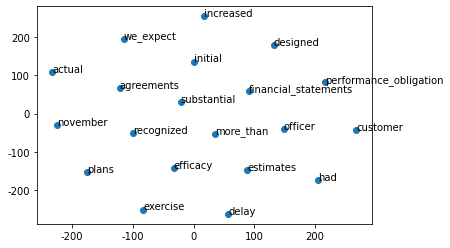

In [ ]:
words_vector_tsne = TSNE(n_components=2).fit_transform(words_vector)  # from high dim to dim = 2

plt.figure()
# plt.rcParams['font.sans-serif'] = ['SimHei'] 
# plt.rcParams['axes.unicode_minus'] = False
plt.scatter(words_vector_tsne[:, 0], words_vector_tsne[:, 1])
for i, vec in enumerate(words_vector_tsne):
    x, y = vec[0], vec[1]
    plt.text(x, y, words_name[i], size=10)
plt.show()  # see if similar words are close

# Embedding 3.0 trigram for complete 10K

## Setting up Hosted runtime conda env

In [ ]:
import pandas as pd
import itertools
import spacy
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime

# import chart_studio
# import chart_studio.plotly as py
# import chart_studio.tools as tls
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

from tqdm.notebook import tqdm_notebook
from tqdm import  tqdm
tqdm_notebook.pandas(desc="progress bar")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

ModuleNotFoundError: ignored

## read in 10k data for a all years
Takes 5min to read from 2016 to 2021.
Takes about 2 min for each csv to drop dupes and save to file.

In [ ]:
dir_10ks = '10ks_para_sics/'
file_name_prefix_10ks = dir_10ks + '10ks_para_sics_'

# df_selected_year_10ks = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv')

# read with row limits
# df_selected_year_10ks = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv', nrows = 100)


In [ ]:
# read in dataframe from 2016 to 2022

selected_year_10ks_sample_dir = f'complete_10ks' # os.mkdir(selected_year_10ks_sample_dir)

for year in range(2016,2022):
  print(year)
  exec('df_{}_10ks = pd.DataFrame()'.format(year))
  current_df = pd.read_csv(file_name_prefix_10ks + str(year) + '.csv')
  

  # drop duplicates
  current_df['10K_id'] = current_df.apply(lambda row: row['id'].rsplit('_', 1)[0], axis=1)
  current_df_deduped = current_df.drop_duplicates(subset=['10K_id', 'text'], keep='first')
  current_df_deduped.drop(['10K_id'], inplace=True, axis=1)
  globals()['df_'+str(year)+'_10ks'] = current_df_deduped

  # save to files
  current_df_deduped.to_csv(f'{selected_year_10ks_sample_dir}/df_{year}_10ks_deduped.csv', index=False)

2020
2021


In [13]:
# working directory
%cd "/content/gdrive/MyDrive/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed/complete_10ks"
!pwd

# readin all the files
for year in range(2016,2022):
  print(year)
  exec('df_{}_10ks = pd.DataFrame()'.format(year))
  globals()['df_'+str(year)+'_10ks'] = pd.read_csv(f'df_{year}_10ks_deduped.csv')

/content/gdrive/.shortcut-targets-by-id/1OPzVNu0CgKsi5tBwlMJVXZTu1EWX9F6C/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed/complete_10ks
/content/gdrive/.shortcut-targets-by-id/1OPzVNu0CgKsi5tBwlMJVXZTu1EWX9F6C/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed/complete_10ks
2016
2017
2018
2019
2020
2021


In [14]:
# put deduped df together

full_10ks = [df_2016_10ks, df_2017_10ks, df_2018_10ks, df_2019_10ks, df_2020_10ks, df_2021_10ks]
df_10ks_16_21 = df_2016_10ks
df_10ks_16_21 = pd.concat(full_10ks)
df_10ks_16_21

id ticker_display  \
0        2016Q1_SC_10-K_20151231_0001580608-16-000185.t...             SC   
1        2016Q1_SC_10-K_20151231_0001580608-16-000185.t...             SC   
2        2016Q1_SC_10-K_20151231_0001580608-16-000185.t...             SC   
3        2016Q1_SC_10-K_20151231_0001580608-16-000185.t...             SC   
4        2016Q1_SC_10-K_20151231_0001580608-16-000185.t...             SC   
...                                                    ...            ...   
1976643  2021Q1_BXG_10-K_20201231_0000778946-21-000012....            BXG   
1976644  2021Q1_BXG_10-K_20201231_0000778946-21-000012....            BXG   
1976645  2021Q1_BXG_10-K_20201231_0000778946-21-000012....            BXG   
1976646  2021Q1_BXG_10-K_20201231_0000778946-21-000012....            BXG   
1976647  2021Q1_BXG_10-K_20201231_0000778946-21-000012....            BXG   

        primary_industry_id                                               text  
0                     FN-CF  Indicate by check mark whether the registrant ...  
1                     FN-CF  Indicate by check mark whether the registrant ...  
2                     FN-CF  Indicate by check mark if disclosure of delinq...  
3                     FN-CF  Portions of the registrant's definitive proxy ...  
4                     FN-CF  This Annual Report on Form 10-K contains forwa...  
...                     ...                                                ...  
1976643               SV-HL    NBA Receivables Facility.   Bluegreen/Big Ce...  
1976644               SV-HL  efforts to renew or replace credit facilities ...  
1976645               SV-HL   REPORT OF INDEPENDENT REGISTERED PUBLIC ACCOU...  
1976646               SV-HL  interest due under the Liberty Bank Facility a...  
1976647               SV-HL   Item 9.    CHANGES IN AND DISAGREEMENTS WITH ...  

[11443419 rows x 4 columns]

In [17]:
# saving complete csv takes 5 minutes.
print(df_10ks_16_21.shape)
df_10ks_16_21.to_csv('16_21_10ks.csv.gz', compression='gzip', index=False)


(11443419, 4)


## Local runtime starts from here: data preprocessing

In [10]:
%%bash
# pip install spacy
# pip install plotly
pip install gensim

In [16]:
import pandas as pd
import itertools
import spacy
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime

# import chart_studio
# import chart_studio.plotly as py
# import chart_studio.tools as tls
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

from tqdm.notebook import tqdm_notebook
from tqdm import  tqdm
tqdm_notebook.pandas(desc="progress bar")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### [start from here]tokenizers(unigram)
text to sentense runtime: ~4s

In [17]:
df_10ks = pd.read_csv('16_21_10ks.csv.gz', compression = 'gzip')
df_10ks

id ticker_display  \
0         2016Q1_SC_10-K_20151231_0001580608-16-000185.t...             SC   
1         2016Q1_SC_10-K_20151231_0001580608-16-000185.t...             SC   
2         2016Q1_SC_10-K_20151231_0001580608-16-000185.t...             SC   
3         2016Q1_SC_10-K_20151231_0001580608-16-000185.t...             SC   
4         2016Q1_SC_10-K_20151231_0001580608-16-000185.t...             SC   
...                                                     ...            ...   
11443414  2021Q1_BXG_10-K_20201231_0000778946-21-000012....            BXG   
11443415  2021Q1_BXG_10-K_20201231_0000778946-21-000012....            BXG   
11443416  2021Q1_BXG_10-K_20201231_0000778946-21-000012....            BXG   
11443417  2021Q1_BXG_10-K_20201231_0000778946-21-000012....            BXG   
11443418  2021Q1_BXG_10-K_20201231_0000778946-21-000012....            BXG   

         primary_industry_id  \
0                      FN-CF   
1                      FN-CF   
2                      FN-CF   
3                      FN-CF   
4                      FN-CF   
...                      ...   
11443414               SV-HL   
11443415               SV-HL   
11443416               SV-HL   
11443417               SV-HL   
11443418               SV-HL   

                                                       text  
0         Indicate by check mark whether the registrant ...  
1         Indicate by check mark whether the registrant ...  
2         Indicate by check mark if disclosure of delinq...  
3         Portions of the registrant's definitive proxy ...  
4         This Annual Report on Form 10-K contains forwa...  
...                                                     ...  
11443414    NBA Receivables Facility.   Bluegreen/Big Ce...  
11443415  efforts to renew or replace credit facilities ...  
11443416   REPORT OF INDEPENDENT REGISTERED PUBLIC ACCOU...  
11443417  interest due under the Liberty Bank Facility a...  
11443418   Item 9.    CHANGES IN AND DISAGREEMENTS WITH ...  

[11443419 rows x 4 columns]

In [18]:


import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
import nltk.data
import logging
import numpy as np
from gensim.models import Word2Vec
from gensim.models import fasttext


In [19]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

# stopwords_exp = stopwords.words("english") + ['e','d']
my_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
       'but', 'if', 'because', 's', 't',
       'don', "don't", 'should', "should've", 'now', 'd', 'll',
       'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn',
       "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't",
       'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma',
       'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",
       'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't",
       'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"] + ['e', 'd', 'yes', 'no', 'b', 'k']

def text_to_wordlist( text, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    text = BeautifulSoup(text).get_text()
    #  
    # 2. Remove non-letters
    text = re.sub("[^a-zA-Z]"," ", text)
    #
    # 3. Convert words to lower case and split them
    words = text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(my_stopwords)
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [ ]:
# Download the punkt tokenizer for sentence splitting
import nltk.data
nltk.download("popular")   

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# load stopwords
nltk.download("stopwords")

# Define a function to split a review into parsed sentences
def text_to_sentences( text, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(text.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( text_to_wordlist( raw_sentence, \
              remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words, so this returns a list of lists
    return sentences

In [23]:


sentences = []  # Initialize an empty list of sentences
nltk.download("stopwords")
from nltk.corpus import stopwords
import pickle

# Tokenizing
# 3000 samples take 1m20s
# 6 yrs takes on local VM for at least 95 hours...

print ("Parsing sentences from training set")
for text in df_10ks['text']:
    # print(text)
    sentences += text_to_sentences(text, tokenizer, False)



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sivanding/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Parsing sentences from training set


/home/sivanding/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "http://thrivida.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/home/sivanding/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "https://www.ncbi.nlm.nih.gov/pubmed/21856988." looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/home/sivanding/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "http://www.cdc.gov/hai/pdfs/hai/scottcostpaper.pdf." looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and 

KeyboardInterrupt: ignored

In [ ]:
print(df_10ks.index("https://www.dhs.gov/sites/default/files/publications/20_0124_plcy_counterfeit-pirated-goods-report_01.pdf"))

In [ ]:
# Save tokenizers in a file

import pickle
#saving
with open(f'/16_21_tokenizer.pickle', 'wb') as handle:
  pickle.dump(sentences, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading as one file
with open(f'16_21_tokenizer.pickle', 'rb') as handle:
    sentences += pickle.load(handle)

In [ ]:
# check sentences
print(len(comp_sentences))
# print(sentences[0])
print(np.array(comp_sentences[:10]))

# check word list
from gensim import corpora
from gensim.models import TfidfModel

# show dictionary of tokenized text
id2word = corpora.Dictionary(comp_sentences)
print(id2word)
sorted(id2word.token2id.items(), key=lambda x: x[1], reverse=False)
print(id2word.token2id)
# texts = data_bigrams_trigrams
# corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

11949
[list(['indicate', 'by', 'check', 'mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding', 'months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days'])
 list(['yes', 'no'])
 list(['indicate', 'by', 'check', 'mark', 'whether', 'the', 'registrant', 'has', 'submitted', 'electronically', 'every', 'interactive', 'data', 'file', 'required', 'to', 'be', 'submitted', 'pursuant', 'to', 'rule', 'of', 'regulation', 's', 't', 'of', 'this', 'chapter', 'during', 'the', 'preceding', 'months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'submit', 'such', 'files'])
 list(['yes', 'no'])
 list(['indicate', 'by', 'chec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


Dictionary(8656 unique tokens: ['act', 'all', 'and', 'be', 'been']...)
{'act': 0, 'all': 1, 'and': 2, 'be': 3, 'been': 4, 'by': 5, 'check': 6, 'd': 7, 'days': 8, 'during': 9, 'exchange': 10, 'file': 11, 'filed': 12, 'filing': 13, 'for': 14, 'has': 15, 'indicate': 16, 'mark': 17, 'months': 18, 'of': 19, 'or': 20, 'past': 21, 'period': 22, 'preceding': 23, 'registrant': 24, 'reports': 25, 'required': 26, 'requirements': 27, 'section': 28, 'securities': 29, 'shorter': 30, 'subject': 31, 'such': 32, 'that': 33, 'the': 34, 'to': 35, 'was': 36, 'whether': 37, 'no': 38, 'yes': 39, 'chapter': 40, 'data': 41, 'electronically': 42, 'every': 43, 'files': 44, 'interactive': 45, 'pursuant': 46, 'regulation': 47, 'rule': 48, 's': 49, 'submit': 50, 'submitted': 51, 't': 52, 'this': 53, 'a': 54, 'accelerated': 55, 'an': 56, 'company': 57, 'emerging': 58, 'filer': 59, 'growth': 60, 'is': 61, 'large': 62, 'non': 63, 'reporting': 64, 'smaller': 65, 'b': 66, 'definitions': 67, 'in': 68, 'see': 69, 'annual

### bigram tokenizers: phrases within tokenizing (**with Phraser**)

#### n-gram pipelines

In [ ]:
from gensim.models.phrases import Phrases, Phraser
def build_phrases(sentences, min_count, threshold):
    phrases = Phrases(sentences,
                      min_count=min_count,
                      threshold=threshold,
                      progress_per=1000)
    return Phraser(phrases)


# build phrase model
comp_bi_phrases_model = build_phrases(comp_sentences, 5, 100)

# save bi-gram phrase model
comp_bi_phrases_model.save('comp_bi_phrases_model.txt')
comp_bi_phrases_model= Phraser.load('comp_bi_phrases_model.txt')


In [ ]:
# bi-gram extraction
def sentence_to_bi_grams(phrases_model, sentence):
    return ' '.join(phrases_model[sentence])

# bi-gram concatenation
def sentences_to_bi_grams(n_grams, tokenized_sentences, output_file_name): 
    # with open(input_file_name, 'r') as input_file_pointer: 
        with open(output_file_name, 'w+') as out_file: 
            for tokenized_sentence in tokenized_sentences: 
                # clean_sentence = clean_sentence(sentence) 
                # tokenized_sentence = tokenize(cleaned_sentence) 
                parsed_sentence = sentence_to_bi_grams(n_grams, tokenized_sentence) 
                out_file.write(parsed_sentence + '\n')

sentences_to_bi_grams(comp_bi_phrases_model, comp_sentences, "comp_bigram.txt")

# build bi-gram form tokenizers
comp_bi_sentences = []
for bi_sentence in open("sample_bigram.txt").readlines():
  comp_bi_sentences.append(bi_sentence.split())
print(comp_bi_sentences[:10])



[['indicate', 'by', 'check_mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding_months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days'], ['yes_no'], ['indicate', 'by', 'check_mark', 'whether', 'the', 'registrant', 'has', 'submitted', 'electronically', 'every', 'interactive', 'data', 'file', 'required', 'to', 'be', 'submitted', 'pursuant', 'to', 'rule', 'of', 'regulation', 's', 't', 'of', 'this', 'chapter', 'during', 'the', 'preceding_months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'submit', 'such', 'files'], ['yes_no'], ['indicate', 'by', 'check_mark', 'whether', 'the', 'registrant', 'is', 'a', '

In [ ]:
print(len(comp_bi_phrases_model.phrasegrams.keys()))
print(comp_bi_phrases_model.phrasegrams.keys())


# for bigram in bi_phrases_model.phrasegrams.keys():
#     print(bigram)

# for ngrams, _ in bi_phrases_model.vocab.items():
#     unicode_ngrams = ngrams.decode('utf-8')
#     if '_' in unicode_ngrams:
#         print(unicode_ngrams)

684
dict_keys([(b'check', b'mark'), (b'mark', b'whether'), (b'preceding', b'months'), (b'yes', b'no'), (b'large', b'accelerated'), (b'accelerated', b'filer'), (b'smaller', b'reporting'), (b'emerging', b'growth'), (b'filer', b'smaller'), (b'annual', b'report'), (b'form', b'k'), (b'forward', b'looking'), (b'looking', b'statements'), (b'safe', b'harbor'), (b'differ', b'materially'), (b'you', b'should'), (b'intellectual', b'property'), (b'trade', b'names'), (b'microbiome', b'therapeutics'), (b'therapeutics', b'platform'), (b'ecobiotic', b'microbiome'), (b'colonic', b'microbiome'), (b'immune', b'system'), (b'infectious', b'diseases'), (b'microbiome', b'therapeutic'), (b'clinical', b'trials'), (b'know', b'how'), (b'competitive', b'advantage'), (b'clostridium', b'difficile'), (b'difficile', b'infection'), (b'phase', b'b'), (b'metastatic', b'melanoma'), (b'active', b'mild'), (b'moderate', b'uc'), (b'randomized', b'double'), (b'placebo', b'controlled'), (b'modified', b'mayo'), (b'serious', b'ad

In [ ]:

# build trigram and four-gram phrase model
comp_tri_phrases_model = build_phrases(comp_bi_sentences, 5, 10)

# save tri-gram and four-gram phrase model
comp_tri_phrases_model.save('comp_tri_phrases_model.txt')
comp_tri_phrases_model= Phraser.load('comp_tri_phrases_model.txt')

In [ ]:
# building tri-gram and four-gram in similar approach
sentences_to_bi_grams(comp_tri_phrases_model, comp_bi_sentences, "comp_sample_trigram.txt")
tri_sentences = []
uni_gram = []
bi_grams = []
tri_grams = []
four_grams = []
for tri_sentence in open("comp_sample_trigram.txt").readlines():
    tri_sentences.append(tri_sentence.split())
  
# Manually delete four-gram and count grams
for sentence_i in range(len(tri_sentences)):
  for index in range(len(tri_sentences[sentence_i])-1, 0, -1):
    if tri_sentences[sentence_i][index].count("_") > 2:
      four_grams.append(tri_sentences[sentence_i][index])
      # del tri_sentences[sentence_i][index]
    elif tri_sentences[sentence_i][index].count("_") == 1:
      bi_grams.append(tri_sentences[sentence_i][index])
    elif tri_sentences[sentence_i][index].count("_") == 2:
      tri_grams.append(tri_sentences[sentence_i][index])
    else:
      uni_gram.append(tri_sentences[sentence_i][index])

uni_gram = set(uni_gram)
bi_grams = set(bi_grams)
tri_grams =set(tri_grams)
four_grams =set(four_grams)

# preview grams
print(tri_sentences[:10])
print(uni_gram)
print(bi_grams)
print(tri_grams)
print(four_grams)

# see sizes
# print(sum( [len(listElem) for listElem in tri_sentences]))
print(len(set([tuple(t) for t in sentences])))
print(len(uni_gram))
print(len(bi_grams))
print(len(tri_grams))
print(len(four_grams))
# print(len(tri_phrases_model.phrasegrams.keys()))
# print(tri_phrases_model.phrasegrams.keys())


[['indicate_by', 'check_mark_whether', 'the', 'registrant_has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities_exchange', 'act', 'of', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has_been', 'subject', 'to', 'such', 'filing_requirements', 'for', 'the', 'past_days'], ['yes_no'], ['indicate_by', 'check_mark_whether', 'the', 'registrant_has', 'submitted', 'electronically', 'every', 'interactive', 'data', 'file', 'required', 'to', 'be_submitted', 'pursuant', 'to', 'rule', 'of', 'regulation', 's', 't', 'of', 'this', 'chapter', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required', 'to', 'submit', 'such', 'files'], ['yes_no'], ['indicate_by', 'check_mark_whether', 'the', 'registrant', 'is', 'a', 'large_accelerated_filer', 'an', 'accelerated_filer'

#### extra tests

In [ ]:
# check bi-gram model
print(bi_phrases_model["people in new york go to columbia university".split()])
test_sent = "The human microbiome is one of the richest and most diverse ecosystems on earth with a population of approximately 30 – 50 trillion microorganisms that live in our intestines mouth skin and elsewhere in or on the body.".split()
# ['we', 'are', 'initially', 'focused', 'on', 'implementing', 'our', 'microbiome_therapeutics', 'platform', 'to', 'develop', 'ecobiotic_microbiome', 'therapeutics', 'that', 'treat', 'dysbiosis', 'in', 'the', 'colonic_microbiome', 'one', 'of', 'the', 'most', 'diverse', 'microbial', 'ecologies', 'in', 'the', 'human', 'body']
bi_test = bi_phrases_model[test_sent]
tri_test = tri_phrases_model[bi_test]
print(bi_test)
print(tri_test)

# bi_test = sentence_to_bi_grams(bi_phrases_model, test_sent)
# tri_test = sentence_to_bi_grams(tri_phrases_model, bi_test)
# print(bi_test)
# print(tri_test)


['people', 'in', 'new_york', 'go', 'to', 'columbia', 'university']
['The', 'human', 'microbiome', 'is', 'one', 'of', 'the', 'richest', 'and', 'most', 'diverse', 'ecosystems', 'on', 'earth', 'with', 'a', 'population', 'of', 'approximately', '30', '–', '50', 'trillion', 'microorganisms', 'that', 'live', 'in', 'our', 'intestines', 'mouth', 'skin', 'and', 'elsewhere', 'in', 'or', 'on', 'the', 'body.']
['The', 'human_microbiome', 'is', 'one', 'of', 'the', 'richest', 'and', 'most', 'diverse', 'ecosystems', 'on', 'earth', 'with', 'a', 'population', 'of', 'approximately', '30', '–', '50', 'trillion', 'microorganisms', 'that', 'live', 'in', 'our', 'intestines', 'mouth', 'skin', 'and', 'elsewhere', 'in', 'or', 'on', 'the', 'body.']


In [ ]:


# check rows
print(len(sentences))
print(len(bi_sentences))
print(len(tri_sentences))

# check phrases of first sentence
print(sentences[0])
print(bi_sentences[0])
print(tri_sentences[0])
print(len(sentences[0]))
print(len(bi_sentences[0]))
print(len(tri_sentences[0]))
# print(sentences)

11949
11949
11949
['indicate', 'by', 'check', 'mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding', 'months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days']
['indicate', 'by', 'check_mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding_months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days']
['indicate_by', 'check_mar

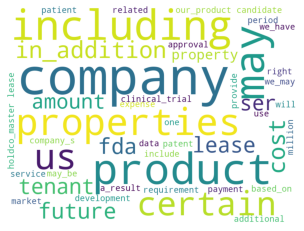

In [ ]:

from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
fig,ax=plt.subplots()

# with open(r'...\vanity fair.txt') as f:
#     text=f.read()
text = open("sample_bigram.txt").read()

mycloudword=WordCloud(width=800, 
                      height=600, 
                      scale=1, 
                      margin=2,
                      background_color='white',
                      max_words=200, 
                      min_font_size=20, 
                      max_font_size=140,
                      stopwords=STOPWORDS, 
                      random_state=50).generate(text)


ax.imshow(mycloudword)
ax.axis("off")
plt.show()

In [ ]:
# Import the built-in logging module and configure it so that Word2Vec 
# output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 200    # Word vector dimensionality                      
min_word_count = 20   # Minimum word count - this limits vocabulary size              
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print("Training model...")

# Using default architecture: skip-gram
bi_model = word2vec.Word2Vec(bi_sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
bi_model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
bi_model_name = "200features_20minwords_10context_bigram"
bi_model.save(bi_model_name)

2022-04-04 13:29:53,906 : INFO : collecting all words and their counts
2022-04-04 13:29:53,908 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-04-04 13:29:53,971 : INFO : PROGRESS: at sentence #10000, processed 301635 words, keeping 8362 word types
2022-04-04 13:29:53,986 : INFO : collected 9145 word types from a corpus of 359141 raw words and 11949 sentences
2022-04-04 13:29:53,987 : INFO : Loading a fresh vocabulary
2022-04-04 13:29:53,997 : INFO : effective_min_count=20 retains 1876 unique words (20% of original 9145, drops 7269)
2022-04-04 13:29:53,999 : INFO : effective_min_count=20 leaves 323714 word corpus (90% of original 359141, drops 35427)
2022-04-04 13:29:54,008 : INFO : deleting the raw counts dictionary of 9145 items
2022-04-04 13:29:54,009 : INFO : sample=0.001 downsamples 45 most-common words
2022-04-04 13:29:54,011 : INFO : downsampling leaves estimated 225406 word corpus (69.6% of prior 323714)
2022-04-04 13:29:54,019 : INFO : estimated

Training model...


2022-04-04 13:29:54,421 : INFO : training model with 4 workers on 1876 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:29:54,825 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:29:54,843 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:29:54,854 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:29:54,860 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:29:54,861 : INFO : EPOCH - 1 : training on 359141 raw words (225326 effective words) took 0.4s, 523493 effective words/s
2022-04-04 13:29:55,266 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:29:55,273 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:29:55,295 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:29:55,304 : INFO : worker thread finished; awaiting finish of 0 

## Training Word2Vec model with tri-gram tokenizers
lower min_word_count because of smaller vocab
runtime: ~1s

In [ ]:
# Import the built-in logging module and configure it so that Word2Vec 
# output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 150    # Word vector dimensionality                      
min_word_count = 5   # Minimum word count - this limits vocabulary size              
num_workers = 4       # Number of threads to run in parallel
context = 15          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
from gensim.models import Word2Vec
print("Training model...")

# Using default architecture: skip-gram
tri_model = word2vec.Word2Vec(comp_tri_sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
tri_model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
tri_model_name = "comp_150features_5minwords_15context_trigram"
tri_model.save(tri_model_name)

2022-04-04 13:29:27,116 : INFO : collecting all words and their counts


Training model...


2022-04-04 13:29:27,121 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-04-04 13:29:27,187 : INFO : PROGRESS: at sentence #10000, processed 273729 words, keeping 9881 word types
2022-04-04 13:29:27,201 : INFO : collected 10727 word types from a corpus of 326578 raw words and 11949 sentences
2022-04-04 13:29:27,202 : INFO : Loading a fresh vocabulary
2022-04-04 13:29:27,218 : INFO : effective_min_count=4 retains 6663 unique words (62% of original 10727, drops 4064)
2022-04-04 13:29:27,219 : INFO : effective_min_count=4 leaves 319788 word corpus (97% of original 326578, drops 6790)
2022-04-04 13:29:27,245 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:29:27,247 : INFO : sample=0.001 downsamples 35 most-common words
2022-04-04 13:29:27,251 : INFO : downsampling leaves estimated 230621 word corpus (72.1% of prior 319788)
2022-04-04 13:29:27,272 : INFO : estimated required memory for 6663 words and 200 dimensions: 13992300 bytes
2022

## Tests for 3grams model

### unigram tasks revisit

In [ ]:
# checking model results
# model.doesnt_match("identify statements term such".split())
print(tri_model.wv.doesnt_match("statements term products cost".split()))
print(tri_model.wv.most_similar("equity"))
print(tri_model.wv.most_similar("patent"))
print(tri_model.wv.similarity("agreement", "statements"))

term
[('interests', 0.9886375665664673), ('note', 0.9871084094047546), ('recurring', 0.9836004972457886), ('restructuring', 0.9813556671142578), ('portfolio', 0.9781492948532104), ('senior_unsecured', 0.9775498509407043), ('discussion', 0.9764997959136963), ('investment', 0.9763639569282532), ('revenues', 0.9760096073150635), ('annual_report_on', 0.9742156267166138)]
[('does_not', 0.9886793494224548), ('fails', 0.9863079190254211), ('what', 0.9854890704154968), ('renew', 0.9826957583427429), ('practice', 0.9826781153678894), ('imply', 0.9796797633171082), ('product', 0.9793249368667603), ('party', 0.9791011810302734), ('no_assurance', 0.9790675640106201), ('restore', 0.9787293672561646)]
0.27695295


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
tri_model.wv.most_similar(positive = ['rights', 'patent'], negative = ['properties'], topn = 10)

[('product', 0.9404640793800354),
 ('it', 0.9336739182472229),
 ('it_is', 0.9283263683319092),
 ('must', 0.9094356894493103),
 ('vie', 0.9039958715438843),
 ('does_not', 0.901915431022644),
 ('approved', 0.8990758657455444),
 ('applicable', 0.8957728147506714),
 ('primary_beneficiary', 0.8951925039291382),
 ('bank_holding_company', 0.8935604095458984)]

In [ ]:
words = tri_model.wv.index2word
print(len(words))
print(words[:100])
print(tri_model['financial'][:10])
# for word in words:
    # print(word,model[word])

3567
['the', 'of', 'and', 'to', 'our', 'in', 'or', 'a', 'for', 'we', 'that', 'as', 'may', 'are', 'is', 'on', 'with', 'by', 'be', 'any', 'other', 'which', 'from', 'not', 'have', 'if', 'company', 'such', 'at', 'these', 'december', 'an', 'under', 'us', 'properties', 'including', 'certain', 'million', 'could', 'also', 'subject', 'all', 'business', 's', 'its', 'will', 'this', 'future', 'shares', 'operations', 'was', 'result', 'in_addition', 'during', 'management', 'products', 'ability', 'their', 'property', 'were', 'assets', 'company_s', 'development', 'costs', 'time', 'fda', 'required', 'additional', 'lease', 'each', 'will_be', 'svc', 'services', 'related', 'has', 'generally', 'period', 'based_on', 'use', 'results', 'requirements', 'product', 'it', 'treatment', 'reit', 'u_s', 'amount', 'market', 'changes', 'united_states', 'data', 'one', 'financial', 'new', 'product_candidates', 'available', 'include', 'approval', 'agreement', 'tenants']
[-0.04308179  0.02554431  0.11382531  0.05951478 -0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


### Bi-gram tasks

In [ ]:
print(np.array(tri_sentences[40:60]))

[list(['from', 'these', 'clinical', 'data', 'we', 'identify', 'the', 'microbiological', 'and', 'functional', 'differences_between', 'a', 'healthy', 'and', 'a', 'diseased', 'microbiome', 'which', 'we', 'then', 'use', 'to', 'design', 'potential', 'ecobiotic_microbiome_therapeutics'])
 list(['after', 'further', 'in', 'lab', 'preclinical_testing', 'selected', 'ecobiotic_microbiome_therapeutic', 'candidates', 'are', 'then', 'studied', 'in', 'clinical_trials'])
 list(['we', 'apply', 'a', 'comparative', 'genomic', 'systems', 'biology', 'framework', 'that', 'leverages', 'proprietary', 'computational', 'microbiological', 'and', 'screening', 'capabilities', 'to', 'design', 'lead', 'candidates', 'that', 'target', 'the', 'microbiological', 'and', 'functional', 'deficiencies', 'identified', 'in', 'the', 'setting', 'of', 'human', 'disease'])
 list(['we', 'are', 'able', 'to', 'apply', 'this', 'framework', 'and', 'experience', 'to', 'clinical', 'data', 'sets', 'from', 'published', 'studies', 'and', 't

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
# vector comparison
tri_words = tri_model.wv.index2word
print(len(tri_words))
print(np.array(tri_words[:500]))

bi_words = bi_model.wv.index2word
print(len(bi_words))
print(np.array(bi_words[:100]))

# words = model.wv.index2word
# print(len(words))
# print(np.array(words))

3567
['the' 'of' 'and' 'to' 'our' 'in' 'or' 'a' 'for' 'we' 'that' 'as' 'may'
 'are' 'is' 'on' 'with' 'by' 'be' 'any' 'other' 'which' 'from' 'not'
 'have' 'if' 'company' 'such' 'at' 'these' 'december' 'an' 'under' 'us'
 'properties' 'including' 'certain' 'million' 'could' 'also' 'subject'
 'all' 'business' 's' 'its' 'will' 'this' 'future' 'shares' 'operations'
 'was' 'result' 'in_addition' 'during' 'management' 'products' 'ability'
 'their' 'property' 'were' 'assets' 'company_s' 'development' 'costs'
 'time' 'fda' 'required' 'additional' 'lease' 'each' 'will_be' 'svc'
 'services' 'related' 'has' 'generally' 'period' 'based_on' 'use'
 'results' 'requirements' 'product' 'it' 'treatment' 'reit' 'u_s' 'amount'
 'market' 'changes' 'united_states' 'data' 'one' 'financial' 'new'
 'product_candidates' 'available' 'include' 'approval' 'agreement'
 'tenants' 'more' 'due' 'those' 'ser' 'income' 'applicable' 'securities'
 'operating' 'through' 'no' 'value' 'vicinium' 'significant' 'risk'
 'current'

In [ ]:
# check similarity
print(tri_model.wv.doesnt_match("financial statements terms in_addition cost".split()))
print(tri_model.wv.most_similar("performance_obligation"))
print(tri_model.wv.similarity("may_be", "in_addition"))
tri_model.wv.most_similar(positive = ['rights', 'patent'], negative = ['operating_partnership'], topn = 10)

terms
[('method', 0.998005747795105), ('transaction_price', 0.9962403178215027), ('until', 0.9962165355682373), ('reference_product', 0.9961352944374084), ('b', 0.9952586889266968), ('six_months', 0.9944313764572144), ('one_year', 0.9942219853401184), ('within_days', 0.9941058158874512), ('days', 0.9940553903579712), ('market_exclusivity', 0.9939128160476685)]


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


KeyError: ignored

In [ ]:
# check bi-gram vector

print(tri_model['financial_statements'])

[ 0.03670413  0.04467368  0.07223174 -0.04929886  0.14935064  0.04332414
  0.09428374  0.01245075  0.08956733  0.1849683  -0.00991827  0.004048
  0.00867787 -0.00183245  0.18731722  0.02601435 -0.06376855 -0.00202463
  0.10141489  0.05918287 -0.15032929 -0.05948171 -0.00410475  0.12783767
 -0.06255154 -0.07900032  0.0065693  -0.0085132   0.03942611  0.12115411
 -0.06354938  0.07203832 -0.06971461 -0.08169822 -0.08166199 -0.01734529
 -0.07055935 -0.00586445 -0.06756555 -0.11813731 -0.01180653 -0.09619471
 -0.06796102 -0.15645832  0.06264407  0.17536433  0.13171631  0.03395368
 -0.23214965 -0.13785248  0.01140057 -0.08524673 -0.09437026 -0.07492419
 -0.05999158  0.06735806 -0.13670109 -0.03594421 -0.04085476 -0.182882
 -0.06604591 -0.17266712 -0.00293767  0.11695794 -0.03666683 -0.01953185
  0.04042882 -0.04496082 -0.0209622   0.03455377 -0.05751946  0.05545133
 -0.02700187 -0.02257266  0.11716054  0.10045001 -0.13095695 -0.02655536
  0.0539871   0.1001749   0.05248135  0.00983323  0.017

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


### tasks with DEI terms

In [ ]:
# load model
tri_model_name = "200features_5minwords_10context_trigram"
tri_model = Word2Vec.load(tri_model_name)

2022-04-04 13:30:01,225 : INFO : loading Word2Vec object from 200features_5minwords_10context_trigram
2022-04-04 13:30:01,333 : INFO : loading wv recursively from 200features_5minwords_10context_trigram.wv.* with mmap=None
2022-04-04 13:30:01,335 : INFO : setting ignored attribute vectors_norm to None
2022-04-04 13:30:01,337 : INFO : loading vocabulary recursively from 200features_5minwords_10context_trigram.vocabulary.* with mmap=None
2022-04-04 13:30:01,339 : INFO : loading trainables recursively from 200features_5minwords_10context_trigram.trainables.* with mmap=None
2022-04-04 13:30:01,342 : INFO : setting ignored attribute cum_table to None
2022-04-04 13:30:01,344 : INFO : loaded 200features_5minwords_10context_trigram


In [ ]:
# vector comparison
# tri_words = tri_model.wv.sort_by_descending_frequency()
tri_words = tri_model.wv.index2word
print(len(tri_words))
print(np.array(tri_words[:1000]))

bi_words = bi_model.wv.index2word
print(len(bi_words))
print(np.array(bi_words[:100]))

5883
['the' 'of' 'and' 'to' 'our' 'in' 'or' 'a' 'for' 'we' 'that' 'as' 'may'
 'are' 'is' 'on' 'with' 'by' 'be' 'any' 'other' 'which' 'from' 'not'
 'have' 'if' 'company' 'such' 'at' 'these' 'december' 'an' 'under' 'us'
 'properties' 'including' 'certain' 'million' 'could' 'also' 'subject'
 'all' 'business' 's' 'its' 'will' 'this' 'future' 'shares' 'operations'
 'was' 'result' 'in_addition' 'during' 'management' 'products' 'ability'
 'their' 'property' 'were' 'assets' 'company_s' 'development' 'costs'
 'time' 'fda' 'required' 'additional' 'lease' 'each' 'will_be' 'svc'
 'services' 'related' 'has' 'generally' 'period' 'based_on' 'use'
 'results' 'requirements' 'product' 'it' 'treatment' 'reit' 'u_s' 'amount'
 'market' 'changes' 'united_states' 'data' 'one' 'financial' 'new'
 'product_candidates' 'available' 'include' 'approval' 'agreement'
 'tenants' 'more' 'due' 'those' 'ser' 'income' 'applicable' 'securities'
 'operating' 'through' 'no' 'value' 'vicinium' 'significant' 'risk'
 'current'

In [ ]:
from posixpath import pardir
# check similarity

risk_terms=  ['strike', 'sit_in', 'operational_disruption', 'protest', 'injury', 
              'operational_disruption', 'operating_cost', 'delay', 'disruption',
              'lawsuit', 'litigation', 'impoundment', 'detain','penalt', 'sanction', 'court', 'consent_decree',
              'brand_damage', 'monetary_damage','brand_reputation', 'brand_recognition','social_license','decreased_trust','decreased_innovation','lost_opportunity', 'resign',
              'divest', 'restitution', 'conciliation_agreement',
              'modern_slavery', 'debt_bondage', 'human_traffic',
              'alleg', 'accus', 'exploit', 'publicly_expose', 'investigat', 'enforcement', 'security_force', 'inspection', 'inspector',
              'scandal', 'government_action', 'share_price', 'share_value']

practice_terms = ['wage','wage_theft','living_wage',
                  'precarity', 'precarious_work','gig_work','alternative_work','alternate_work','contingent_work','informal_work','casual_work','hazardous_work',
                  'confinement', 'document_retention','restriction_of_movement','delayed_wage','pay_manipulation','punishment', 'poor food','deprivation','unpaid_wage', 'delayed_payment','wage_violation',
                  'freedom_of_association','collective_bargaining', 'work_stoppage','hotline',
                  'code_of_conduct', 'due_diligence','ethical_recruit', 'handbook','social_audit','equal_benefits','transparency', 'traceability', 'visibility', 'accessibility','timely_payments','union', 'worker_committee','empower', 'accommodation',
                  'outsource', 'subcontracting','program', 'initiative', 'training','exempt', 'recruit', 'promotion', 'arbitration','mentorship', 'affirmative_action',
                   'order_delay','lead_time','unplanned_shipment','corruption', 'quota_system', 'delayed_payment','weak_governance', 'wage_violation','informal_supply_chain', 'last-minute_order_modification', 'unfair_timing_demand', 'pricing_pressure','poor_forecasting', 'irresponsible_exit']
# print(tri_model.wv.doesnt_match("financial statements terms in_addition cost".split()))
def check_occ(terms, vocab):
  coterms = []
  for term in terms:
    if term in vocab:
      coterms.append(term)
  return coterms

risk_coterms = check_occ(risk_terms, tri_words)
practice_coterms = check_occ(practice_terms, tri_words)
print("risk:", len(risk_coterms), "practice:", len(practice_coterms))

# most similar
print("Risks:")
for term in risk_coterms:
  print("most_similar", term, tri_model.wv.most_similar(term, topn = 5))
  # print("most_similar_cosmul", term, tri_model.wv.most_similar_cosmul(term, topn = 5))
  # print("centroid", term, tri_model.wv.rank_by_centrality(term))
  # print("similar_by_key", term, tri_model.wv.similar_by_word(term))

print("Practice:")
for term in practice_coterms:
  print(term, tri_model.wv.most_similar(term, topn = 5))

# pair comparison
pairs = [['price', 'value'], ['product','products'],['property','asset'], ['equal', 'equity'], # intuitively similar words
         ['less', 'more'], ['decrease', 'increase'], ['success', 'failure'], ['above', 'below']] # intuitively opposite words
for pair in pairs:
  print(pair, tri_model.wv.similarity(*pair))
  # print(pair, tri_model.wv.relative_cosine_similarity(*pair))
# print(tri_model.wv.most_similar(positive = ['fair_value', 'equity'], negative = ['risk'], topn = 10))

# analogies
def analogy(worda, wordb, wordc):
    result = tri_model.wv.most_similar(negative=[worda], 
                                positive=[wordb, wordc])
    return result

negs = ['less', 'failure', 'below']
analogies = [analogy('decrease', 'increase', neg) for neg in negs]
display(analogies)

2022-04-04 13:30:01,532 : INFO : precomputing L2-norms of word weight vectors


risk: 9 practice: 11
Risks:
most_similar strike [('approximately', 0.9933938980102539), ('approximately_million', 0.9912269711494446), ('billion', 0.9879677295684814), ('modified_mayo', 0.9872329235076904), ('january', 0.9862313270568848)]
most_similar injury [('work', 0.9984647631645203), ('follow', 0.9979711174964905), ('natural_disasters', 0.9976847171783447), ('efficient', 0.997649073600769), ('elements', 0.9975494146347046)]
most_similar delay [('cause', 0.9974578022956848), ('limit', 0.9948245882987976), ('proprietary_information', 0.9930590987205505), ('generate_revenue', 0.9928991794586182), ('significantly', 0.992605447769165)]
most_similar disruption [('could_harm', 0.9920597076416016), ('business_strategy', 0.9913638830184937), ('capital_resources', 0.9912766814231873), ('could_adversely_affect', 0.9911504983901978), ('commercialization_efforts', 0.989228367805481)]
most_similar lawsuit [('once', 0.9972646236419678), ('body', 0.9972394108772278), ('exempt', 0.997081279754638

[[('limit', 0.9930518269538879),
  ('some', 0.9923424124717712),
  ('managers', 0.9917946457862854),
  ('be_adversely_affected', 0.9900513291358948),
  ('adversely_affected', 0.9887820482254028),
  ('weaken', 0.9881138205528259),
  ('additional_financing', 0.9867679476737976),
  ('competitors', 0.9864538311958313),
  ('generate_revenue', 0.9860653877258301),
  ('trading_volume', 0.982947587966919)],
 [('taking', 0.981658935546875),
  ('may_prove', 0.9813777208328247),
  ('relinquish', 0.97672039270401),
  ('these', 0.9679750204086304),
  ('additional_financing', 0.9660961627960205),
  ('acquire', 0.9649408459663391),
  ('obtain', 0.9647849798202515),
  ('weaken', 0.9630248546600342),
  ('their_businesses', 0.9615572690963745),
  ('tenants', 0.9612085819244385)],
 [('significantly', 0.9929987192153931),
  ('generate_revenue', 0.991894543170929),
  ('invest', 0.990606963634491),
  ('impair', 0.9904859662055969),
  ('limit', 0.9895432591438293),
  ('proprietary_technology', 0.989461541175

In [ ]:
# test word analogies
import gensim.downloader as api

# Download the models
# fasttext_model300 = api.load('fasttext-wiki-news-subwords-300')
# word2vec_model300 = api.load('word2vec-google-news-300')
# glove_model300 = api.load('glove-wiki-gigaword-300')
# model = api.load("glove-wiki-gigaword-50")

# Correlation with human opinion on word similarity
from gensim.test.utils import datapath
# similarities = tri_model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))
# similarities = tri_model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))
# similarities2 = tri_model.wv.evaluate_word_pairs(datapath('simlex999.txt'))

# analogy test
# analogy_scores = tri_model.wv.evaluate_word_analogies(datapath('questions-words.txt'))

# print("similarities", similarities)
# print("similarities", similarities2)
# print("analogy", analogy_scores)


2022-04-04 13:30:01,603 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2022-04-04 13:30:01,607 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)


## Grid Search for 3-gram model

In [ ]:
# testing example for current model
tri_test = []
for term in risk_coterms+practice_coterms:
  tri_test.append(tri_model.wv.most_similar(term, topn = 30))


# print(tri_test)
df = pd.DataFrame(data = tri_test, index = risk_coterms+practice_coterms)
display(df)

0   \
strike               (approximately, 0.9933938980102539)   
injury                        (work, 0.9984647631645203)   
delay                        (cause, 0.9974578022956848)   
disruption              (could_harm, 0.9920597076416016)   
lawsuit                       (once, 0.9972646236419678)   
litigation               (carry_out, 0.9971609711647034)   
court                   (instrument, 0.9985125660896301)   
enforcement          (post_approval, 0.9988259673118591)   
inspection         (leahy_smith_act, 0.9927226901054382)   
due_diligence         (compositions, 0.9964054822921753)   
transparency           (false_claims, 0.997227132320404)   
visibility              (monitoring, 0.9975113868713379)   
outsource               (strategies, 0.9942771196365356)   
program                       (nine, 0.9977648854255676)   
training          (wells_fargo_bank, 0.9979535341262817)   
exempt                           (k, 0.9979476928710938)   
recruit        (qualified_personnel, 0.9971368312835693)   
promotion          (quality_control, 0.9990164637565613)   
arbitration               (unlikely, 0.9965136051177979)   
corruption               (extensive, 0.9978066086769104)   

                                                         1   \
strike          (approximately_million, 0.9912269711494446)   
injury                         (follow, 0.9979711174964905)   
delay                           (limit, 0.9948245882987976)   
disruption          (business_strategy, 0.9913638830184937)   
lawsuit                          (body, 0.9972394108772278)   
litigation          (approved_products, 0.9967620372772217)   
court                        (investor, 0.9975905418395996)   
enforcement               (challenging, 0.9988088607788086)   
inspection                   (decision, 0.9901573061943054)   
due_diligence               (achieving, 0.9962073564529419)   
transparency                (extensive, 0.9970675110816956)   
visibility                 (production, 0.9973903894424438)   
outsource                     (conduct, 0.9933700561523438)   
program        (endoscopic_improvement, 0.9976986050605774)   
training                   (efficiency, 0.9976845383644104)   
exempt                (priority_review, 0.9973451495170593)   
recruit                     (expansion, 0.9963570237159729)   
promotion                 (advertising, 0.9985110759735107)   
arbitration                      (libor, 0.995733380317688)   
corruption                  (political, 0.9976491332054138)   

                                                          2   \
strike                         (billion, 0.9879677295684814)   
injury               (natural_disasters, 0.9976847171783447)   
delay          (proprietary_information, 0.9930590987205505)   
disruption           (capital_resources, 0.9912766814231873)   
lawsuit                         (exempt, 0.9970812797546387)   
litigation                        (take, 0.9965547323226929)   
court                         (ultimate, 0.9972529411315918)   
enforcement                   (personal, 0.9987136125564575)   
inspection                   (authority, 0.9898481369018555)   
due_diligence                    (agree, 0.9958837032318115)   
transparency                     (fraud, 0.9970571398735046)   
visibility            (customer_service, 0.9972295165061951)   
outsource                        (debts, 0.9929608106613159)   
program                           (mild, 0.9976075291633606)   
training                         (truck, 0.9976804256439209)   
exempt                       (indicates, 0.9971902966499329)   
recruit                       (diversify, 0.995689332485199)   
promotion         (listing_requirements, 0.9984223246574402)   
arbitration                     (viable, 0.9953891038894653)   
corruption                        (fraud, 0.996604323387146)   

                                                           3   \
strike                    (modified_mayo, 0.987232923507690

In [ ]:
# working directory
path = "/content/gdrive/MyDrive/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed/tri_gram_grid_search"
# os.mkdir(path)
%cd "/content/gdrive/MyDrive/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed/tri_gram_grid_search"
! pwd

/content/gdrive/.shortcut-targets-by-id/1OPzVNu0CgKsi5tBwlMJVXZTu1EWX9F6C/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed/tri_gram_grid_search
/content/gdrive/.shortcut-targets-by-id/1OPzVNu0CgKsi5tBwlMJVXZTu1EWX9F6C/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed/tri_gram_grid_search


In [ ]:
# Set values for various parameters
num_features = [200]    # Word vector dimensionality                      
min_word_count = [10]   # Minimum word count - this limits vocabulary size              
num_workers = 4       # Number of threads to run in parallel
context = [10]          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

def gs(tokenizers, min_count = min_word_count, context_size = context, vector_size = num_features):
  # dataframes
  dfs = []
  
  for min_word_count in min_count:
    for context in context_size:
      for num_features in vector_size:
        print("Training model...")

        # Using default architecture: skip-gram
        tri_model = word2vec.Word2Vec(tokenizers, workers=num_workers, \
                size=num_features, min_count = min_word_count, \
                window = context, sample = downsampling)
        
        # save model
        tri_model_name = "{}features_{}minwords_{}context_trigram".format(num_features, min_word_count, context)
        print("Training model...", tri_model_name)

        # Using default architecture: skip-gram
        tri_model = word2vec.Word2Vec(tri_sentences, workers=num_workers, \
                    size=num_features, min_count = min_word_count, \
                    window = context, sample = downsampling)

        # If you don't plan to train the model any further, calling 
        # init_sims will make the model much more memory-efficient.
        tri_model.init_sims(replace=True)

        # It can be helpful to create a meaningful model name and 
        # save the model for later use. You can load it later using Word2Vec.load()
        
        tri_model.save(tri_model_name)

        
        # top similarities
        # make co-occurrence list
        tri_words = tri_model.wv.index2word
        risk_coterms = check_occ(risk_terms, tri_words)
        practice_coterms = check_occ(practice_terms, tri_words)
        sim_test = []
        for term in risk_coterms+practice_coterms:
          sim_test.append(tri_model.wv.most_similar(term, topn = 30))
        
        # df_sim = pd.DataFrame(data = sim_test, index = risk_coterms+practice_coterms, columns = [1,2,3,4,5])
        df_sim = pd.DataFrame(data = sim_test, index = risk_coterms+practice_coterms)
        dfs.append(df_sim)

        # # pair test
        # pair_test = []
        # for pair in pairs:
        #     pair_test.append(tri_model.wv.similarity(*pair))
            
        # df_pair = pd.DataFrame(data = pair_test, index = pairs)
        # dfs.append(df_pair)

        # to file
        df_sim.to_csv('{}.csv'.format(tri_model_name))
        
  return dfs

### search for num_features

In [ ]:
nf_gs = gs(tri_sentences, vector_size = [50, 100, 200, 300])


2022-03-31 15:58:23,963 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2022-03-31 15:58:23,972 : INFO : collecting all words and their counts
2022-03-31 15:58:23,976 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-31 15:58:24,140 : INFO : PROGRESS: at sentence #10000, processed 273328 words, keeping 9843 word types


Training model...


2022-03-31 15:58:24,185 : INFO : collected 10689 word types from a corpus of 326173 raw words and 11949 sentences
2022-03-31 15:58:24,193 : INFO : Loading a fresh vocabulary
2022-03-31 15:58:24,225 : INFO : effective_min_count=10 retains 3567 unique words (33% of original 10689, drops 7122)
2022-03-31 15:58:24,241 : INFO : effective_min_count=10 leaves 300696 word corpus (92% of original 326173, drops 25477)
2022-03-31 15:58:24,267 : INFO : deleting the raw counts dictionary of 10689 items
2022-03-31 15:58:24,276 : INFO : sample=0.001 downsamples 37 most-common words
2022-03-31 15:58:24,284 : INFO : downsampling leaves estimated 209786 word corpus (69.8% of prior 300696)
2022-03-31 15:58:24,310 : INFO : estimated required memory for 3567 words and 50 dimensions: 3210300 bytes
2022-03-31 15:58:24,318 : INFO : resetting layer weights
2022-03-31 15:58:27,263 : INFO : training model with 4 workers on 3567 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-03

ValueError: ignored

In [ ]:
# from google.colab import data_table
# from vega_datasets import data

# data_table.enable_dataframe_formatter()

for df in nf_gs:
  display(df)

1  \
delay            (potential, 0.9902563095092773)   
disruption    (interruption, 0.9880797863006592)   
lawsuit         (submission, 0.9883208870887756)   
litigation         (factors, 0.9881578683853149)   
court             (securing, 0.9936972260475159)   
enforcement    (challenging, 0.9982675909996033)   
transparency      (concerns, 0.9916974902153015)   
program          (secretary, 0.9947683215141296)   
training        (efficiency, 0.9970887899398804)   
recruit               (grow, 0.9919538497924805)   
promotion            (better, 0.994772732257843)   
arbitration      (disclosed, 0.9941774010658264)   
corruption         (pricing, 0.9969626069068909)   

                                                    2  \
delay                     (cause, 0.9892822504043579)   
disruption           (reputation, 0.9880272150039673)   
lawsuit                    (rule, 0.9875807166099548)   
litigation          (substantial, 0.9865521192550659)   
court                      (give, 0.9936701059341431)   
enforcement               (error, 0.9971636533737183)   
transparency      (federal_state, 0.9907255172729492)   
program                    (north, 0.994176983833313)   
training                (concepts, 0.996817409992218)   
recruit                (leverage, 0.9894872903823853)   
promotion               (governing, 0.99387526512146)   
arbitration   (medicinal_product, 0.9931746125221252)   
corruption          (experiences, 0.9919294714927673)   

                                                          3  \
delay                         (prevent, 0.9855485558509827)   
disruption                 (could_harm, 0.9867870807647705)   
lawsuit                        (update, 0.9856951236724854)   
litigation    (proprietary_information, 0.9826984405517578)   
court                        (disclose, 0.9931272864341736)   
enforcement                  (inherent, 0.9970351457595825)   
transparency   (financial_institutions, 0.9883411526679993)   
program                    (focused_on, 0.9941734075546265)   
training                   (processing, 0.9966902136802673)   
recruit                  (opportunities, 0.988794207572937)   
promotion                     (closely, 0.9938399791717529)   
arbitration              (satisfactory, 0.9926577806472778)   
corruption             (pharmaceutical, 0.9918277263641357)   

                                                        4  \
delay                      (financing, 0.983407735824585)   
disruption                 (prospects, 0.983432412147522)   
lawsuit                     (written, 0.9839335680007935)   
litigation         (substantial_costs, 0.982205331325531)   
court                           (way, 0.9926424622535706)   
enforcement            (member_states, 0.996740460395813)   
transparency              (extensive, 0.9883086085319519)   
program       (financial_instruments, 0.9937654733657837)   
training                 (production, 0.9958635568618774)   
recruit                   (covenants, 0.9851241111755371)   
promotion                   (imposes, 0.9935776591300964)   
arbitration      (foreign_regulatory, 0.9914990663528442)   
corruption               (healthcare, 0.9914765357971191)   

                                                       5  
delay                  (substantial, 0.9826462864875793)  
disruption               (be_harmed, 0.9831605553627014)  
lawsuit               (administered, 0.9834583401679993)  
litigation                    (delay, 0.980819582939148)  
court                       (status, 0.9923014640808105)  
enforcement               (involved, 0.9965382814407349)  
transparency           (authorities, 0.9880056381225586)  
program                  (tennessee, 0.9937241077423096)  
training         (biopharmaceutical, 0.9958111047744751)  
recruit                   (economic, 0.9849851727485657)  
promotion                      (anti, 0.993366539478302)  
arbitration   (accelerated_approval, 0.9908424019813538)  
corruption    

1  \
delay                  (potential, 0.9935972690582275)   
disruption             (prospects, 0.9927528500556946)   
lawsuit                 (american, 0.9937363266944885)   
litigation             (financing, 0.9891688823699951)   
court                      (claim, 0.9962016344070435)   
enforcement                (error, 0.9978193640708923)   
transparency         (authorities, 0.9963482022285461)   
program                    (japan, 0.9969061613082886)   
training                  (retail, 0.9970411062240601)   
recruit                  (success, 0.9939679503440857)   
promotion     (medicinal_products, 0.9973820447921753)   
arbitration               (humans, 0.9968196153640747)   
corruption              (consumer, 0.9938883781433105)   

                                                            2  \
delay                        (disruptions, 0.993572473526001)   
disruption                    (liquidity, 0.9923210740089417)   
lawsuit                        (diagnosis, 0.993346095085144)   
litigation                         (ways, 0.9863836765289307)   
court                         (challenge, 0.9961870908737183)   
enforcement                     (varying, 0.9974512457847595)   
transparency     (financial_institutions, 0.9960367679595947)   
program                  (reconciliation, 0.9966722130775452)   
training                          (truck, 0.9954499006271362)   
recruit       (commercialization_efforts, 0.9935429096221924)   
promotion                    (enterprise, 0.9971116185188293)   
arbitration                (supported_by, 0.9960446357727051)   
corruption                        (monitor, 0.99309903383255)   

                                                    3  \
delay                     (cause, 0.9926067590713501)   
disruption    (business_strategy, 0.9920666217803955)   
lawsuit                (decision, 0.9927793741226196)   
litigation           (materially, 0.9849660992622375)   
court                       (way, 0.9958405494689941)   
enforcement           (involving, 0.9972190260887146)   
transparency       (notification, 0.9946210384368896)   
program                (flagship, 0.9964640736579895)   
training             (processing, 0.9945367574691772)   
recruit                 (leverage, 0.993092954158783)   
promotion                  (anti, 0.9969666004180908)   
arbitration          (heightened, 0.9955701231956482)   
corruption       (administrative, 0.9927577972412109)   

                                               4  \
delay           (materially, 0.9901942014694214)   
disruption    (interruption, 0.9910269379615784)   
lawsuit           (utilizes, 0.9922217726707458)   
litigation           (delay, 0.9838640689849854)   
court             (properly, 0.9956757426261902)   
enforcement        (monetary, 0.997215211391449)   
transparency          (gdpr, 0.9944876432418823)   
program       (solid_tumors, 0.9961525201797485)   
training         (buildings, 0.9942061901092529)   
recruit          (expansion, 0.9921010136604309)   
promotion          (lending, 0.9965769648551941)   
arbitration    (traditional, 0.9955394268035889)   
corruption      (healthcare, 0.9923974871635437)   

                                               5  
delay              (prevent, 0.9891904592514038)  
disruption      (could_harm, 0.9908700585365295)  
lawsuit            (medicine, 0.992078423500061)  
litigation       (potential, 0.9827524423599243)  
court               (widely, 0.9955530166625977)  
enforcement         (highly, 0.9970373511314392)  
transparency         (fraud, 0.9941079020500183)  
program          (discovery, 0.9960907101631165)  
training             (areas, 0.9941859245300293)  
recruit              (debts, 0.9920153617858887)  
promotion     (increasingly, 0.9962065815925598)  
arbitration       (specific, 0.9953368902206421)  
corruption        (features, 0.9922161102294922)

1  \
delay                (affect, 0.9941512942314148)   
disruption        (effect_on, 0.9918332695960999)   
lawsuit           (considers, 0.9977002739906311)   
litigation        (potential, 0.9929271936416626)   
court            (instrument, 0.9974147081375122)   
enforcement       (regularly, 0.9980932474136353)   
transparency       (prohibit, 0.9977550506591797)   
program             (bonuses, 0.9974751472473145)   
training          (encourage, 0.9968309998512268)   
recruit              (success, 0.997345507144928)   
promotion       (advertising, 0.9993868470191956)   
arbitration   (comprehensive, 0.9967403411865234)   
corruption       (healthcare, 0.9974831342697144)   

                                                     2  \
delay                  (be_harmed, 0.9938084483146667)   
disruption    (a_material_adverse, 0.9882235527038574)   
lawsuit            (recommendation, 0.996719241142273)   
litigation             (financing, 0.9914700984954834)   
court                    (pivotal, 0.9968546628952026)   
enforcement              (varying, 0.9978224635124207)   
transparency  (health_information, 0.9970771670341492)   
program                   (office, 0.9953111410140991)   
training             (consultants, 0.9967226982116699)   
recruit                (diversify, 0.9960971474647522)   
promotion               (antibody, 0.9988194704055786)   
arbitration                (hipaa, 0.9944818019866943)   
corruption                 (fraud, 0.9958277940750122)   

                                                   3  \
delay                (potential, 0.9937044382095337)   
disruption    (adversely_affect, 0.9868451356887817)   
lawsuit              (dependent, 0.9963011741638184)   
litigation              (delays, 0.9913923740386963)   
court                 (properly, 0.9966435432434082)   
enforcement         (understand, 0.9977090954780579)   
transparency           (insurers, 0.996859073638916)   
program             (huntsville, 0.9946618676185608)   
training                 (build, 0.9965585470199585)   
recruit               (focus_on, 0.9954286217689514)   
promotion                (store, 0.9979725480079651)   
arbitration              (rules, 0.9918842315673828)   
corruption          (government, 0.9957404136657715)   

                                                         4  \
delay                  (significantly, 0.9895234107971191)   
disruption         (operating_results, 0.9850082397460938)   
lawsuit        (competent_authorities, 0.9958605766296387)   
litigation                   (compete, 0.9909148216247559)   
court                             (brought, 0.99658203125)   
enforcement                   (nature, 0.9976851940155029)   
transparency  (financial_institutions, 0.9957610368728638)   
program                      (savings, 0.9942078590393066)   
training                        (fuel, 0.9964276552200317)   
recruit                  (prospective, 0.9942665696144104)   
promotion        (technology_transfer, 0.9978554248809814)   
arbitration               (regulation, 0.9918283224105835)   
corruption    (financial_institutions, 0.9944478273391724)   

                                                              5  
delay                         (disruptions, 0.9886951446533203)  
disruption    (materially_adversely_affected, 0.984359681606...  
lawsuit               (european_commission, 0.9958046674728394)  
litigation                       (diminish, 0.9901179075241089)  
court                               (matter, 0.996523916721344)  
enforcement                     (disclosures, 0.99765545129776)  
transparency                         (work, 0.9948102235794067)  
program                           (colitis, 0.9937896728515625)  
training                      (other_reits, 0.9960346817970276)  
recruit                            (pursue, 0.9941431283950806)  
promotion                       (governing, 0.9977173805236816)  
arbitration                   (ensure_that, 0.

1  \
delay              (negatively_affect, 0.9967248439788818)   
disruption    (could_adversely_affect, 0.9953094124794006)   
lawsuit                   (evaluation, 0.9966491460800171)   
litigation                   (reasons, 0.9953778982162476)   
court                         (though, 0.9979056715965271)   
enforcement                  (personal, 0.999135434627533)   
transparency                   (hipaa, 0.9975993633270264)   
program                          (iii, 0.9978145956993103)   
training                     (records, 0.9955017566680908)   
recruit                         (about, 0.995166540145874)   
promotion               (surveillance, 0.9985738396644592)   
arbitration                   (should, 0.9981585741043091)   
corruption                 (workflows, 0.9991158843040466)   

                                                        2  \
delay                 (profitability, 0.9955399036407471)   
disruption               (could_harm, 0.9940609931945801)   
lawsuit           (effective_january, 0.9960410594940186)   
litigation    (be_adversely_affected, 0.9946866035461426)   
court                       (country, 0.9977213144302368)   
enforcement           (interpretation, 0.998881459236145)   
transparency               (prohibit, 0.9964355826377869)   
program                     (jpp_llc, 0.9977278709411621)   
training                      (supply, 0.995309591293335)   
recruit                  (strategies, 0.9947075247764587)   
promotion                   (antibody, 0.998223066329956)   
arbitration               (similarly, 0.9977157115936279)   
corruption                  (lending, 0.9989482760429382)   

                                                     3  \
delay                (disruptions, 0.9953175783157349)   
disruption             (prospects, 0.9935891628265381)   
lawsuit               (as_defined, 0.9958218336105347)   
litigation                (taking, 0.9935795068740845)   
court                    (instead, 0.9976352453231812)   
enforcement            (important, 0.9988307952880859)   
transparency        (notification, 0.9956639409065247)   
program                    (entry, 0.9973236322402954)   
training                 (storage, 0.9950311183929443)   
recruit                 (managing, 0.9946969151496887)   
promotion     (medicinal_products, 0.9979392290115356)   
arbitration        (manufacturers, 0.9976131319999695)   
corruption              (personal, 0.9981595277786255)   

                                                      4  \
delay                   (be_harmed, 0.9950025081634521)   
disruption        (could_materially, 0.992306649684906)   
lawsuit                 (servicenow, 0.995728611946106)   
litigation                   (ways, 0.9924540519714355)   
court                     (pending, 0.9975733160972595)   
enforcement             (affecting, 0.9983820915222168)   
transparency             (concerns, 0.9954996109008789)   
program                   (monthly, 0.9966159462928772)   
training      (healthcare_programs, 0.9949556589126587)   
recruit        (our_hotel_managers, 0.9945592284202576)   
promotion     (taking_into_account, 0.9978053569793701)   
arbitration             (challenge, 0.9970930218696594)   
corruption           (applications, 0.9979340434074402)   

                                                    5  
delay                     (cause, 0.9949460029602051)  
disruption    (operating_results, 0.9920663237571716)  
lawsuit            (administered, 0.9956833124160767)  
litigation              (compete, 0.9920039176940918)  
court                 (executing, 0.9973881840705872)  
enforcement           (involving, 0.9981439113616943)  
transparency         (authorities, 0.995207667350769)  
program              (jpp_ii_llc, 0.9961287975311279)  
training                   (items, 0.994823694229126)  
recruit            (developments, 0.9943525791168213)  
promotion                (better, 0.9975062012672424)  
arbitration          

### grid search for context window size


In [ ]:
cs_gs = gs(tri_sentences, context_size = [5, 10, 20])

2022-03-30 14:13:52,566 : INFO : collecting all words and their counts
2022-03-30 14:13:52,569 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-30 14:13:52,627 : INFO : PROGRESS: at sentence #10000, processed 273328 words, keeping 9843 word types
2022-03-30 14:13:52,640 : INFO : collected 10689 word types from a corpus of 326173 raw words and 11949 sentences
2022-03-30 14:13:52,642 : INFO : Loading a fresh vocabulary
2022-03-30 14:13:52,655 : INFO : effective_min_count=10 retains 3567 unique words (33% of original 10689, drops 7122)
2022-03-30 14:13:52,657 : INFO : effective_min_count=10 leaves 300696 word corpus (92% of original 326173, drops 25477)
2022-03-30 14:13:52,672 : INFO : deleting the raw counts dictionary of 10689 items
2022-03-30 14:13:52,674 : INFO : sample=0.001 downsamples 37 most-common words
2022-03-30 14:13:52,675 : INFO : downsampling leaves estimated 209786 word corpus (69.8% of prior 300696)
2022-03-30 14:13:52,686 : INFO : estima

Training model...


2022-03-30 14:13:53,315 : INFO : training model with 4 workers on 3567 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-03-30 14:13:53,592 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:53,600 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:53,606 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:53,610 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-30 14:13:53,611 : INFO : EPOCH - 1 : training on 326173 raw words (209805 effective words) took 0.3s, 729267 effective words/s
2022-03-30 14:13:53,886 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:53,890 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:53,905 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:53,913 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-03-30 14:13:55,619 : INFO : training model with 4 workers on 3567 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-03-30 14:13:55,920 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:55,943 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:55,950 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:55,959 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-30 14:13:55,960 : INFO : EPOCH - 1 : training on 326173 raw words (210017 effective words) took 0.3s, 630601 effective words/s
2022-03-30 14:13:56,268 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:56,278 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:56,279 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:56,285 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-03-30 14:13:58,120 : INFO : training model with 4 workers on 3567 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=20
2022-03-30 14:13:58,467 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:58,483 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:58,493 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:58,498 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-30 14:13:58,499 : INFO : EPOCH - 1 : training on 326173 raw words (209720 effective words) took 0.4s, 564785 effective words/s
2022-03-30 14:13:58,847 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:58,849 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:58,865 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:58,871 : INFO : worker thread finished; awaiting finish of 0 

In [ ]:
for df in cs_gs:
  display(df)

NameError: ignored

### Grid Search over min_count, vector size, window size

In [ ]:
# running time for 2 * 3 * 4 -- 3m37s
all_gs = gs(tri_sentences, min_count = [2, 5], context_size = [5, 10, 15], vector_size = [50, 100, 150, 200])



2022-04-04 13:31:34,234 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2022-04-04 13:31:34,242 : INFO : collecting all words and their counts
2022-04-04 13:31:34,246 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-04-04 13:31:34,417 : INFO : PROGRESS: at sentence #10000, processed 273729 words, keeping 9881 word types


Training model...


2022-04-04 13:31:34,461 : INFO : collected 10727 word types from a corpus of 326578 raw words and 11949 sentences
2022-04-04 13:31:34,467 : INFO : Loading a fresh vocabulary
2022-04-04 13:31:34,525 : INFO : effective_min_count=2 retains 8662 unique words (80% of original 10727, drops 2065)
2022-04-04 13:31:34,531 : INFO : effective_min_count=2 leaves 324513 word corpus (99% of original 326578, drops 2065)
2022-04-04 13:31:34,592 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:31:34,599 : INFO : sample=0.001 downsamples 34 most-common words
2022-04-04 13:31:34,605 : INFO : downsampling leaves estimated 235760 word corpus (72.7% of prior 324513)
2022-04-04 13:31:34,666 : INFO : estimated required memory for 8662 words and 50 dimensions: 7795800 bytes
2022-04-04 13:31:34,674 : INFO : resetting layer weights
2022-04-04 13:31:38,488 : INFO : training model with 4 workers on 8662 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 

Training model...


2022-04-04 13:31:41,670 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:31:41,678 : INFO : sample=0.001 downsamples 34 most-common words
2022-04-04 13:31:41,684 : INFO : downsampling leaves estimated 235760 word corpus (72.7% of prior 324513)
2022-04-04 13:31:41,729 : INFO : estimated required memory for 8662 words and 50 dimensions: 7795800 bytes
2022-04-04 13:31:41,736 : INFO : resetting layer weights
2022-04-04 13:31:45,126 : INFO : training model with 4 workers on 8662 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:31:45,538 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:31:45,541 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:31:45,549 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:31:45,553 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:31:45,555 : INFO : EPOCH - 1 : training on

Training model...


2022-04-04 13:31:47,716 : INFO : resetting layer weights
2022-04-04 13:31:49,364 : INFO : training model with 4 workers on 8662 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:31:49,711 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:31:49,719 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:31:49,721 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:31:49,724 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:31:49,729 : INFO : EPOCH - 1 : training on 326578 raw words (235709 effective words) took 0.4s, 663523 effective words/s
2022-04-04 13:31:50,074 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:31:50,088 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:31:50,096 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:31:50,10

Training model...


2022-04-04 13:31:53,019 : INFO : training model with 4 workers on 8662 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:31:53,368 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:31:53,383 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:31:53,389 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:31:53,394 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:31:53,395 : INFO : EPOCH - 1 : training on 326578 raw words (235819 effective words) took 0.4s, 652288 effective words/s
2022-04-04 13:31:53,727 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:31:53,751 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:31:53,756 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:31:53,764 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:31:55,345 : INFO : estimated required memory for 8662 words and 150 dimensions: 14725400 bytes
2022-04-04 13:31:55,347 : INFO : resetting layer weights
2022-04-04 13:31:56,913 : INFO : training model with 4 workers on 8662 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:31:57,397 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:31:57,418 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:31:57,425 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:31:57,428 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:31:57,430 : INFO : EPOCH - 1 : training on 326578 raw words (235830 effective words) took 0.5s, 465332 effective words/s
2022-04-04 13:31:57,921 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:31:57,940 : INFO : worker thread finished; awaiting finish of 2 more threads
2022

Training model...


2022-04-04 13:31:59,719 : INFO : effective_min_count=2 retains 8662 unique words (80% of original 10727, drops 2065)
2022-04-04 13:31:59,721 : INFO : effective_min_count=2 leaves 324513 word corpus (99% of original 326578, drops 2065)
2022-04-04 13:31:59,746 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:31:59,754 : INFO : sample=0.001 downsamples 34 most-common words
2022-04-04 13:31:59,755 : INFO : downsampling leaves estimated 235760 word corpus (72.7% of prior 324513)
2022-04-04 13:31:59,781 : INFO : estimated required memory for 8662 words and 150 dimensions: 14725400 bytes
2022-04-04 13:31:59,783 : INFO : resetting layer weights
2022-04-04 13:32:01,426 : INFO : training model with 4 workers on 8662 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:32:01,898 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:01,901 : INFO : worker thread finished; awaiting finish of 2 more threads


Training model...


2022-04-04 13:32:04,484 : INFO : estimated required memory for 8662 words and 200 dimensions: 18190200 bytes
2022-04-04 13:32:04,486 : INFO : resetting layer weights
2022-04-04 13:32:06,107 : INFO : training model with 4 workers on 8662 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:32:06,557 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:06,565 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:06,566 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:06,567 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:06,571 : INFO : EPOCH - 1 : training on 326578 raw words (235654 effective words) took 0.5s, 518688 effective words/s
2022-04-04 13:32:06,995 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:07,008 : INFO : worker thread finished; awaiting finish of 2 more threads
2022

Training model...


2022-04-04 13:32:10,232 : INFO : training model with 4 workers on 8662 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:32:10,667 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:10,675 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:10,696 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:10,706 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:10,707 : INFO : EPOCH - 1 : training on 326578 raw words (235699 effective words) took 0.5s, 507267 effective words/s
2022-04-04 13:32:11,127 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:11,130 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:11,136 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:11,141 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:32:14,705 : INFO : training model with 4 workers on 8662 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:32:15,144 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:15,162 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:15,176 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:15,180 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:15,183 : INFO : EPOCH - 1 : training on 326578 raw words (235850 effective words) took 0.5s, 502748 effective words/s
2022-04-04 13:32:15,643 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:15,647 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:15,656 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:15,657 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:32:18,885 : INFO : training model with 4 workers on 8662 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:32:19,379 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:19,400 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:19,407 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:19,409 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:19,411 : INFO : EPOCH - 1 : training on 326578 raw words (235896 effective words) took 0.5s, 455931 effective words/s
2022-04-04 13:32:19,862 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:19,871 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:19,880 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:19,888 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:32:21,743 : INFO : estimated required memory for 8662 words and 100 dimensions: 11260600 bytes
2022-04-04 13:32:21,746 : INFO : resetting layer weights
2022-04-04 13:32:23,388 : INFO : training model with 4 workers on 8662 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:32:23,772 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:23,773 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:23,794 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:23,802 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:23,803 : INFO : EPOCH - 1 : training on 326578 raw words (235547 effective words) took 0.4s, 581132 effective words/s
2022-04-04 13:32:24,189 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:24,208 : INFO : worker thread finished; awaiting finish of 2 more threads
202

Training model...


2022-04-04 13:32:27,259 : INFO : training model with 4 workers on 8662 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:32:27,623 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:27,636 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:27,640 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:27,644 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:27,647 : INFO : EPOCH - 1 : training on 326578 raw words (235919 effective words) took 0.4s, 623795 effective words/s
2022-04-04 13:32:28,026 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:28,036 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:28,053 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:28,055 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:32:29,743 : INFO : estimated required memory for 8662 words and 150 dimensions: 14725400 bytes
2022-04-04 13:32:29,744 : INFO : resetting layer weights
2022-04-04 13:32:31,357 : INFO : training model with 4 workers on 8662 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:32:31,909 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:31,927 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:31,936 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:31,939 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:31,942 : INFO : EPOCH - 1 : training on 326578 raw words (235780 effective words) took 0.6s, 419830 effective words/s
2022-04-04 13:32:32,493 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:32,506 : INFO : worker thread finished; awaiting finish of 2 more threads
202

Training model...


2022-04-04 13:32:34,465 : INFO : effective_min_count=2 leaves 324513 word corpus (99% of original 326578, drops 2065)
2022-04-04 13:32:34,499 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:32:34,502 : INFO : sample=0.001 downsamples 34 most-common words
2022-04-04 13:32:34,504 : INFO : downsampling leaves estimated 235760 word corpus (72.7% of prior 324513)
2022-04-04 13:32:34,536 : INFO : estimated required memory for 8662 words and 150 dimensions: 14725400 bytes
2022-04-04 13:32:34,537 : INFO : resetting layer weights
2022-04-04 13:32:36,114 : INFO : training model with 4 workers on 8662 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:32:36,693 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:36,703 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:36,711 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:36,713 :

Training model...


2022-04-04 13:32:39,503 : INFO : estimated required memory for 8662 words and 200 dimensions: 18190200 bytes
2022-04-04 13:32:39,506 : INFO : resetting layer weights
2022-04-04 13:32:41,157 : INFO : training model with 4 workers on 8662 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:32:41,623 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:41,624 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:41,648 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:41,657 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:41,659 : INFO : EPOCH - 1 : training on 326578 raw words (235799 effective words) took 0.5s, 480209 effective words/s
2022-04-04 13:32:42,119 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:42,129 : INFO : worker thread finished; awaiting finish of 2 more threads
202

Training model...


2022-04-04 13:32:45,567 : INFO : training model with 4 workers on 8662 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:32:46,032 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:46,039 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:46,043 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:46,044 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:46,045 : INFO : EPOCH - 1 : training on 326578 raw words (235882 effective words) took 0.5s, 504608 effective words/s
2022-04-04 13:32:46,516 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:46,542 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:46,548 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:46,549 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:32:48,671 : INFO : estimated required memory for 8662 words and 50 dimensions: 7795800 bytes
2022-04-04 13:32:48,673 : INFO : resetting layer weights
2022-04-04 13:32:50,246 : INFO : training model with 4 workers on 8662 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:32:50,733 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:50,740 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:50,745 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:50,756 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:50,757 : INFO : EPOCH - 1 : training on 326578 raw words (235839 effective words) took 0.5s, 473121 effective words/s
2022-04-04 13:32:51,228 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:51,234 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-0

Training model...


2022-04-04 13:32:54,684 : INFO : training model with 4 workers on 8662 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:32:55,162 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:55,165 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:55,178 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:55,188 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:55,189 : INFO : EPOCH - 1 : training on 326578 raw words (235860 effective words) took 0.5s, 477013 effective words/s
2022-04-04 13:32:55,676 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:55,695 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:55,708 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:55,710 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:32:57,658 : INFO : estimated required memory for 8662 words and 100 dimensions: 11260600 bytes
2022-04-04 13:32:57,660 : INFO : resetting layer weights
2022-04-04 13:32:59,246 : INFO : training model with 4 workers on 8662 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:32:59,645 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:32:59,657 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:32:59,660 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:32:59,665 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:32:59,667 : INFO : EPOCH - 1 : training on 326578 raw words (235670 effective words) took 0.4s, 574237 effective words/s
2022-04-04 13:33:00,073 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:00,087 : INFO : worker thread finished; awaiting finish of 2 more threads
202

Training model...


2022-04-04 13:33:03,196 : INFO : training model with 4 workers on 8662 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:33:03,591 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:03,604 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:03,620 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:03,630 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:03,631 : INFO : EPOCH - 1 : training on 326578 raw words (235581 effective words) took 0.4s, 557092 effective words/s
2022-04-04 13:33:04,063 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:04,088 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:04,100 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:04,103 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:33:05,891 : INFO : estimated required memory for 8662 words and 150 dimensions: 14725400 bytes
2022-04-04 13:33:05,895 : INFO : resetting layer weights
2022-04-04 13:33:07,522 : INFO : training model with 4 workers on 8662 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:33:08,102 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:08,122 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:08,137 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:08,145 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:08,147 : INFO : EPOCH - 1 : training on 326578 raw words (235860 effective words) took 0.6s, 383611 effective words/s
2022-04-04 13:33:08,741 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:08,747 : INFO : worker thread finished; awaiting finish of 2 more threads
202

Training model...


2022-04-04 13:33:12,558 : INFO : training model with 4 workers on 8662 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:33:13,139 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:13,155 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:13,165 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:13,174 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:13,175 : INFO : EPOCH - 1 : training on 326578 raw words (235748 effective words) took 0.6s, 388084 effective words/s
2022-04-04 13:33:13,772 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:13,774 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:13,789 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:13,801 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:33:16,277 : INFO : effective_min_count=2 retains 8662 unique words (80% of original 10727, drops 2065)
2022-04-04 13:33:16,280 : INFO : effective_min_count=2 leaves 324513 word corpus (99% of original 326578, drops 2065)
2022-04-04 13:33:16,321 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:33:16,322 : INFO : sample=0.001 downsamples 34 most-common words
2022-04-04 13:33:16,324 : INFO : downsampling leaves estimated 235760 word corpus (72.7% of prior 324513)
2022-04-04 13:33:16,362 : INFO : estimated required memory for 8662 words and 200 dimensions: 18190200 bytes
2022-04-04 13:33:16,363 : INFO : resetting layer weights
2022-04-04 13:33:17,951 : INFO : training model with 4 workers on 8662 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:33:18,507 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:18,518 : INFO : worker thread finished; awaiting finish of 2 more threads

Training model...


2022-04-04 13:33:22,766 : INFO : training model with 4 workers on 8662 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:33:23,283 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:23,291 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:23,293 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:23,296 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:23,297 : INFO : EPOCH - 1 : training on 326578 raw words (235972 effective words) took 0.5s, 449537 effective words/s
2022-04-04 13:33:23,827 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:23,837 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:23,858 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:23,860 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:33:26,088 : INFO : estimated required memory for 5883 words and 50 dimensions: 5294700 bytes
2022-04-04 13:33:26,089 : INFO : resetting layer weights
2022-04-04 13:33:27,202 : INFO : training model with 4 workers on 5883 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:33:27,586 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:27,594 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:27,599 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:27,611 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:27,612 : INFO : EPOCH - 1 : training on 326578 raw words (227158 effective words) took 0.4s, 569023 effective words/s
2022-04-04 13:33:27,973 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:27,992 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04

Training model...


2022-04-04 13:33:30,491 : INFO : training model with 4 workers on 5883 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:33:30,906 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:30,923 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:30,937 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:30,957 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:30,958 : INFO : EPOCH - 1 : training on 326578 raw words (227210 effective words) took 0.5s, 496549 effective words/s
2022-04-04 13:33:31,353 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:31,355 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:31,363 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:31,367 : INFO : worker thread finished; awaiting finish of 0 mo

Training model...


2022-04-04 13:33:34,131 : INFO : training model with 4 workers on 5883 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:33:34,464 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:34,483 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:34,490 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:34,493 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:34,494 : INFO : EPOCH - 1 : training on 326578 raw words (227246 effective words) took 0.4s, 646129 effective words/s
2022-04-04 13:33:34,825 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:34,834 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:34,846 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:34,858 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:33:37,188 : INFO : training model with 4 workers on 5883 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:33:37,497 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:37,519 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:37,526 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:37,532 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:37,534 : INFO : EPOCH - 1 : training on 326578 raw words (226972 effective words) took 0.3s, 685588 effective words/s
2022-04-04 13:33:37,882 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:37,885 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:37,887 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:37,892 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:33:39,372 : INFO : resetting layer weights
2022-04-04 13:33:40,503 : INFO : training model with 4 workers on 5883 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:33:40,978 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:40,999 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:41,006 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:41,012 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:41,017 : INFO : EPOCH - 1 : training on 326578 raw words (227377 effective words) took 0.5s, 454068 effective words/s
2022-04-04 13:33:41,471 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:41,480 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:41,487 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:41,49

Training model...


2022-04-04 13:33:44,259 : INFO : training model with 4 workers on 5883 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:33:44,729 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:44,737 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:44,742 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:44,743 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:44,745 : INFO : EPOCH - 1 : training on 326578 raw words (227276 effective words) took 0.5s, 479569 effective words/s
2022-04-04 13:33:45,212 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:45,214 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:45,215 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:45,234 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:33:47,112 : INFO : estimated required memory for 5883 words and 200 dimensions: 12354300 bytes
2022-04-04 13:33:47,115 : INFO : resetting layer weights
2022-04-04 13:33:48,213 : INFO : training model with 4 workers on 5883 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:33:48,603 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:48,611 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:48,614 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:48,623 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:48,624 : INFO : EPOCH - 1 : training on 326578 raw words (227124 effective words) took 0.4s, 567231 effective words/s
2022-04-04 13:33:49,033 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:49,043 : INFO : worker thread finished; awaiting finish of 2 more threads
2022

Training model...


2022-04-04 13:33:52,061 : INFO : training model with 4 workers on 5883 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:33:52,477 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:52,483 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:52,497 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:52,501 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:52,502 : INFO : EPOCH - 1 : training on 326578 raw words (227264 effective words) took 0.4s, 539282 effective words/s
2022-04-04 13:33:52,886 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:52,910 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:52,920 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:52,924 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:33:54,649 : INFO : resetting layer weights
2022-04-04 13:33:55,784 : INFO : training model with 4 workers on 5883 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:33:56,406 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:56,431 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:56,455 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:56,463 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:33:56,468 : INFO : EPOCH - 1 : training on 326578 raw words (227127 effective words) took 0.7s, 339047 effective words/s
2022-04-04 13:33:57,169 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:33:57,170 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:33:57,233 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:33:57,25

Training model...


2022-04-04 13:34:01,082 : INFO : training model with 4 workers on 5883 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:34:01,622 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:01,663 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:01,683 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:01,705 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:01,707 : INFO : EPOCH - 1 : training on 326578 raw words (227285 effective words) took 0.6s, 368742 effective words/s
2022-04-04 13:34:02,279 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:02,292 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:02,298 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:02,315 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:34:04,662 : INFO : downsampling leaves estimated 227222 word corpus (71.8% of prior 316668)
2022-04-04 13:34:04,703 : INFO : estimated required memory for 5883 words and 100 dimensions: 7647900 bytes
2022-04-04 13:34:04,707 : INFO : resetting layer weights
2022-04-04 13:34:06,861 : INFO : training model with 4 workers on 5883 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:34:07,376 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:07,379 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:07,398 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:07,416 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:07,421 : INFO : EPOCH - 1 : training on 326578 raw words (227476 effective words) took 0.5s, 422411 effective words/s
2022-04-04 13:34:07,911 : INFO : worker thread finished; awaiting finish of 3 mo

Training model...


2022-04-04 13:34:10,059 : INFO : effective_min_count=5 retains 5883 unique words (54% of original 10727, drops 4844)
2022-04-04 13:34:10,068 : INFO : effective_min_count=5 leaves 316668 word corpus (96% of original 326578, drops 9910)
2022-04-04 13:34:10,103 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:34:10,109 : INFO : sample=0.001 downsamples 36 most-common words
2022-04-04 13:34:10,113 : INFO : downsampling leaves estimated 227222 word corpus (71.8% of prior 316668)
2022-04-04 13:34:10,144 : INFO : estimated required memory for 5883 words and 100 dimensions: 7647900 bytes
2022-04-04 13:34:10,150 : INFO : resetting layer weights
2022-04-04 13:34:12,747 : INFO : training model with 4 workers on 5883 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:34:13,560 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:13,571 : INFO : worker thread finished; awaiting finish of 2 more threads


Training model...


2022-04-04 13:34:16,378 : INFO : effective_min_count=5 retains 5883 unique words (54% of original 10727, drops 4844)
2022-04-04 13:34:16,384 : INFO : effective_min_count=5 leaves 316668 word corpus (96% of original 326578, drops 9910)
2022-04-04 13:34:16,432 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:34:16,435 : INFO : sample=0.001 downsamples 36 most-common words
2022-04-04 13:34:16,440 : INFO : downsampling leaves estimated 227222 word corpus (71.8% of prior 316668)
2022-04-04 13:34:16,470 : INFO : estimated required memory for 5883 words and 150 dimensions: 10001100 bytes
2022-04-04 13:34:16,476 : INFO : resetting layer weights
2022-04-04 13:34:17,706 : INFO : training model with 4 workers on 5883 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:34:18,217 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:18,228 : INFO : worker thread finished; awaiting finish of 2 more threads

Training model...


2022-04-04 13:34:22,200 : INFO : training model with 4 workers on 5883 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:34:22,740 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:22,770 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:22,783 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:22,784 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:22,790 : INFO : EPOCH - 1 : training on 326578 raw words (227262 effective words) took 0.6s, 393589 effective words/s
2022-04-04 13:34:23,317 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:23,320 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:23,337 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:23,352 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:34:25,410 : INFO : resetting layer weights
2022-04-04 13:34:26,579 : INFO : training model with 4 workers on 5883 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:34:27,014 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:27,018 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:27,034 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:27,043 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:27,044 : INFO : EPOCH - 1 : training on 326578 raw words (226972 effective words) took 0.5s, 499013 effective words/s
2022-04-04 13:34:27,498 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:27,504 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:27,525 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:27,5

Training model...


2022-04-04 13:34:30,246 : INFO : training model with 4 workers on 5883 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:34:30,672 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:30,684 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:30,703 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:30,709 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:30,711 : INFO : EPOCH - 1 : training on 326578 raw words (227168 effective words) took 0.5s, 500855 effective words/s
2022-04-04 13:34:31,207 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:31,224 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:31,227 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:31,239 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:34:34,271 : INFO : training model with 4 workers on 5883 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:34:34,712 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:34,730 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:34,738 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:34,753 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:34,754 : INFO : EPOCH - 1 : training on 326578 raw words (227264 effective words) took 0.5s, 501887 effective words/s
2022-04-04 13:34:35,247 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:35,256 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:35,265 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:35,289 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:34:38,093 : INFO : training model with 4 workers on 5883 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:34:38,553 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:38,554 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:38,574 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:38,583 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:38,585 : INFO : EPOCH - 1 : training on 326578 raw words (227255 effective words) took 0.5s, 472327 effective words/s
2022-04-04 13:34:39,037 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:39,053 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:39,058 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:39,068 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:34:41,226 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:34:41,229 : INFO : sample=0.001 downsamples 36 most-common words
2022-04-04 13:34:41,231 : INFO : downsampling leaves estimated 227222 word corpus (71.8% of prior 316668)
2022-04-04 13:34:41,273 : INFO : estimated required memory for 5883 words and 100 dimensions: 7647900 bytes
2022-04-04 13:34:41,285 : INFO : resetting layer weights
2022-04-04 13:34:43,337 : INFO : training model with 4 workers on 5883 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:34:43,917 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:43,925 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:43,927 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:43,947 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:43,951 : INFO : EPOCH - 1 : training

Training model...


2022-04-04 13:34:46,499 : INFO : PROGRESS: at sentence #10000, processed 273729 words, keeping 9881 word types
2022-04-04 13:34:46,561 : INFO : collected 10727 word types from a corpus of 326578 raw words and 11949 sentences
2022-04-04 13:34:46,573 : INFO : Loading a fresh vocabulary
2022-04-04 13:34:46,651 : INFO : effective_min_count=5 retains 5883 unique words (54% of original 10727, drops 4844)
2022-04-04 13:34:46,663 : INFO : effective_min_count=5 leaves 316668 word corpus (96% of original 326578, drops 9910)
2022-04-04 13:34:46,754 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:34:46,762 : INFO : sample=0.001 downsamples 36 most-common words
2022-04-04 13:34:46,764 : INFO : downsampling leaves estimated 227222 word corpus (71.8% of prior 316668)
2022-04-04 13:34:46,870 : INFO : estimated required memory for 5883 words and 100 dimensions: 7647900 bytes
2022-04-04 13:34:46,876 : INFO : resetting layer weights
2022-04-04 13:34:49,031 : INFO : training model

Training model...


2022-04-04 13:34:52,438 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:34:52,440 : INFO : sample=0.001 downsamples 36 most-common words
2022-04-04 13:34:52,443 : INFO : downsampling leaves estimated 227222 word corpus (71.8% of prior 316668)
2022-04-04 13:34:52,469 : INFO : estimated required memory for 5883 words and 150 dimensions: 10001100 bytes
2022-04-04 13:34:52,472 : INFO : resetting layer weights
2022-04-04 13:34:54,709 : INFO : training model with 4 workers on 5883 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:34:55,389 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:34:55,418 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:34:55,437 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:34:55,444 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:34:55,446 : INFO : EPOCH - 1 : trainin

Training model...


2022-04-04 13:34:58,683 : INFO : effective_min_count=5 retains 5883 unique words (54% of original 10727, drops 4844)
2022-04-04 13:34:58,692 : INFO : effective_min_count=5 leaves 316668 word corpus (96% of original 326578, drops 9910)
2022-04-04 13:34:58,731 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:34:58,733 : INFO : sample=0.001 downsamples 36 most-common words
2022-04-04 13:34:58,739 : INFO : downsampling leaves estimated 227222 word corpus (71.8% of prior 316668)
2022-04-04 13:34:58,775 : INFO : estimated required memory for 5883 words and 150 dimensions: 10001100 bytes
2022-04-04 13:34:58,777 : INFO : resetting layer weights
2022-04-04 13:35:00,492 : INFO : training model with 4 workers on 5883 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:35:01,092 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:35:01,100 : INFO : worker thread finished; awaiting finish of 2 more threads

Training model...


2022-04-04 13:35:05,049 : INFO : training model with 4 workers on 5883 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:35:05,547 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:35:05,554 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:35:05,560 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:35:05,564 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:35:05,566 : INFO : EPOCH - 1 : training on 326578 raw words (226955 effective words) took 0.5s, 449421 effective words/s
2022-04-04 13:35:06,035 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:35:06,044 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:35:06,059 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:35:06,079 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:35:07,931 : INFO : effective_min_count=5 retains 5883 unique words (54% of original 10727, drops 4844)
2022-04-04 13:35:07,934 : INFO : effective_min_count=5 leaves 316668 word corpus (96% of original 326578, drops 9910)
2022-04-04 13:35:07,961 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:35:07,963 : INFO : sample=0.001 downsamples 36 most-common words
2022-04-04 13:35:07,966 : INFO : downsampling leaves estimated 227222 word corpus (71.8% of prior 316668)
2022-04-04 13:35:07,992 : INFO : estimated required memory for 5883 words and 200 dimensions: 12354300 bytes
2022-04-04 13:35:07,997 : INFO : resetting layer weights
2022-04-04 13:35:09,109 : INFO : training model with 4 workers on 5883 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:35:09,595 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:35:09,609 : INFO : worker thread finished; awaiting finish of 2 more threads

In [ ]:
for df in gs:
  display(df)

0   \
strike                        (installments, 0.9799250364303589)   
injury                     (civil_penalties, 0.9960111379623413)   
delay                           (compromise, 0.9920529723167419)   
disruption                       (liquidity, 0.9861958622932434)   
lawsuit                        (stockholder, 0.9919877648353577)   
litigation                  (claims_against, 0.9956522583961487)   
court                              (reserve, 0.9967443943023682)   
exploit                  (managing_trustees, 0.9872785806655884)   
enforcement                     (guidelines, 0.9975985288619995)   
inspection                           (treat, 0.9824845790863037)   
inspector                          (forming, 0.9859285354614258)   
wage                            (toxicities, 0.9818118214607239)   
due_diligence                        (carry, 0.9952181577682495)   
transparency                          (fraud, 0.994950532913208)   
visibility                          (john_g, 0.9921387434005737)   
outsource                               (jv, 0.9937301874160767)   
program         (or_constructive_fraudulent, 0.9975445866584778)   
initiative                       (rendering, 0.7192132472991943)   
training                          (national, 0.9978051781654358)   
exempt                          (focused_on, 0.9966945648193359)   
recruit                         (strategies, 0.9939482808113098)   
promotion                               (co, 0.9982126355171204)   
arbitration                         (unless, 0.9958111643791199)   
corruption     (seniornotes_percentdue_memberus_gaap, 0.99613...   

                                                          1   \
strike         (on_early_extinguishment, 0.9765149354934692)   
injury                          (threats, 0.995396077632904)   
delay                    (commercialize, 0.9915096759796143)   
disruption                      (growth, 0.9861112236976624)   
lawsuit                    (institution, 0.9913743138313293)   
litigation                     (factors, 0.9951529502868652)   
court                            (fully, 0.9967048764228821)   
exploit                    (if_approved, 0.9864194989204407)   
enforcement         (reit_qualification, 0.9975444674491882)   
inspection                     (minimum, 0.9816851615905762)   
inspector      (sf_intermediate_holding, 0.9835662841796875)   
wage                    (hotelmembersvc, 0.9811508655548096)   
due_diligence            (manufacturers, 0.9948215484619141)   
transparency                 (political, 0.9933430552482605)   
visibility                    (co_sears, 0.9910932183265686)   
outsource                       (address, 0.993540346622467)   
program                        (bonuses, 0.9970781803131104)   
initiative                   (directors, 0.6721591353416443)   
training                      (processes, 0.997192919254303)   
exempt                           (among, 0.9965012073516846)   
recruit                         (toward, 0.9933888912200928)   
promotion                       (center, 0.9979469776153564)   
arbitration                (appropriate, 0.9957013130187988)   
corruption                       (water, 0.9960060715675354)   

                                                              2   \
strike                   (interest_rate_cap, 0.9720622301101685)   
injury                        (institutions, 0.9951409697532654)   
delay                               (manage, 0.9913215637207031)   
disruption                         (capital, 0.9830780625343323)   
lawsuit                       (nonfinancial, 0.9897048473358154)   
litigation     (intellectual_property_rights, 0.9930182099342...   
court                           (constitute, 0.9962784051895142)   
exploit                             (timing, 0.9859995245933533)   
enforcement                          (tfpts, 0.9971569180488586)   
inspection                         (penalty, 0.9806222319602966)   
inspector   

0   \
strike            (notional_amount, 0.9918954372406006)   
injury                   (davidson, 0.9982292652130127)   
delay                       (cause, 0.9943705797195435)   
disruption             (will_depend, 0.989075779914856)   
lawsuit                  (receives, 0.9938381910324097)   
litigation               (estimates, 0.995025098323822)   
court                (additionally, 0.9974188208580017)   
exploit            (interpretation, 0.9855536222457886)   
enforcement            (definition, 0.9980297684669495)   
inspection            (distributed, 0.9839556217193604)   
inspector                 (storage, 0.9898038506507874)   
wage                    (pertinent, 0.9893265962600708)   
due_diligence              (enroll, 0.9964441657066345)   
transparency                (legal, 0.9979093670845032)   
visibility            (departments, 0.9973552227020264)   
outsource              (understand, 0.9941688776016235)   
program                     (basic, 0.9982381463050842)   
initiative       (employees_engaged, 0.822475790977478)   
training       (medicinal_products, 0.9986088871955872)   
exempt                      (morris, 0.996954083442688)   
recruit                 (expansion, 0.9931257963180542)   
promotion             (residential, 0.9987143278121948)   
arbitration                 (tests, 0.9979698657989502)   
corruption               (directly, 0.9977666139602661)   

                                                   1   \
strike                    (third, 0.9915982484817505)   
injury         (clinical_benefit, 0.9980877637863159)   
delay                 (downgrade, 0.9943357110023499)   
disruption              (history, 0.9827553033828735)   
lawsuit               (dysbiosis, 0.9932729601860046)   
litigation             (moreover, 0.9950172305107117)   
court                  (renewals, 0.9965540766716003)   
exploit                (relating, 0.9847437143325806)   
enforcement      (implementation, 0.9980117678642273)   
inspection              (licensed, 0.983338475227356)   
inspector          (depending_on, 0.9895427227020264)   
wage                   (disposal, 0.9891418218612671)   
due_diligence             (claim, 0.9952045679092407)   
transparency              (fraud, 0.9975683093070984)   
visibility                 (plant, 0.996864378452301)   
outsource              (proposed, 0.9938302636146545)   
program                 (several, 0.9982172250747681)   
initiative         (form_thereof, 0.8184993267059326)   
training                  (human, 0.9981832504272461)   
exempt               (vancomycin, 0.9965038299560547)   
recruit                (capacity, 0.9929467439651489)   
promotion       (seritage_growth, 0.9984748959541321)   
arbitration          (adequately, 0.9979662895202637)   
corruption         (side_effects, 0.9971081614494324)   

                                                       2   \
strike                          (ten, 0.9909794926643372)   
injury                         (pass, 0.9980363845825195)   
delay                    (compromise, 0.9942549467086792)   
disruption     (incurring_additional, 0.9825590252876282)   
lawsuit                   (condition, 0.9930928349494934)   
litigation               (provisions, 0.9949793815612793)   
court                          (once, 0.9964983463287354)   
exploit                  (strengthen, 0.9846675395965576)   
enforcement                (diseases, 0.9979872703552246)   
inspection                   (patent, 0.9826691150665283)   
inspector                 (providing, 0.9889770150184631)   
wage                    (hospitality, 0.9889117479324341)   
due_diligence                  (even, 0.9948234558105469)   
transparency      (health_information, 0.997039794921875)   
visibility                (technical, 0.9968624114990234)   
outsource                     (among, 0.9935799837112427)   
program                       (multi, 0.9981474876403809)   
initiative                (directors, 0.8133509159088

0   \
strike                           (gain, 0.9886369109153748)   
injury                          (human, 0.9988324046134949)   
delay                      (supplement, 0.9963146448135376)   
disruption                (stock_price, 0.9893490672111511)   
lawsuit                   (description, 0.9963802695274353)   
litigation                   (moreover, 0.9970495700836182)   
court                          (target, 0.9977192282676697)   
exploit                     (promotion, 0.9948293566703796)   
enforcement                  (portions, 0.9985917210578918)   
inspection                     (imposed, 0.993965744972229)   
inspector                     (outside, 0.9948665499687195)   
wage           (srt_northamericamember, 0.9895111322402954)   
due_diligence         (immune_response, 0.9967968463897705)   
transparency                 (numerous, 0.9987847805023193)   
visibility           (flagship_fund_iv, 0.9968910813331604)   
outsource                     (perform, 0.9961099028587341)   
program                             (f, 0.9992399215698242)   
initiative         (comprehensive_loss, 0.6843805313110352)   
training                        (store, 0.9990301728248596)   
exempt                          (small, 0.9987738132476807)   
recruit                          (fund, 0.9949471950531006)   
promotion          (services_performed, 0.9989472031593323)   
arbitration                (treatments, 0.9982125163078308)   
corruption                      (legal, 0.9977566003799438)   

                                                           1   \
strike                             (loss, 0.9873157739639282)   
injury         (pharmaceutical_companies, 0.9985082745552063)   
delay                     (collaborators, 0.9961725473403931)   
disruption                      (decline, 0.9886613488197327)   
lawsuit           (non_accelerated_filer, 0.9949653148651123)   
litigation                    (asserting, 0.9956231713294983)   
court                           (pivotal, 0.9976721405982971)   
exploit                     (calculating, 0.9944753050804138)   
enforcement                     (records, 0.9981931447982788)   
inspection          (available_therapies, 0.9927314519882202)   
inspector                    (collection, 0.9943837523460388)   
wage                        (enterprises, 0.9888699650764465)   
due_diligence             (subscriptions, 0.9959272146224976)   
transparency                    (varying, 0.9983362555503845)   
visibility                   (across_all, 0.9968550205230713)   
outsource                       (identify, 0.995759904384613)   
program                        (executed, 0.9990563988685608)   
initiative                 (s_discussion, 0.5978025197982788)   
training                     (expression, 0.9988433122634888)   
exempt                  (nutritional_ltp, 0.9985232353210449)   
recruit                          (damage, 0.9945901036262512)   
promotion              (restricted_stock, 0.9985731840133667)   
arbitration                (commercially, 0.9980736374855042)   
corruption                     (agencies, 0.9976292848587036)   

                                                  2   \
strike         (public_offering, 0.9863148927688599)   
injury                   (scale, 0.9984314441680908)   
delay                (licensees, 0.9960445761680603)   
disruption          (cash_flows, 0.9841703772544861)   
lawsuit               (acquirer, 0.9947543144226074)   
litigation             (against, 0.9955111742019653)   
court              (for_example, 0.9972267746925354)   
exploit          (computational, 0.9944049119949341)   
enforcement         (maturities, 0.9981377720832825)   
inspection     (compliance_with, 0.9926010966300964)   
inspector             (presents, 0.9942393898963928)   
wage                (recipients, 0.9888542294502258)   
due_diligence              (even, 0.995595395565033)   
transparency             (fraud, 0.9981982111930847)   
visibility     

0   \
strike                      (were_billion, 0.994532585144043)   
injury                         (concepts, 0.9986941814422607)   
delay                           (patents, 0.9955040216445923)   
disruption                      (decline, 0.9906250238418579)   
lawsuit                          (entity, 0.9963493347167969)   
litigation                  (substantial, 0.9980882406234741)   
court                          (positive, 0.9984762072563171)   
exploit        (transactions_giving_rise, 0.9918501377105713)   
enforcement      (commercial_real_estate, 0.9990838766098022)   
inspection                     (modified, 0.9970396757125854)   
inspector                   (prosecution, 0.9842545986175537)   
wage                            (lessors, 0.9950934648513794)   
due_diligence                   (demands, 0.9978082180023193)   
transparency                    (privacy, 0.9967127442359924)   
visibility                      (baldwin, 0.9964848756790161)   
outsource                      (critical, 0.9956449270248413)   
program                        (commonly, 0.9989496469497681)   
initiative                        (wages, 0.8443598747253418)   
training                          (banks, 0.9994443655014038)   
exempt                                (g, 0.9988107681274414)   
recruit                     (irreversible, 0.991511344909668)   
promotion                     (discovery, 0.9990630745887756)   
arbitration                      (better, 0.9981611967086792)   
corruption                        (teams, 0.9953723549842834)   

                                                       1   \
strike                     (previous, 0.9935715198516846)   
injury                     (new_drug, 0.9986846446990967)   
delay                     (compromise, 0.994976282119751)   
disruption     (commercial_prospects, 0.9902070760726929)   
lawsuit                          (gap, 0.995093822479248)   
litigation        (patent_protection, 0.9979240894317627)   
court                         (seeks, 0.9978039264678955)   
exploit                (relationship, 0.9908697009086609)   
enforcement                (reviewed, 0.9990755319595337)   
inspection                    (non_u, 0.9969676733016968)   
inspector                (prevention, 0.9833781123161316)   
wage                   (particularly, 0.9943013191223145)   
due_diligence            (adequately, 0.9977695345878601)   
transparency                (pricing, 0.9963154792785645)   
visibility                (membersvc, 0.9964399933815002)   
outsource                   (achieve, 0.9950781464576721)   
program               (under_section, 0.9985582828521729)   
initiative               (single_arm, 0.8255264163017273)   
training               (multi_tenant, 0.9990431070327759)   
exempt                           (gp, 0.9984715580940247)   
recruit                   (diversify, 0.9899705648422241)   
promotion                    (inputs, 0.9987996816635132)   
arbitration                (concerns, 0.9977537393569946)   
corruption                   (inc_ihg, 0.994807243347168)   

                                                      2   \
strike               (stabilization, 0.9929553270339966)   
injury                   (consumers, 0.9984416961669922)   
delay                         (lead, 0.9947736263275146)   
disruption             (stock_price, 0.9860706329345703)   
lawsuit               (additionally, 0.9948899745941162)   
litigation                 (factors, 0.9974974989891052)   
court                      (instead, 0.9975022673606873)   
exploit                    (maximize, 0.990470290184021)   
enforcement                  (below, 0.9988820552825928)   
inspection               (fact_that, 0.9965055584907532)   
inspector              (preparation, 0.9830251336097717)   
wage                        (timely, 0.9942485094070435)   
due_diligence  (treasury_regulations, 0.997758150100708)   
transparency                   (lot, 0.9960740804672241)   
visibil

0   \
strike                        (measured, 0.977147102355957)   
injury                          (human, 0.9961662888526917)   
delay                  (trading_volume, 0.9919119477272034)   
disruption     (could_adversely_affect, 0.9853712916374207)   
lawsuit                         (erisa, 0.9919130206108093)   
litigation          (substantial_costs, 0.9957731366157532)   
court                          (agency, 0.9965670108795166)   
exploit                    (components, 0.9892592430114746)   
enforcement                     (plans, 0.9968934059143066)   
inspection                    (restore, 0.9828258752822876)   
inspector                (macroeconomic, 0.977519690990448)   
wage                         (consumer, 0.9935683608055115)   
due_diligence                (together, 0.9930179119110107)   
transparency                     (fraud, 0.995965301990509)   
visibility                 (generation, 0.9964804649353027)   
outsource                 (initiatives, 0.9908726215362549)   
program                   (diluted_net, 0.9975091218948364)   
initiative                 (management, 0.7167553305625916)   
training                      (attacks, 0.9969866275787354)   
exempt                          (filing, 0.996293306350708)   
recruit                          (grow, 0.9924589395523071)   
promotion                 (health_care, 0.9981187582015991)   
arbitration                     (makes, 0.9972559809684753)   
corruption                    (lending, 0.9958587288856506)   

                                                       1   \
strike                   (commitment, 0.9717880487442017)   
injury                  (wall_street, 0.9960677623748779)   
delay                         (affect, 0.988976240158081)   
disruption                (conflicts, 0.9840320348739624)   
lawsuit                    (maryland, 0.9916706085205078)   
litigation                    (funds, 0.9954367876052856)   
court                        (either, 0.9963726997375488)   
exploit                  (allocation, 0.9885125756263733)   
enforcement                   (larger, 0.996845543384552)   
inspection                 (believes, 0.9826598763465881)   
inspector                      (fair, 0.9759494066238403)   
wage                   (particularly, 0.9918450117111206)   
due_diligence                (humans, 0.9913786053657532)   
transparency              (extensive, 0.9952709674835205)   
visibility                     (back, 0.9955214262008667)   
outsource                (completing, 0.9898833632469177)   
program                         (iii, 0.9975063800811768)   
initiative               (possession, 0.7113654613494873)   
training                    (lending, 0.9968215227127075)   
exempt                 (additionally, 0.9959299564361572)   
recruit                      (growth, 0.9890273213386536)   
promotion        (medicinal_products, 0.9972413778305054)   
arbitration                (customary, 0.996444582939148)   
corruption     (personal_information, 0.9953891634941101)   

                                                         2   \
strike                        (parcels, 0.9717649221420288)   
injury                    (instruments, 0.9960513710975647)   
delay                      (materially, 0.9884099960327148)   
disruption                    (decline, 0.9800724983215332)   
lawsuit                   (constitutes, 0.9913337826728821)   
litigation                    (actions, 0.9949911832809448)   
court                     (designation, 0.9955024719238281)   
exploit             (amended_complaint, 0.9885109066963196)   
enforcement                  (optimize, 0.9962502121925354)   
inspection     (deposit_insurance_fund, 0.9824081659317017)   
inspector                     (regarding, 0.97576504945755)   
wage                    (have_resulted, 0.9912813901901245)   
due_diligence              (substances, 0.9901480674743652)   
transparency                 (criminal, 0.9944360852241516)   
visibility

0   \
strike          (fiscal_quarter, 0.9794653654098511)   
injury                (counties, 0.9985311031341553)   
delay              (competitors, 0.9938388466835022)   
disruption          (reputation, 0.9912866353988647)   
lawsuit            (indicate_by, 0.9950002431869507)   
litigation             (matters, 0.9961660504341125)   
court                     (best, 0.9984614849090576)   
exploit               (screening, 0.992804765701294)   
enforcement           (covering, 0.9981514811515808)   
inspection          (instrument, 0.9895232319831848)   
inspector                  (doj, 0.9704773426055908)   
wage              (reinvestment, 0.9905478954315186)   
due_diligence          (permits, 0.9975194334983826)   
transparency   (confidentiality, 0.9953029155731201)   
visibility              (energy, 0.9969422817230225)   
outsource       (property_level, 0.9933214783668518)   
program                  (topic, 0.9976349472999573)   
initiative        (intravesical, 0.7004478573799133)   
training                 (retail, 0.998422384262085)   
exempt                    (stops, 0.998144268989563)   
recruit              (expansion, 0.9957318305969238)   
promotion                   (il, 0.9982744455337524)   
arbitration                (llp, 0.9976975917816162)   
corruption          (electronic, 0.9962786436080933)   

                                                              1   \
strike                             (parcels, 0.9789398312568665)   
injury                                 (oil, 0.9984692931175232)   
delay                              (compete, 0.9938084483146667)   
disruption                    (interruption, 0.9894413352012634)   
lawsuit                 (check_mark_whether, 0.9944741129875183)   
litigation                   (trade_secrets, 0.9960095882415771)   
court                                  (set, 0.9981507062911987)   
exploit                            (writing, 0.9918946027755737)   
enforcement                     (withdrawal, 0.9980102777481079)   
inspection                          (sponsor, 0.988638162612915)   
inspector                            (guest, 0.9695968627929688)   
wage               (microbiome_therapeutics, 0.9887229204177856)   
due_diligence                     (creation, 0.9971402883529663)   
transparency          (healthcare_providers, 0.9949593544006348)   
visibility                            (help, 0.9966747760772705)   
outsource            (subscription_services, 0.9924922585487366)   
program                        (square_feet, 0.9976176023483276)   
initiative     (hotelsandtravelcentersmember, 0.6493138074874...   
training                          (building, 0.9984183311462402)   
exempt                              (target, 0.9979548454284668)   
recruit                           (managing, 0.9937785863876343)   
promotion                      (health_care, 0.9981647729873657)   
arbitration                         (trusts, 0.9974191784858704)   
corruption        (pharmaceutical_companies, 0.9949756860733032)   

                                                     2   \
strike               (installments, 0.9774780869483948)   
injury                    (georgia, 0.9983862042427063)   
delay                   (financing, 0.9924143552780151)   
disruption       (could_materially, 0.9876532554626465)   
lawsuit                   (written, 0.9934263229370117)   
litigation              (investors, 0.9951255321502686)   
court                      (can_be, 0.9974873065948486)   
exploit               (inspections, 0.9916321635246277)   
enforcement         (member_states, 0.9976867437362671)   
inspection                   (type, 0.9881158471107483)   
inspector                (engaging, 0.9646742343902588)   
wage                       (supply, 0.9883453249931335)   
due_diligence            (examining, 0.996576189994812)   
transparency              (banking, 0.9944709539413452)   
visibility                (digital, 0.9966133236885071)   
outs

0   \
strike         (compensation_expense, 0.9858264327049255)   
injury             (customer_service, 0.9984021782875061)   
delay                         (limit, 0.9920613169670105)   
disruption               (confidence, 0.9959639310836792)   
lawsuit                  (constitute, 0.9966937303543091)   
litigation              (potentially, 0.9979437589645386)   
court                          (rise, 0.9986644387245178)   
exploit                       (title, 0.9945268034934998)   
enforcement                (personal, 0.9992011189460754)   
inspection              (shareholder, 0.9953598976135254)   
inspector             (macroeconomic, 0.9827462434768677)   
wage                  (since_january, 0.9957064986228943)   
due_diligence                 (bring, 0.9966769814491272)   
transparency                  (local, 0.9979797601699829)   
visibility                  (reverse, 0.9974527359008789)   
outsource                  (regulate, 0.9963235855102539)   
program                    (restated, 0.9985507130622864)   
initiative                       (or, 0.7610359787940979)   
training                  (structures, 0.998502254486084)   
exempt                             (g, 0.997970461845398)   
recruit                  (financings, 0.9925180077552795)   
promotion               (advertising, 0.9984415173530579)   
arbitration                (withdraw, 0.9972995519638062)   
corruption      (unauthorized_access, 0.9977576732635498)   

                                                        1   \
strike               (special_mention, 0.9840223789215088)   
injury                       (lending, 0.9983695149421692)   
delay          (commercialize_products, 0.991610586643219)   
disruption                (could_harm, 0.9948527812957764)   
lawsuit                         (copy, 0.9965013265609741)   
litigation                    (costly, 0.9968532919883728)   
court                         (target, 0.9984921813011169)   
exploit                    (thresholds, 0.992527186870575)   
enforcement                    (about, 0.9990621209144592)   
inspection               (designation, 0.9946759343147278)   
inspector                  (regarding, 0.9824861884117126)   
wage                     (are_located, 0.9943722486495972)   
due_diligence               (identify, 0.9961636066436768)   
transparency                (prohibit, 0.9972473382949829)   
visibility           (microbiological, 0.9974523782730103)   
outsource                  (processes, 0.9961674213409424)   
program          (million_square_feet, 0.9982584118843079)   
initiative                  (licensee, 0.7238153219223022)   
training                  (enterprise, 0.9979480504989624)   
exempt                         (short, 0.9975931644439697)   
recruit                  (efficiently, 0.9920947551727295)   
promotion                      (banks, 0.9983760714530945)   
arbitration               (inadequate, 0.9972790479660034)   
corruption                 (processes, 0.9972153902053833)   

                                                      2   \
strike                      (second, 0.9832830429077148)   
injury                  (monitoring, 0.9983168840408325)   
delay                      (sources, 0.9904014468193054)   
disruption        (could_materially, 0.9942207932472229)   
lawsuit                    (requires, 0.995542585849762)   
litigation           (cybersecurity, 0.9966914653778076)   
court                   (definition, 0.9984109401702881)   
exploit                      (drugs, 0.9920957088470459)   
enforcement                (affecting, 0.99876469373703)   
inspection             (exclusivity, 0.9945827722549438)   
inspector          (product_recalls, 0.9822264313697815)   
wage                       (deposit, 0.9939815998077393)   
due_diligence              (ratings, 0.9961080551147461)   
transparency                (carbon, 0.9972376823425293)   
visibility          (properties_l_p, 0.9974399209022522)   
outsource      (un

0   \
strike               (approximately_million, 0.9927722215652466)   
injury                          (efficiency, 0.9986613392829895)   
delay                         (successfully, 0.9975388050079346)   
disruption               (business_strategy, 0.9953554272651672)   
lawsuit                          (authority, 0.9984509944915771)   
litigation                      (attractive, 0.9983087778091431)   
court                               (can_be, 0.9986191987991333)   
exploit                                (ema, 0.9911783337593079)   
enforcement                           (vary, 0.9982795715332031)   
inspection                       (typically, 0.9971752166748047)   
inspector                              (ucc, 0.9923616051673889)   
wage                                (wastes, 0.9951099157333374)   
due_diligence                      (overall, 0.9985329508781433)   
transparency                  (institutions, 0.9980556964874268)   
visibility                            (post, 0.9988742470741272)   
outsource      (ecobiotic_microbiome_therapeutics, 0.99570757...   
program                            (ggp_jvs, 0.9986759424209595)   
initiative                   (effectiveness, 0.9008630514144897)   
training                         (buildings, 0.9989868402481079)   
exempt                               (final, 0.9988892078399658)   
recruit                          (retaining, 0.9946567416191101)   
promotion                      (health_care, 0.9992642402648926)   
arbitration                (medicare_part_d, 0.9975888729095459)   
corruption                     (legislation, 0.9977967739105225)   

                                                            1   \
strike                          (quarters, 0.9923294186592102)   
injury                     (entertainment, 0.9986580014228821)   
delay                     (issued_patents, 0.9969769716262817)   
disruption     (commercialization_efforts, 0.9937626123428345)   
lawsuit                           (formed, 0.9983283281326294)   
litigation             (substantial_costs, 0.9981473684310913)   
court                     (some_countries, 0.9982480406761169)   
exploit               (federal_government, 0.9910376667976379)   
enforcement                      (process, 0.9982207417488098)   
inspection                     (separately, 0.996986985206604)   
inspector            (unsecured_creditors, 0.9905849695205688)   
wage                      (infrastructure, 0.9942911267280579)   
due_diligence                   (presents, 0.9975576400756836)   
transparency                      (safety, 0.9980019330978394)   
visibility                          (ph_d, 0.9986878037452698)   
outsource                          (labor, 0.9956721663475037)   
program                      (macerich_jv, 0.9984948635101318)   
initiative                (sears_holdings, 0.9005809426307678)   
training                          (forums, 0.9986339807510376)   
exempt                        (population, 0.9984691739082336)   
recruit                      (flexibility, 0.9917771816253662)   
promotion             (medicinal_products, 0.9991546869277954)   
arbitration               (registrant_has, 0.9970916509628296)   
corruption                    (procedures, 0.9974304437637329)   

                                                           2   \
strike                              (ser, 0.9921832084655762)   
injury                        (professor, 0.9986446499824524)   
delay                           (patents, 0.9958947896957397)   
disruption                    (be_harmed, 0.9908291101455688)   
lawsuit                         (statute, 0.9982064366340637)   
litigation                  (affected_by, 0.9981022477149963)   
court          (life_threatening_disease, 0.9981487989425659)   
exploit                 (litigation_shall, 0.990051805973053)   
enforcement                    (complete, 0.9979233741760254)   
inspection                      (covered, 0.9963763952255249

0   \
strike                       (upfront, 0.9803270697593689)   
injury                  (remuneration, 0.9969971179962158)   
delay                          (cause, 0.9925264120101929)   
disruption                (could_harm, 0.9927844405174255)   
lawsuit              (federal_reserve, 0.9874919652938843)   
litigation                  (casualty, 0.9921955466270447)   
court                    (alternative, 0.9982737898826599)   
exploit                        (title, 0.9851968288421631)   
enforcement                  (varying, 0.9973271489143372)   
inspection                   (correct, 0.9799458980560303)   
inspector                  (regarding, 0.9830878376960754)   
wage                     (contractors, 0.9931672215461731)   
due_diligence               (lawsuits, 0.9837750196456909)   
transparency   (financial_institutions, 0.995543360710144)   
visibility                     (novel, 0.9970575571060181)   
outsource                   (leverage, 0.9890742301940918)   
program                            (x, 0.9974886775016785)   
initiative                    (control, 0.822087824344635)   
training                      (retail, 0.9961588978767395)   
exempt                      (has_been, 0.9956631660461426)   
recruit                    (expansion, 0.9924526214599609)   
promotion                    (records, 0.9975345730781555)   
arbitration               (presenting, 0.9958458542823792)   
corruption                (healthcare, 0.9966175556182861)   

                                                       1   \
strike               (notional_amount, 0.976469099521637)   
injury                 (experiential, 0.9963743090629578)   
delay                    (materially, 0.9924024343490601)   
disruption            (other_factors, 0.9850321412086487)   
lawsuit                     (brought, 0.9858109354972839)   
litigation                   (retain, 0.9916718602180481)   
court                          (given, 0.997698187828064)   
exploit              (its_affiliates, 0.9834930300712585)   
enforcement                (involved, 0.9964465498924255)   
inspection                    (fails, 0.9782697558403015)   
inspector      (criminal_prosecution, 0.9822022318840027)   
wage                         (supply, 0.9929463863372803)   
due_diligence              (security, 0.9826425313949585)   
transparency                (privacy, 0.9947205781936646)   
visibility                  (defines, 0.9965495467185974)   
outsource               (initiatives, 0.9880596995353699)   
program                    (amendment, 0.997160792350769)   
initiative                (ownership, 0.8202141523361206)   
training                        (key, 0.9956710934638977)   
exempt                          (pre, 0.9955270290374756)   
recruit                      (growth, 0.9898042678833008)   
promotion               (health_care, 0.9963756203651428)   
arbitration                   (risky, 0.9946091175079346)   
corruption                (political, 0.9965774416923523)   

                                                              2   \
strike                     (carrying_amount, 0.9739399552345276)   
injury                             (affairs, 0.9961751699447632)   
delay                               (delays, 0.9886788725852966)   
disruption                 (could_materially, 0.984470546245575)   
lawsuit                           (investor, 0.9854682683944702)   
litigation                         (potential, 0.99165940284729)   
court                           (settlement, 0.9975801706314087)   
exploit                          (note_hedge, 0.982997477054596)   
enforcement                         (create, 0.9963208436965942)   
inspection                           (it_is, 0.9733916521072388)   
inspector                          (seizure, 0.9814683198928833)   
wage                            (other_reits, 0.992402195930481)   
due_diligence        (prospective_purchasers, 0.982538640499115)   
transparency               

0   \
strike               (upfront, 0.9853255152702332)   
injury           (destruction, 0.9958136081695557)   
delay                  (limit, 0.9945749044418335)   
disruption        (reputation, 0.9945827126502991)   
lawsuit             (veterans, 0.9958881139755249)   
litigation            (actions, 0.997230052947998)   
court          (or_indirectly, 0.9978007674217224)   
exploit               (lessor, 0.9897075891494751)   
enforcement        (political, 0.9989326596260071)   
inspection           (product, 0.9883322715759277)   
inspector        (information, 0.9704967737197876)   
wage               (marketing, 0.9911537170410156)   
due_diligence         (energy, 0.9958773851394653)   
transparency         (privacy, 0.9964285492897034)   
visibility         (mixed_use, 0.9968689680099487)   
outsource           (computer, 0.9957836866378784)   
program               (suites, 0.9979480504989624)   
initiative          (judgment, 0.9400569200515747)   
training               (legal, 0.9981063604354858)   
exempt         (under_section, 0.9979625940322876)   
recruit               (growth, 0.9962338805198669)   
promotion        (advertising, 0.9982467293739319)   
arbitration          (applies, 0.9953736662864685)   
corruption          (insurers, 0.9975048303604126)   

                                                        1   \
strike                (fiscal_quarter, 0.9836163520812988)   
injury                     (recycling, 0.9949659109115601)   
delay                        (prevent, 0.9937071800231934)   
disruption              (acquisitions, 0.9919241666793823)   
lawsuit              (exclusive_forum, 0.9957907199859619)   
litigation                   (factors, 0.9970811009407043)   
court                            (out, 0.9974353313446045)   
exploit        (promotional_materials, 0.9885196685791016)   
enforcement              (applications, 0.998420000076294)   
inspection                   (approve, 0.9882625937461853)   
inspector                    (attorney, 0.969935417175293)   
wage                   (manufacturing, 0.9901407957077026)   
due_diligence         (credit_ratings, 0.9958495497703552)   
transparency                (handling, 0.9946566224098206)   
visibility                    (across, 0.9968321323394775)   
outsource                   (planning, 0.9957772493362427)   
program                  (puerto_rico, 0.9977627992630005)   
initiative       (included_evaluating, 0.9375749826431274)   
training                 (proprietary, 0.9978737831115723)   
exempt                    (transition, 0.9975104331970215)   
recruit                      (success, 0.9940236210823059)   
promotion                (health_care, 0.9980599880218506)   
arbitration                  (serious, 0.9951480627059937)   
corruption           (data_protection, 0.9968352317810059)   

                                                            2   \
strike                           (january, 0.9831312894821167)   
injury                         (producing, 0.9949402213096619)   
delay                               (cause, 0.993320107460022)   
disruption                       (attract, 0.9902582764625549)   
lawsuit                       (definition, 0.9952443242073059)   
litigation                  (technologies, 0.9967383742332458)   
court                         (resolution, 0.9973728656768799)   
exploit                    (promised_goods, 0.987575113773346)   
enforcement                     (failures, 0.9983751177787781)   
inspection        (deposit_insurance_fund, 0.9877290725708008)   
inspector                         (things, 0.9666199684143066)   
wage                                 (adr, 0.9896091222763062)   
due_diligence                       (work, 0.9956738948822021)   
transparency   (state_consumer_protection, 0.9940282106399536)   
visibility                       (internet, 0.996796727180481)   
outsource                        (functions, 0.99528968334198)   
program                 

0   \
strike                 (august, 0.9924206733703613)   
injury                (deposit, 0.9979686737060547)   
delay             (disruptions, 0.9954600930213928)   
disruption         (confidence, 0.9953643679618835)   
lawsuit              (delivery, 0.9975128769874573)   
litigation            (declines, 0.996839165687561)   
court                  (can_be, 0.9982571005821228)   
exploit        (hotels_managed, 0.9962243437767029)   
enforcement          (monetary, 0.9987697601318359)   
inspection                (cms, 0.9934560656547546)   
inspector        (adam_portnoy, 0.9894912838935852)   
wage                    (areas, 0.9969170689582825)   
due_diligence     (genetically, 0.9977108240127563)   
transparency         (insurers, 0.9966025352478027)   
visibility        (formulation, 0.9979082345962524)   
outsource              (global, 0.9938194751739502)   
program                (suites, 0.9986187815666199)   
initiative              (sells, 0.7085649371147156)   
training            (mixed_use, 0.9990665316581726)   
exempt                    (once, 0.997516393661499)   
recruit                (pursue, 0.9970122575759888)   
promotion         (advertising, 0.9995031356811523)   
arbitration               (cms, 0.9970166087150574)   
corruption        (legislation, 0.9975267052650452)   

                                                   1   \
strike                  (placebo, 0.9919898509979248)   
injury                (positions, 0.9976686835289001)   
delay                   (prevent, 0.9936220645904541)   
disruption     (adversely_impact, 0.9931832551956177)   
lawsuit                (dysbiosis, 0.997040867805481)   
litigation              (matters, 0.9962046146392822)   
court               (demonstrate, 0.9981659650802612)   
exploit                 (benefit, 0.9958423972129822)   
enforcement          (indicators, 0.9985707402229309)   
inspection          (arbitration, 0.9932786226272583)   
inspector            (governance, 0.9876221418380737)   
wage                       (ta_s, 0.9962446689605713)   
due_diligence          (learning, 0.9974091053009033)   
transparency         (procedures, 0.9963111281394958)   
visibility         (capabilities, 0.9978485703468323)   
outsource             (forecasts, 0.9931005239486694)   
program                  (aunins, 0.9983346462249756)   
initiative             (resellers, 0.672065794467926)   
training             (monitoring, 0.9986520409584045)   
exempt                  (obtains, 0.9973594546318054)   
recruit         (commercializing, 0.9957267045974731)   
promotion                   (oil, 0.9983702898025513)   
arbitration             (revised, 0.9960259795188904)   
corruption              (systems, 0.9963826537132263)   

                                                     2   \
strike                    (parcels, 0.9909470081329346)   
injury                  (recycling, 0.9976474046707153)   
delay                      (execute, 0.991507887840271)   
disruption              (diversion, 0.9921110272407532)   
lawsuit                     (tumor, 0.9969629645347595)   
litigation          (key_personnel, 0.9961888790130615)   
court                        (best, 0.9977916479110718)   
exploit                (qualifying, 0.9957574605941772)   
enforcement           (disclosures, 0.9984055757522583)   
inspection                (revised, 0.9930177927017212)   
inspector                (external, 0.9874082803726196)   
wage                  (proprietary, 0.9959919452667236)   
due_diligence            (fragment, 0.9974033832550049)   
transparency            (analogous, 0.9962252378463745)   
visibility              (terrorism, 0.9978036284446716)   
outsource                     (ta_s, 0.992447018623352)   
program                (sequencing, 0.9981024861335754)   
initiative          (applicability, 0.6700220704078674)   
training                   (dining, 0.9984473586082458)   
exempt                     (partner, 0.997311532497406)   
recruit 

0   \
strike                               (was, 0.990217387676239)   
injury                          (leading, 0.9992408752441406)   
delay                             (limit, 0.9964970350265503)   
disruption                    (diversion, 0.9951741695404053)   
lawsuit                       (concerned, 0.9959859848022461)   
litigation                      (factors, 0.9967964291572571)   
court                       (statistical, 0.9989629983901978)   
exploit                             (out, 0.9949606657028198)   
enforcement                         (aca, 0.9988335371017456)   
inspection                       (entity, 0.9914000034332275)   
inspector         (hotelpalomarmembersvc, 0.9839166402816772)   
wage                             (supply, 0.9964098930358887)   
due_diligence              (cancer_cells, 0.9968771934509277)   
transparency        (personal_information, 0.998520016670227)   
visibility                      (reverse, 0.9968328475952148)   
outsource                  (applications, 0.9960730075836182)   
program                  (adverse_events, 0.9985159635543823)   
initiative                    (recession, 0.7185205221176147)   
training         (promotional_activities, 0.9983012676239014)   
exempt         (orphan_medicinal_product, 0.9980902671813965)   
recruit                      (businesses, 0.9976909160614014)   
promotion                   (advertising, 0.9991748332977295)   
arbitration        (reasonable_assurance, 0.9892347455024719)   
corruption               (intermediaries, 0.9975829720497131)   

                                                         1   \
strike                 (annual_periods, 0.9883842468261719)   
injury                        (overall, 0.9987711906433105)   
delay                      (purchasers, 0.9945551156997681)   
disruption           (adversely_impact, 0.9943268299102783)   
lawsuit                       (writing, 0.9956538677215576)   
litigation                    (execute, 0.9959179162979126)   
court                     (therapeutic, 0.9986106753349304)   
exploit          (significant_judgment, 0.9946531057357788)   
enforcement                      (nature, 0.99870765209198)   
inspection                    (pivotal, 0.9896489977836609)   
inspector             (atlantagamember, 0.9836687445640564)   
wage           (biotechnology_industry, 0.9963668584823608)   
due_diligence                 (wherein, 0.9962208271026611)   
transparency                  (storage, 0.9970166087150574)   
visibility                    (deposit, 0.9963627457618713)   
outsource                    (barriers, 0.9955143928527832)   
program         (targeted_improvements, 0.9984399080276489)   
initiative               (disabilities, 0.7122572660446167)   
training                        (store, 0.9979084730148315)   
exempt                     (diagnostic, 0.9980775713920593)   
recruit                       (efforts, 0.9959564805030823)   
promotion                       (novel, 0.9985279440879822)   
arbitration                   (notified, 0.986882209777832)   
corruption                    (threats, 0.9960451722145081)   

                                                              2   \
strike                    (deferred_revenue, 0.9823783040046692)   
injury                             (baldwin, 0.9987401962280273)   
delay                           (materially, 0.9942145347595215)   
disruption                      (confidence, 0.9861272573471069)   
lawsuit                                (view, 0.995383620262146)   
litigation                   (commercialize, 0.9957891702651978)   
court                                   (de, 0.9984744787216187)   
exploit                           (validity, 0.9945427179336548)   
enforcement                           (size, 0.9985790252685547)   
inspection                              (it, 0.9895000457763672)   
inspector      (chaseparkplazahotelmembersvc, 0.9812873601913...   
wage                               (finan

0   \
strike             (transaction, 0.9872028827667236)   
injury             (enforcement, 0.9949349164962769)   
delay            (commercialize, 0.9931772351264954)   
disruption         (stock_price, 0.9880605340003967)   
lawsuit          (under_section, 0.9967743158340454)   
litigation                (ours, 0.9942675232887268)   
court                    (hedge, 0.9969994425773621)   
enforcement           (severity, 0.9971346259117126)   
inspection            (multiple, 0.9895429611206055)   
due_diligence      (potentially, 0.9914307594299316)   
transparency   (interpretations, 0.9961154460906982)   
visibility            (clinical, 0.9924542903900146)   
outsource             (ventures, 0.9920386075973511)   
program                  (basic, 0.9979473948478699)   
training            (expression, 0.9967573881149292)   
exempt                (targeted, 0.9961394667625427)   
recruit                 (hiring, 0.9920831322669983)   
promotion           (collection, 0.9972755908966064)   
arbitration      (designated_as, 0.9948399662971497)   
corruption             (imposes, 0.9953659176826477)   

                                                       1   \
strike                   (percentage, 0.9869685769081116)   
injury               (representative, 0.9949197769165039)   
delay                 (collaborators, 0.9911600351333618)   
disruption                   (dilute, 0.9828424453735352)   
lawsuit                     (meaning, 0.9963481426239014)   
litigation                (against_us, 0.992661714553833)   
court                        (occurs, 0.9960176348686218)   
enforcement                 (regional, 0.996695339679718)   
inspection      (infectious_diseases, 0.9892666339874268)   
due_diligence         (future_events, 0.9904312491416931)   
transparency       (other_healthcare, 0.9958146214485168)   
visibility     (corporate_governance, 0.9917556643486023)   
outsource                (canada_inc, 0.9920001029968262)   
program                     (monthly, 0.9973930716514587)   
training                      (banks, 0.9966999292373657)   
exempt                 (nestl_health, 0.9954412579536438)   
recruit                    (platform, 0.9913921356201172)   
promotion                 (discovery, 0.9967749118804932)   
arbitration               (typically, 0.9942829608917236)   
corruption           (data_protection, 0.995354413986206)   

                                                   2   \
strike           (carrying_value, 0.9866535067558289)   
injury           (its_affiliates, 0.9948641657829285)   
delay            (actual_results, 0.9911289215087891)   
disruption             (transfer, 0.9817969799041748)   
lawsuit                    (formed, 0.99492347240448)   
litigation            (guarantees, 0.991266667842865)   
court                        (re, 0.9954912662506104)   
enforcement        (useful_lives, 0.9966689944267273)   
inspection         (inflammation, 0.9887344241142273)   
due_diligence          (together, 0.9901143312454224)   
transparency          (extensive, 0.9955517649650574)   
visibility              (thereto, 0.9913845062255859)   
outsource            (scientific, 0.9918462634086609)   
program        (restricted_stock, 0.9970033764839172)   
training        (civil_penalties, 0.9964637160301208)   
exempt            (among_hpt_trs, 0.9952943325042725)   
recruit                 (leverage, 0.989669919013977)   
promotion             (providing, 0.9965614080429077)   
arbitration        (notification, 0.9942427277565002)   
corruption           (continuing, 0.9952316880226135)   

                                                           3   \
strike                        (per_share, 0.9864511489868164)   
injury                      (useful_lives, 0.994809627532959)   
delay              (competitive_position, 0.9911247491836548)   
disruption                    (violation, 0.9809154868125916)   
lawsuit                       (procedure, 0.9947122931480408)   
lit

0   \
strike                           (investing, 0.9918928742408752)   
injury                             (methods, 0.9967593550682068)   
delay                               (defend, 0.9969075322151184)   
disruption                       (expansion, 0.9922788143157959)   
lawsuit            (marketing_authorization, 0.9965458512306213)   
litigation     (intellectual_property_rights, 0.9942284822463...   
court                   (receives_marketing, 0.9973181486129761)   
enforcement                         (recent, 0.9977552890777588)   
inspection                        (presents, 0.9929699897766113)   
due_diligence                   (downgraded, 0.9962258338928223)   
transparency                      (numerous, 0.9980143904685974)   
visibility                    (continuously, 0.9955317378044128)   
outsource                        (along_with, 0.994273841381073)   
program                                  (b, 0.9974390268325806)   
training                           (varying, 0.9973099231719971)   
exempt                            (targeted, 0.9982559680938721)   
recruit                             (pursue, 0.9938195943832397)   
promotion                       (protection, 0.9982618093490601)   
arbitration                          (often, 0.9983818531036377)   
corruption     (ustreasuryandgovernmentmember_us, 0.995583534...   

                                                              1   \
strike                        (were_billion, 0.9915774464607239)   
injury                               (retail, 0.996466875076294)   
delay                              (prevent, 0.9955822229385376)   
disruption                         (finance, 0.9904447793960571)   
lawsuit                              (meets, 0.9962830543518066)   
litigation                     (substantial, 0.9932643175125122)   
court                              (be_cast, 0.9965032935142517)   
enforcement                           (area, 0.9977223873138428)   
inspection                   (controlled_by, 0.9922152757644653)   
due_diligence                   (meaningful, 0.9961069822311401)   
transparency            (health_information, 0.9975957870483398)   
visibility                             (l_p, 0.9953895807266235)   
outsource                (natural_disasters, 0.9928216934204102)   
program                                (msa, 0.9974369406700134)   
training                            (inputs, 0.9970712065696716)   
exempt                               (tumor, 0.9977902770042419)   
recruit                       (would_likely, 0.9933605194091797)   
promotion                          (persons, 0.9978857636451721)   
arbitration                   (satisfactory, 0.9972126483917236)   
corruption     (svc_affiliatesinsurancecompanymember, 0.99558...   

                                                              2   \
strike                          (rou_assets, 0.9913862943649292)   
injury                           (mortgages, 0.9959164261817932)   
delay                     (their_businesses, 0.9946976900100708)   
disruption                           (trade, 0.9899230003356934)   
lawsuit                  (an_order_approving, 0.996199369430542)   
litigation                   (trade_secrets, 0.9924867153167725)   
court                                  (esl, 0.9963008165359497)   
enforcement                       (functions, 0.997617244720459)   
inspection                           (allows, 0.991901695728302)   
due_diligence                     (together, 0.9959420561790466)   
transparency                     (governing, 0.9969958066940308)   
visibility                        (trucking, 0.9952883720397949)   
outsource                     (periodically, 0.9926060438156128)   
program                              (daily, 0.9969926476478577)   
training                      (inflammatory, 0.9968946576118469)   
exempt                             (protein, 0.9977644681930542)   
recruit                          (important, 0.9

0   \
strike            (interest_rate_cap, 0.9852938652038574)   
injury                        (banks, 0.9968788623809814)   
delay                 (commercialize, 0.9949870705604553)   
disruption     (competitive_position, 0.9959418773651123)   
lawsuit                          (de, 0.9972773790359497)   
litigation               (against_us, 0.9965676069259644)   
court                    (erisa_plan, 0.9965199828147888)   
enforcement                (trucking, 0.9983159303665161)   
inspection              (withholding, 0.9934471249580383)   
due_diligence              (activity, 0.9965183138847351)   
transparency             (techniques, 0.9976522326469421)   
visibility                    (cloud, 0.9964437484741211)   
outsource              (also_includes, 0.995096743106842)   
program                      (cancer, 0.9987035989761353)   
training                  (institutions, 0.9985311627388)   
exempt                          (off, 0.9984260201454163)   
recruit                    (platform, 0.9950225949287415)   
promotion              (institutions, 0.9988806247711182)   
arbitration                (suitable, 0.9967074990272522)   
corruption             (among_others, 0.9979416728019714)   

                                                  1   \
strike           (phase_b_study, 0.9829030632972717)   
injury                  (import, 0.9968525767326355)   
delay                  (quickly, 0.9941326379776001)   
disruption             (success, 0.9959411025047302)   
lawsuit              (before_it, 0.9969277381896973)   
litigation           (approvals, 0.9963279366493225)   
court                 (investor, 0.9963194131851196)   
enforcement         (healthcare, 0.9982401132583618)   
inspection              (can_be, 0.9933179020881653)   
due_diligence            (major, 0.9964986443519592)   
transparency         (extensive, 0.9968505501747131)   
visibility           (affecting, 0.9961763620376587)   
outsource             (mortgage, 0.9945194125175476)   
program              (discovery, 0.9979735612869263)   
training       (civil_penalties, 0.9982466101646423)   
exempt            (administered, 0.9978578090667725)   
recruit               (leverage, 0.9933769106864929)   
promotion            (corporate, 0.9983189105987549)   
arbitration               (well, 0.9965304732322693)   
corruption          (functional, 0.9973622560501099)   

                                                    2   \
strike                 (aggregate, 0.9812927842140198)   
injury                   (removal, 0.9963778257369995)   
delay                    (enforce, 0.9938052892684937)   
disruption                (growth, 0.9958747625350952)   
lawsuit             (tier_capital, 0.9964088201522827)   
litigation                   (bear, 0.995874285697937)   
court          (we_cannot_predict, 0.9960613250732422)   
enforcement                (scale, 0.9981592297554016)   
inspection            (transition, 0.9926373362541199)   
due_diligence           (recovery, 0.9964547753334045)   
transparency            (alleging, 0.9968070983886719)   
visibility            (huntsville, 0.9960157871246338)   
outsource                   (earn, 0.9942864775657654)   
program               (vancomycin, 0.9979588389396667)   
training                (problems, 0.9981192350387573)   
exempt                 (physician, 0.9976668357849121)   
recruit                  (markets, 0.9933146834373474)   
promotion                (leading, 0.9982545375823975)   
arbitration            (developed, 0.9965019822120667)   
corruption           (identifying, 0.9972302317619324)   

                                                         3   \
strike                    (three_years, 0.9809039831161499)   
injury                         (factual, 0.996374249458313)   
delay              (effectively_manage, 0.9935191869735718)   
disruption                  (liquidity, 0.9953452944755554)   
lawsuit                      (priority, 0.9962395429611206)   

0   \
strike                   (upfront, 0.9948050379753113)   
injury                  (insights, 0.9984803199768066)   
delay                     (hinder, 0.9973657727241516)   
disruption                  (debt, 0.9970933198928833)   
lawsuit        (accelerated_filer, 0.9964795112609863)   
litigation             (approvals, 0.9973963499069214)   
court              (automatically, 0.9975414276123047)   
enforcement           (components, 0.9992481470108032)   
inspection                   (vie, 0.9954782724380493)   
due_diligence         (matter_how, 0.9964836835861206)   
transparency               (legal, 0.9986984729766846)   
visibility                 (plant, 0.9973279237747192)   
outsource                  (import, 0.995802640914917)   
program                      (msa, 0.9987643957138062)   
training                (new_drug, 0.9987557530403137)   
exempt              (specifically, 0.9983948469161987)   
recruit                  (ongoing, 0.9966422319412231)   
promotion        (esl_investments, 0.9985004663467407)   
arbitration            (executing, 0.9980083703994751)   
corruption            (frequently, 0.9987484812736511)   

                                                       1   \
strike               (unsecured_term, 0.9939634799957275)   
injury                   (efficiency, 0.9984754323959351)   
delay                (actual_results, 0.9972653388977051)   
disruption                (liquidity, 0.9946564435958862)   
lawsuit        (non_accelerated_filer, 0.995635986328125)   
litigation                     (ways, 0.9973046779632568)   
court                         (either, 0.997427225112915)   
enforcement                (contains, 0.9986051917076111)   
inspection               (shareholder, 0.994286298751831)   
due_diligence         (cybersecurity, 0.9954349994659424)   
transparency             (governments, 0.998629629611969)   
visibility                    (broad, 0.9968646764755249)   
outsource                 (reference, 0.9948276281356812)   
program                  (affordable, 0.9986864328384399)   
training                     (immune, 0.9984166622161865)   
exempt                      (retains, 0.9983457922935486)   
recruit                   (expansion, 0.9957749843597412)   
promotion                  (efficacy, 0.9982786178588867)   
arbitration      (insurance_proceeds, 0.9979041814804077)   
corruption                 (concerns, 0.9983617067337036)   

                                                           2   \
strike                          (placebo, 0.9936331510543823)   
injury                      (residential, 0.9984452128410339)   
delay            (differ_materially_from, 0.9966050982475281)   
disruption                 (indebtedness, 0.9921802282333374)   
lawsuit        (smaller_reporting_company, 0.995107114315033)   
litigation                        (bring, 0.9967458248138428)   
court                                (re, 0.9973315000534058)   
enforcement                   (pensacola, 0.9985442161560059)   
inspection                    (listed_on, 0.9937876462936401)   
due_diligence                 (enforcing, 0.9951149225234985)   
transparency                    (pursuing, 0.997990608215332)   
visibility                         (user, 0.9967828392982483)   
outsource                        (assist, 0.9948113560676575)   
program                       (substance, 0.9985572099685669)   
training                           (stops, 0.998376190662384)   
exempt                       (irs_form_w, 0.9982232451438904)   
recruit                         (finance, 0.9947407245635986)   
promotion                     (transfers, 0.9982415437698364)   
arbitration                        (gdpr, 0.9978649616241455)   
corruption              (approve_pending, 0.9983046650886536)   

                                                              3   \
strike                            (previous, 0.9929876327514648)   
injury                            (regional, 0.99

0   \
strike                  (second, 0.9909391403198242)   
injury             (instruments, 0.9949233531951904)   
delay                    (limit, 0.9929406642913818)   
disruption                (harm, 0.9914514422416687)   
lawsuit                      (o, 0.9960933327674866)   
litigation         (potentially, 0.9961135983467102)   
court                   (can_be, 0.9969183206558228)   
enforcement               (most, 0.9973946213722229)   
inspection               (given, 0.9873363971710205)   
due_diligence           (formed, 0.9898412227630615)   
transparency             (fraud, 0.9969574809074402)   
visibility                  (hr, 0.9874147176742554)   
outsource                (tools, 0.9869067668914795)   
program               (into_law, 0.9963496327400208)   
training              (networks, 0.9970244765281677)   
exempt                    (oral, 0.9966973066329956)   
recruit                  (plans, 0.9944204092025757)   
promotion              (testing, 0.9985870122909546)   
arbitration               (does, 0.9948474764823914)   
corruption     (decision_making, 0.9933129549026489)   

                                                          1   \
strike                         (average, 0.9898853302001953)   
injury                      (withdrawal, 0.9943460822105408)   
delay                          (execute, 0.9906535148620605)   
disruption                (interruption, 0.9880688190460205)   
lawsuit                           (final, 0.995618462562561)   
litigation                   (undertake, 0.9955372214317322)   
court                       (instrument, 0.9968246221542358)   
enforcement       (obtaining_regulatory, 0.9969794750213623)   
inspection                     (invalid, 0.9872199892997742)   
due_diligence  (large_accelerated_filer, 0.9890725016593933)   
transparency        (health_information, 0.9965402483940125)   
visibility                 (departments, 0.9861069917678833)   
outsource                       (toward, 0.9845102429389954)   
program                       (non_fuel, 0.9962350130081177)   
training                    (injunctions, 0.996776819229126)   
exempt                             (off, 0.9958655834197998)   
recruit                       (leverage, 0.9936665296554565)   
promotion           (medicinal_products, 0.9977233409881592)   
arbitration              (authorization, 0.9946926832199097)   
corruption                  (monoclonal, 0.9925861954689026)   

                                                           2   \
strike                          (placebo, 0.9886845946311951)   
injury                          (lenders, 0.9940999150276184)   
delay                            (impair, 0.9883783459663391)   
disruption                       (growth, 0.9870122075080872)   
lawsuit                     (comparative, 0.9953204989433289)   
litigation                     (adversely, 0.994634747505188)   
court                     (authorization, 0.9965155124664307)   
enforcement                    (possibly, 0.9966657161712646)   
inspection                         (full, 0.9857832193374634)   
due_diligence                  (produced, 0.9881302118301392)   
transparency                   (insurers, 0.9957865476608276)   
visibility               (infrastructure, 0.9859892129898071)   
outsource                     (processes, 0.9822214841842651)   
program                     (maintaining, 0.9957770109176636)   
training       (pharmaceutical_companies, 0.9967758655548096)   
exempt                        (containing, 0.995661735534668)   
recruit                         (digital, 0.9933566451072693)   
promotion                       (imposes, 0.9976885914802551)   
arbitration                       (claim, 0.9943990707397461)   
corruption             (false_claims_act, 0.9908791184425354)   

                                                          3   \
strike                       (september, 0.9883146286010742)   
injury                       (effi

0   \
strike             (recurrence, 0.9848353862762451)   
injury         (joint_ventures, 0.9949340224266052)   
delay                  (delays, 0.9925823211669922)   
disruption          (liquidity, 0.9957224726676941)   
lawsuit           (therapeutic, 0.9970126152038574)   
litigation            (actions, 0.9955615401268005)   
court                  (neither, 0.997558057308197)   
enforcement     (real_property, 0.9987690448760986)   
inspection     (some_countries, 0.9879179000854492)   
due_diligence          (permit, 0.9972953796386719)   
transparency            (fraud, 0.9982894062995911)   
visibility            (software, 0.993323564529419)   
outsource          (objectives, 0.9921565055847168)   
program            (vancomycin, 0.9977774620056152)   
training             (numerous, 0.9973373413085938)   
exempt                  (versus, 0.998070240020752)   
recruit             (expansion, 0.9926604628562927)   
promotion            (numerous, 0.9977700114250183)   
arbitration        (challenged, 0.9940550327301025)   
corruption        (identifying, 0.9938682913780212)   

                                                     1   \
strike                      (study, 0.9847575426101685)   
injury                   (building, 0.9947825074195862)   
delay                   (inability, 0.9916460514068604)   
disruption           (interruption, 0.9954867959022522)   
lawsuit                  (produced, 0.9967886805534363)   
litigation          (commercialize, 0.9950453639030457)   
court          (receives_marketing, 0.9964887499809265)   
enforcement             (decisions, 0.9981237649917603)   
inspection      (comparable_foreign, 0.986434280872345)   
due_diligence           (performed, 0.9966319799423218)   
transparency          (legislation, 0.9970413446426392)   
visibility      (fairholme_capital, 0.9892876148223877)   
outsource               (producing, 0.9918772578239441)   
program                      (corp, 0.9977686405181885)   
training             (quick_service, 0.997112512588501)   
exempt                     (active, 0.9980121850967407)   
recruit                       (grow, 0.992124080657959)   
promotion             (advertising, 0.9975579977035522)   
arbitration              (unlikely, 0.9933696389198303)   
corruption                  (fraud, 0.9933441877365112)   

                                                       2   \
strike               (fiscal_quarter, 0.9843689203262329)   
injury                (real_property, 0.9946552515029907)   
delay                        (prevent, 0.990385890007019)   
disruption            (profitability, 0.9950896501541138)   
lawsuit            (clinical_benefit, 0.9963499307632446)   
litigation                (potential, 0.9948441982269287)   
court                     (generating, 0.995913565158844)   
enforcement                 (activity, 0.998085618019104)   
inspection                  (does_not, 0.986038088798523)   
due_diligence               (remains, 0.9965130090713501)   
transparency              (extensive, 0.9970076084136963)   
visibility                 (internet, 0.9887968897819519)   
outsource      (following_discussion, 0.9901002645492554)   
program                    (novartis, 0.9976966381072998)   
training                (advertising, 0.9970786571502686)   
exempt           (insured_depository, 0.9974343776702881)   
recruit                    (projects, 0.9901998043060303)   
promotion          (health_insurance, 0.9974720478057861)   
arbitration            (jurisdiction, 0.9921913146972656)   
corruption                 (criminal, 0.9919602870941162)   

                                                         3   \
strike                 (loss_per_share, 0.9840643405914307)   
injury                      (buildings, 0.9945940375328064)   
delay                       (financing, 0.9900813102722168)   
disruption                     (growth, 0.9947361350059509)   
lawsuit        (large_accelerated_filer, 0.9958366155624

0   \
strike                         (january, 0.9914115071296692)   
injury                      (undergoing, 0.9978582262992859)   
delay                    (significantly, 0.9929552674293518)   
disruption                    (negative, 0.9943501949310303)   
lawsuit                  (public_health, 0.9973647594451904)   
litigation           (substantial_costs, 0.9974701404571533)   
court                         (evidence, 0.9986294507980347)   
enforcement                   (currency, 0.9975239038467407)   
inspection                   (on_behalf, 0.9945834279060364)   
due_diligence               (clinically, 0.9954121708869934)   
transparency        (third_party_payors, 0.9963509440422058)   
visibility                  (integrated, 0.9971358180046082)   
outsource                    (estimates, 0.9934914708137512)   
program                       (formerly, 0.9988930225372314)   
training                         (scale, 0.9981488585472107)   
exempt                             (oral, 0.998301088809967)   
recruit                    (initiatives, 0.9976782202720642)   
promotion                  (advertising, 0.9990049004554749)   
arbitration    (residential_real_estate, 0.9985007047653198)   
corruption                (applications, 0.9972984790802002)   

                                                  1   \
strike         (initial_funding, 0.9895104169845581)   
injury              (indicators, 0.9977892637252808)   
delay                   (market, 0.9926921725273132)   
disruption          (could_harm, 0.9926543235778809)   
lawsuit             (definition, 0.9966397285461426)   
litigation       (jurisdictions, 0.9962844252586365)   
court                   (update, 0.9983494877815247)   
enforcement           (disputes, 0.9973904490470886)   
inspection              (actual, 0.9931234121322632)   
due_diligence          (pivotal, 0.9948673844337463)   
transparency             (local, 0.9956607222557068)   
visibility            (internet, 0.9954845309257507)   
outsource               (toward, 0.9930735230445862)   
program               (restated, 0.9986120462417603)   
training           (contractors, 0.9978654384613037)   
exempt            (pre_approval, 0.9977705478668213)   
recruit                   (grow, 0.9974541068077087)   
promotion                 (fair, 0.9985422492027283)   
arbitration             (permit, 0.9977766871452332)   
corruption               (tasks, 0.9969394207000732)   

                                                       2   \
strike         (compensation_expense, 0.9889348149299622)   
injury                     (portions, 0.9977849125862122)   
delay                    (materially, 0.9926311373710632)   
disruption                     (turn, 0.9907630681991577)   
lawsuit                 (restoration, 0.9960289001464844)   
litigation              (prospective, 0.9962311387062073)   
court                       (pivotal, 0.9975946545600891)   
enforcement               (similarly, 0.9972234964370728)   
inspection                 (disclose, 0.9930357336997986)   
due_diligence        (some_countries, 0.9948327541351318)   
transparency            (authorities, 0.9952936172485352)   
visibility                    (mobile, 0.995481550693512)   
outsource                   (monitor, 0.9926962852478027)   
program                   (vancomycin, 0.998509407043457)   
training                   (building, 0.9972319006919861)   
exempt                    (initially, 0.9977600574493408)   
recruit                      (create, 0.9962491393089294)   
promotion                   (imposes, 0.9982475638389587)   
arbitration            (prescription, 0.9976471662521362)   
corruption                  (banking, 0.9969313144683838)   

                                                              3   \
strike                       (approximately, 0.9883568286895752)   
injury                       (biotechnology, 0.9975722432136536)   
delay                              (execute, 0.992

0   \
strike                        (september, 0.9956372976303101)   
injury                      (considering, 0.9979594349861145)   
delay                     (profitability, 0.9949589967727661)   
disruption            (negatively_affect, 0.9945688247680664)   
lawsuit                           (called, 0.998102068901062)   
litigation                      (further, 0.9977561235427856)   
court                             (can_be, 0.999229371547699)   
enforcement                       (favor, 0.9987126588821411)   
inspection                          (you, 0.9960130453109741)   
due_diligence                       (can, 0.9933494329452515)   
transparency                      (fraud, 0.9983125925064087)   
visibility          (further_information, 0.9922641515731812)   
outsource                  (this_summary, 0.9894976615905762)   
program                           (seven, 0.9988256692886353)   
training       (pharmaceutical_companies, 0.9988632798194885)   
exempt                        (procedure, 0.9988886117935181)   
recruit                      (commercial, 0.9976683855056763)   
promotion                      (identity, 0.9987776279449463)   
arbitration                   (typically, 0.9983625411987305)   
corruption                  (experiences, 0.9987015724182129)   

                                                         1   \
strike                     (initiation, 0.9951188564300537)   
injury                       (articles, 0.9979482889175415)   
delay                  (adverse_impact, 0.9945255517959595)   
disruption     (could_adversely_affect, 0.9936565160751343)   
lawsuit                 (controlled_by, 0.9975528717041016)   
litigation                    (enforce, 0.9977430701255798)   
court                        (believes, 0.9987567067146301)   
enforcement                  (inherent, 0.9986346960067749)   
inspection                     (rating, 0.9953241944313049)   
due_diligence                    (true, 0.9919431209564209)   
transparency              (data_breach, 0.9965456128120422)   
visibility       (deferred_commissions, 0.9922118186950684)   
outsource                (compositions, 0.9885344505310059)   
program                            (gi, 0.9983822107315063)   
training                  (injunctions, 0.9984713792800903)   
exempt                            (pre, 0.9984478950500488)   
recruit                      (strategy, 0.9970605373382568)   
promotion                     (address, 0.9986058473587036)   
arbitration              (supported_by, 0.9980999231338501)   
corruption                  (perceived, 0.9983183741569519)   

                                                   2   \
strike                 (jobs_act, 0.9939871430397034)   
injury                   (recent, 0.9976940751075745)   
delay          (their_businesses, 0.9945095777511597)   
disruption            (prospects, 0.9928359985351562)   
lawsuit             (application, 0.9974430799484253)   
litigation              (factors, 0.9971766471862793)   
court                   (special, 0.9986164569854736)   
enforcement              (policy, 0.9984648823738098)   
inspection             (does_not, 0.9948568344116211)   
due_diligence            (proper, 0.9911361336708069)   
transparency     (investigations, 0.9960854649543762)   
visibility                (please, 0.992099404335022)   
outsource                  (thus, 0.9884853959083557)   
program                  (suites, 0.9981487989425659)   
training              (exclusion, 0.9984035491943359)   
exempt                        (c, 0.9982220530509949)   
recruit                 (ongoing, 0.9967687129974365)   
promotion       (quality_control, 0.9984808564186096)   
arbitration        (negotiations, 0.9979673624038696)   
corruption           (healthcare, 0.9975326061248779)   

                                                         3   \
strike                         (earned, 0.9937204122543335)   
injury                       (maximize, 0.997

0   \
strike                 (modified_mayo, 0.9799950122833252)   
injury                         (among, 0.9956889748573303)   
delay                      (inability, 0.9946123361587524)   
disruption              (interruption, 0.9850637912750244)   
lawsuit                     (maryland, 0.9957015514373779)   
litigation                    (retain, 0.9942134618759155)   
court          (substantially_similar, 0.9972745776176453)   
enforcement                (affecting, 0.9961258769035339)   
inspection     (substantially_similar, 0.9941386580467224)   
due_diligence               (superior, 0.9919886589050293)   
transparency                 (broadly, 0.9944134950637817)   
visibility                    (people, 0.9910913109779358)   
outsource                  (processes, 0.9872087240219116)   
program             (wells_fargo_bank, 0.9969186186790466)   
training               (organizations, 0.9962152242660522)   
exempt                        (active, 0.9956086874008179)   
recruit                        (train, 0.9939346313476562)   
promotion                (health_care, 0.9980044364929199)   
arbitration                  (approve, 0.9945960640907288)   
corruption           (interpretations, 0.9920281767845154)   

                                                              1   \
strike                              (second, 0.9789000153541565)   
injury         (air_emissions_wastewater_discharges, 0.995327...   
delay                           (materially, 0.9904757142066956)   
disruption                       (could_harm, 0.984213650226593)   
lawsuit                            (writing, 0.9954543113708496)   
litigation                         (factors, 0.9935693740844727)   
court                       (many_countries, 0.9966998100280762)   
enforcement                        (adverse, 0.9959613084793091)   
inspection             (available_therapies, 0.9931986331939697)   
due_diligence                 (supplemental, 0.9898091554641724)   
transparency                       (banking, 0.9924342036247253)   
visibility                      (enterprise, 0.9910660982131958)   
outsource                            (about, 0.9842575192451477)   
program               (national_association, 0.9955761432647705)   
training                           (numerous, 0.995956301689148)   
exempt                                 (cycle, 0.99543696641922)   
recruit                               (grow, 0.9927946925163269)   
promotion                       (advertising, 0.997014045715332)   
arbitration               (clinical_benefit, 0.9913179278373718)   
corruption                           (local, 0.9912620186805725)   

                                                          2   \
strike                          (august, 0.9783701300621033)   
injury                      (candidates, 0.9951677322387695)   
delay                           (market, 0.9886804819107056)   
disruption           (business_strategy, 0.9841590523719788)   
lawsuit                       (function, 0.9954338669776917)   
litigation           (substantial_costs, 0.9935640692710876)   
court                  (rules_governing, 0.9965078830718994)   
enforcement                 (protection, 0.9956781268119812)   
inspection                       (court, 0.9929511547088623)   
due_diligence                   (assure, 0.9892585873603821)   
transparency                 (a_variety, 0.9921984076499939)   
visibility                     (broader, 0.9909567832946777)   
outsource                 (pre_clinical, 0.9841617941856384)   
program         (commercial_real_estate, 0.9955682754516602)   
training       (biotechnology_companies, 0.9958490133285522)   
exempt                               (c, 0.9949861168861389)   
recruit                     (priorities, 0.9915989637374878)   
promotion              (quality_control, 0.9969949722290039)   
arbitration               (rare_disease, 0.9911254644393921)   
corruption                     (changing, 0.

0   \
strike                        (upfront, 0.9909819960594177)   
injury                       (counties, 0.9965102672576904)   
delay                         (prevent, 0.9955501556396484)   
disruption                 (reputation, 0.9924135804176331)   
lawsuit                   (genetically, 0.9950026273727417)   
litigation               (could_result, 0.9956987500190735)   
court          (c_corporation_earnings, 0.9977564811706543)   
enforcement                    (making, 0.9970071315765381)   
inspection                   (marketed, 0.9872578382492065)   
due_diligence             (arbitration, 0.9944564700126648)   
transparency               (electronic, 0.9977319240570068)   
visibility                   (optimize, 0.9969581365585327)   
outsource                     (recruit, 0.9851644039154053)   
program                      (formerly, 0.9976630210876465)   
training                       (retail, 0.9979695677757263)   
exempt                      (irs_form_w, 0.997543454170227)   
recruit                        (pursue, 0.9932514429092407)   
promotion                  (advertising, 0.998736560344696)   
arbitration                   (complex, 0.9955303072929382)   
corruption                    (network, 0.9957160949707031)   

                                                          1   \
strike                        (measured, 0.9825847148895264)   
injury                     (allocations, 0.9955883026123047)   
delay                             (limit, 0.995344877243042)   
disruption                   (could_harm, 0.990497350692749)   
lawsuit                        (requires, 0.994713544845581)   
litigation     (proprietary_information, 0.9943821430206299)   
court                          (neither, 0.9968283176422119)   
enforcement                    (involve, 0.9968888163566589)   
inspection          (foreign_regulatory, 0.9868170022964478)   
due_diligence          (those_standards, 0.9911519885063171)   
transparency                    (pricing, 0.996813178062439)   
visibility                       (truck, 0.9966082572937012)   
outsource                    (estimates, 0.9835883378982544)   
program                         (non_fuel, 0.99677574634552)   
training                         (truck, 0.9973942041397095)   
exempt                   (designated_as, 0.9969919323921204)   
recruit                         (direct, 0.9931645393371582)   
promotion              (quality_control, 0.9985348582267761)   
arbitration                (established, 0.9952326416969299)   
corruption                       (civil, 0.9951202869415283)   

                                                            2   \
strike                      (installments, 0.9822729229927063)   
injury                              (high, 0.9955271482467651)   
delay                (regulatory_approval, 0.9926046133041382)   
disruption           (material_weaknesses, 0.9901762008666992)   
lawsuit                         (document, 0.9945256114006042)   
litigation             (substantial_costs, 0.9934120178222656)   
court                             (matter, 0.9966250658035278)   
enforcement                       (methods, 0.996799111366272)   
inspection                      (withdraw, 0.9856001734733582)   
due_diligence                 (anti_tumor, 0.9910318851470947)   
transparency   (state_consumer_protection, 0.9953692555427551)   
visibility                  (capabilities, 0.9960934519767761)   
outsource                      (expansion, 0.9828575253486633)   
program                          (highway, 0.9966210126876831)   
training                     (contractors, 0.9967731237411499)   
exempt                            (orphan, 0.9968851804733276)   
recruit                     (would_likely, 0.9927344918251038)   
promotion                   (professional, 0.9976070523262024)   
arbitration                (due_diligence, 0.9944564700126648)   
corruption                       (systems, 0.9946332573890686)   

 

0   \
strike                             (upfront, 0.9726945161819458)   
injury                           (recycling, 0.9969642162322998)   
delay                                (limit, 0.9936636686325073)   
disruption                     (s_attention, 0.9910362362861633)   
lawsuit                          (considers, 0.9971445202827454)   
litigation          (differ_materially_from, 0.9964288473129272)   
court                               (can_be, 0.9986881017684937)   
enforcement                      (involving, 0.9982988834381104)   
inspection                         (approve, 0.9932505488395691)   
due_diligence                    (anti_tumor, 0.996967077255249)   
transparency                     (extensive, 0.9972392916679382)   
visibility                           (cloud, 0.9981509447097778)   
outsource                         (capacity, 0.9956098198890686)   
program        (seritage_kmt_mezzanine_finance, 0.99852412939...   
training           (biotechnology_companies, 0.9971570372581482)   
exempt                     (clinical_benefit, 0.997879683971405)   
recruit                         (geographic, 0.9968936443328857)   
promotion                        (physician, 0.9986039400100708)   
arbitration     (federal_banking_regulators, 0.9963712096214294)   
corruption                        (industry, 0.9933570027351379)   

                                                       1   \
strike          (straight_line_basis, 0.9725874066352844)   
injury                (supplementary, 0.9964688420295715)   
delay                         (cause, 0.9930590391159058)   
disruption         (adversely_impact, 0.9889240264892578)   
lawsuit        (probability_weighted, 0.9965369701385498)   
litigation                  (factors, 0.9959637522697449)   
court                         (given, 0.9984654188156128)   
enforcement           (post_approval, 0.9982571601867676)   
inspection                 (believed, 0.9922261834144592)   
due_diligence                 (cells, 0.9969297647476196)   
transparency                (broadly, 0.9967570900917053)   
visibility                  (atlanta, 0.9981104135513306)   
outsource                (completing, 0.9947867393493652)   
program                 (md_anderson, 0.9984484314918518)   
training                  (functions, 0.9969445466995239)   
exempt                         (once, 0.9971277117729187)   
recruit                        (hire, 0.9967399835586548)   
promotion               (advertising, 0.9984193444252014)   
arbitration             (appropriate, 0.9961830973625183)   
corruption                  (systems, 0.9898653626441956)   

                                                            2   \
strike                      (trading_days, 0.9706842303276062)   
injury                          (inventory, 0.996315598487854)   
delay              (be_adversely_affected, 0.9918897747993469)   
disruption       (raise_substantial_doubt, 0.9885619282722473)   
lawsuit                         (requires, 0.9951387643814087)   
litigation              (their_businesses, 0.9956492781639099)   
court                        (accelerated, 0.9983947277069092)   
enforcement                 (partnerships, 0.9973320364952087)   
inspection                  (satisfactory, 0.9917243719100952)   
due_diligence                       (like, 0.9968405961990356)   
transparency                   (governing, 0.9953107237815857)   
visibility     (charleston_south_carolina, 0.9980799555778503)   
outsource                          (plans, 0.9944167137145996)   
program            (mezzanine_finance_llc, 0.9982815980911255)   
training                         (growing, 0.9968748092651367)   
exempt                          (forecast, 0.9965532422065735)   
recruit                          (engaged, 0.9962677359580994)   
promotion                (quality_control, 0.9981750249862671)   
arbitration                    (disclosed, 0.9953168034553528)   
corruption                     

0   \
strike                       (third, 0.9915273189544678)   
injury                     (optimize, 0.998120903968811)   
delay                        (cause, 0.9970383644104004)   
disruption       (business_strategy, 0.9877769947052002)   
lawsuit          (factors_including, 0.9977197647094727)   
litigation                  (retain, 0.9976339340209961)   
court                      (invalid, 0.9988593459129333)   
enforcement              (stability, 0.9989243745803833)   
inspection                (taxation, 0.9961310029029846)   
due_diligence             (superior, 0.9956719279289246)   
transparency    (health_information, 0.9988481402397156)   
visibility                   (firms, 0.9963883757591248)   
outsource              (unfavorable, 0.9967941045761108)   
program             (agreement_dated, 0.998589277267456)   
training                     (banks, 0.9981448650360107)   
exempt                     (applicant, 0.99795001745224)   
recruit        (qualified_personnel, 0.9987105131149292)   
promotion       (medicinal_products, 0.9995734095573425)   
arbitration                  (libor, 0.9975764751434326)   
corruption            (consequences, 0.9983037710189819)   

                                                              1   \
strike                 (compensation_expense, 0.991283118724823)   
injury                              (fields, 0.9979519844055176)   
delay                                (limit, 0.9942458271980286)   
disruption                       (prospects, 0.9861994981765747)   
lawsuit                          (assessing, 0.9967727661132812)   
litigation                         (aspects, 0.9970748424530029)   
court                        (designated_as, 0.9984827637672424)   
enforcement                           (wide, 0.9986208081245422)   
inspection     (applicable_withholding_agent, 0.9958813786506...   
due_diligence                     (concerns, 0.9952440857887268)   
transparency                      (officials, 0.998085618019104)   
visibility                           (waste, 0.9963072538375854)   
outsource                           (effects, 0.995586633682251)   
program                     (credit_quality, 0.9983843564987183)   
training                            (leading, 0.997902512550354)   
exempt                           (irs_form_w, 0.997869610786438)   
recruit                          (offerings, 0.9976145029067993)   
promotion                      (health_care, 0.9988763332366943)   
arbitration                        (serious, 0.9973330497741699)   
corruption                        (practices, 0.998092532157898)   

                                                        2   \
strike                    (per_common, 0.9902939796447754)   
injury                   (retenanting, 0.9979355335235596)   
delay          (be_adversely_affected, 0.9937676191329956)   
disruption                (confidence, 0.9856528043746948)   
lawsuit                      (reviews, 0.9966611862182617)   
litigation               (prospective, 0.9968007802963257)   
court                     (containing, 0.9973337054252625)   
enforcement                (involving, 0.9984275102615356)   
inspection               (implemented, 0.9958017468452454)   
due_diligence             (meaningful, 0.9952247142791748)   
transparency            (institutions, 0.9980028867721558)   
visibility                 (relations, 0.9961675405502319)   
outsource              (supplementary, 0.9953907132148743)   
program                       (jpp_llc, 0.998241662979126)   
training                    (regional, 0.9974983930587769)   
exempt                       (sponsor, 0.9971973299980164)   
recruit                    (expansion, 0.9974511861801147)   
promotion           (health_insurance, 0.9983028769493103)   
arbitration                 (concerns, 0.9965656995773315)   
corruption            (climate_change, 0.9979639649391174)   

                                                       3   \


In [ ]:
# less co terms
gs2 = gs(tri_sentences, min_count = [10], context_size = [5, 10, 15], vector_size = [50, 100, 150, 200])

2022-04-04 13:44:14,404 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2022-04-04 13:44:14,410 : INFO : collecting all words and their counts
2022-04-04 13:44:14,415 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-04-04 13:44:14,559 : INFO : PROGRESS: at sentence #10000, processed 273729 words, keeping 9881 word types
2022-04-04 13:44:14,574 : INFO : collected 10727 word types from a corpus of 326578 raw words and 11949 sentences
2022-04-04 13:44:14,576 : INFO : Loading a fresh vocabulary
2022-04-04 13:44:14,591 : INFO : effective_min_count=10 retains 3579 unique words (33% of original 10727, drops 7148)
2022-04-04 13:44:14,592 : INFO : effective_min_count=10 leaves 300934 word corpus (92% of original 326578, drops 25644)


Training model...


2022-04-04 13:44:14,606 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:44:14,609 : INFO : sample=0.001 downsamples 37 most-common words
2022-04-04 13:44:14,612 : INFO : downsampling leaves estimated 210046 word corpus (69.8% of prior 300934)
2022-04-04 13:44:14,625 : INFO : estimated required memory for 3579 words and 50 dimensions: 3221100 bytes
2022-04-04 13:44:14,626 : INFO : resetting layer weights
2022-04-04 13:44:15,312 : INFO : training model with 4 workers on 3579 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:44:15,658 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:15,667 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:15,680 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:15,684 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:15,687 : INFO : EPOCH - 1 : training on

Training model... 50features_10minwords_5context_trigram


2022-04-04 13:44:17,980 : INFO : training model with 4 workers on 3579 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:44:18,340 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:18,354 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:18,368 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:18,373 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:18,375 : INFO : EPOCH - 1 : training on 326578 raw words (210059 effective words) took 0.4s, 547791 effective words/s
2022-04-04 13:44:18,721 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:18,731 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:18,739 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:18,743 : INFO : worker thread finished; awaiting finish of 0 mo

Training model...


2022-04-04 13:44:20,823 : INFO : training model with 4 workers on 3579 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:44:21,116 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:21,119 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:21,128 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:21,132 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:21,134 : INFO : EPOCH - 1 : training on 326578 raw words (210097 effective words) took 0.3s, 695638 effective words/s
2022-04-04 13:44:21,424 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:21,431 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:21,439 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:21,442 : INFO : worker thread finished; awaiting finish of 0 m

Training model... 100features_10minwords_5context_trigram


2022-04-04 13:44:23,203 : INFO : training model with 4 workers on 3579 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:44:23,489 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:23,501 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:23,507 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:23,509 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:23,512 : INFO : EPOCH - 1 : training on 326578 raw words (210202 effective words) took 0.3s, 699812 effective words/s
2022-04-04 13:44:23,819 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:23,822 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:23,828 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:23,832 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:44:25,881 : INFO : training model with 4 workers on 3579 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:44:26,289 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:26,312 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:26,314 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:26,325 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:26,326 : INFO : EPOCH - 1 : training on 326578 raw words (209981 effective words) took 0.4s, 481839 effective words/s
2022-04-04 13:44:26,772 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:26,774 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:26,787 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:26,792 : INFO : worker thread finished; awaiting finish of 0 m

Training model... 150features_10minwords_5context_trigram


2022-04-04 13:44:29,149 : INFO : training model with 4 workers on 3579 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:44:29,549 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:29,565 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:29,572 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:29,573 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:29,577 : INFO : EPOCH - 1 : training on 326578 raw words (210072 effective words) took 0.4s, 502109 effective words/s
2022-04-04 13:44:29,998 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:30,008 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:30,009 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:30,017 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:44:32,371 : INFO : training model with 4 workers on 3579 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:44:32,737 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:32,765 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:32,772 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:32,779 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:32,782 : INFO : EPOCH - 1 : training on 326578 raw words (209892 effective words) took 0.4s, 526512 effective words/s
2022-04-04 13:44:33,153 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:33,156 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:33,165 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:33,172 : INFO : worker thread finished; awaiting finish of 0 m

Training model... 200features_10minwords_5context_trigram


2022-04-04 13:44:35,212 : INFO : training model with 4 workers on 3579 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-04-04 13:44:35,577 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:35,580 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:35,592 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:35,596 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:35,598 : INFO : EPOCH - 1 : training on 326578 raw words (209869 effective words) took 0.4s, 568843 effective words/s
2022-04-04 13:44:35,963 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:35,973 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:35,977 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:35,983 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:44:39,129 : INFO : training model with 4 workers on 3579 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:44:39,519 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:39,528 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:39,540 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:39,546 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:39,547 : INFO : EPOCH - 1 : training on 326578 raw words (209747 effective words) took 0.4s, 517143 effective words/s
2022-04-04 13:44:39,915 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:39,953 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:39,955 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:39,972 : INFO : worker thread finished; awaiting finish of 0 m

Training model... 50features_10minwords_10context_trigram


2022-04-04 13:44:42,062 : INFO : training model with 4 workers on 3579 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:44:42,456 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:42,477 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:42,482 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:42,485 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:42,488 : INFO : EPOCH - 1 : training on 326578 raw words (209813 effective words) took 0.4s, 503560 effective words/s
2022-04-04 13:44:42,892 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:42,899 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:42,901 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:42,907 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:44:45,160 : INFO : training model with 4 workers on 3579 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:44:45,491 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:45,498 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:45,510 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:45,516 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:45,517 : INFO : EPOCH - 1 : training on 326578 raw words (210042 effective words) took 0.3s, 618745 effective words/s
2022-04-04 13:44:45,838 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:45,855 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:45,857 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:45,868 : INFO : worker thread finished; awaiting finish of 0 

Training model... 100features_10minwords_10context_trigram


2022-04-04 13:44:47,793 : INFO : training model with 4 workers on 3579 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:44:48,125 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:48,136 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:48,143 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:48,144 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:48,148 : INFO : EPOCH - 1 : training on 326578 raw words (210084 effective words) took 0.3s, 609576 effective words/s
2022-04-04 13:44:48,479 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:48,489 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:48,501 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:48,504 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:44:50,593 : INFO : training model with 4 workers on 3579 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:44:51,045 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:51,051 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:51,060 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:51,069 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:51,070 : INFO : EPOCH - 1 : training on 326578 raw words (209679 effective words) took 0.5s, 448356 effective words/s
2022-04-04 13:44:51,529 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:51,536 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:51,559 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:51,564 : INFO : worker thread finished; awaiting finish of 0 

Training model... 150features_10minwords_10context_trigram


2022-04-04 13:44:53,901 : INFO : training model with 4 workers on 3579 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:44:54,367 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:54,378 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:54,385 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:54,387 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:54,388 : INFO : EPOCH - 1 : training on 326578 raw words (210106 effective words) took 0.5s, 441571 effective words/s
2022-04-04 13:44:54,845 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:54,857 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:54,875 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:54,883 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:44:57,412 : INFO : training model with 4 workers on 3579 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:44:57,828 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:57,831 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:57,839 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:57,842 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:44:57,843 : INFO : EPOCH - 1 : training on 326578 raw words (210051 effective words) took 0.4s, 501714 effective words/s
2022-04-04 13:44:58,262 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:44:58,265 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:44:58,271 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:44:58,275 : INFO : worker thread finished; awaiting finish of 0 

Training model... 200features_10minwords_10context_trigram


2022-04-04 13:45:00,451 : INFO : training model with 4 workers on 3579 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-04-04 13:45:00,856 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:00,864 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:00,869 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:00,880 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:45:00,881 : INFO : EPOCH - 1 : training on 326578 raw words (210008 effective words) took 0.4s, 498291 effective words/s
2022-04-04 13:45:01,281 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:01,304 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:01,313 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:01,319 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:45:04,481 : INFO : training model with 4 workers on 3579 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:45:04,898 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:04,912 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:04,918 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:04,923 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:45:04,925 : INFO : EPOCH - 1 : training on 326578 raw words (210169 effective words) took 0.4s, 484747 effective words/s
2022-04-04 13:45:05,332 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:05,358 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:05,369 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:05,375 : INFO : worker thread finished; awaiting finish of 0 m

Training model... 50features_10minwords_15context_trigram


2022-04-04 13:45:07,597 : INFO : training model with 4 workers on 3579 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:45:08,016 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:08,025 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:08,034 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:08,042 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:45:08,043 : INFO : EPOCH - 1 : training on 326578 raw words (209884 effective words) took 0.4s, 482241 effective words/s
2022-04-04 13:45:08,450 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:08,469 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:08,481 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:08,488 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-04-04 13:45:10,842 : INFO : training model with 4 workers on 3579 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:45:11,175 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:11,202 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:11,207 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:11,210 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:45:11,213 : INFO : EPOCH - 1 : training on 326578 raw words (209915 effective words) took 0.4s, 585164 effective words/s
2022-04-04 13:45:11,562 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:11,582 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:11,587 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:11,589 : INFO : worker thread finished; awaiting finish of 0 

Training model... 100features_10minwords_15context_trigram


2022-04-04 13:45:13,532 : INFO : training model with 4 workers on 3579 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:45:13,859 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:13,870 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:13,878 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:13,889 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:45:13,890 : INFO : EPOCH - 1 : training on 326578 raw words (210036 effective words) took 0.3s, 603553 effective words/s
2022-04-04 13:45:14,234 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:14,251 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:14,258 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:14,263 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:45:15,902 : INFO : effective_min_count=10 retains 3579 unique words (33% of original 10727, drops 7148)
2022-04-04 13:45:15,903 : INFO : effective_min_count=10 leaves 300934 word corpus (92% of original 326578, drops 25644)
2022-04-04 13:45:15,918 : INFO : deleting the raw counts dictionary of 10727 items
2022-04-04 13:45:15,920 : INFO : sample=0.001 downsamples 37 most-common words
2022-04-04 13:45:15,922 : INFO : downsampling leaves estimated 210046 word corpus (69.8% of prior 300934)
2022-04-04 13:45:15,936 : INFO : estimated required memory for 3579 words and 150 dimensions: 6084300 bytes
2022-04-04 13:45:15,938 : INFO : resetting layer weights
2022-04-04 13:45:16,623 : INFO : training model with 4 workers on 3579 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:45:17,117 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:17,124 : INFO : worker thread finished; awaiting finish of 2 more threa

Training model... 150features_10minwords_15context_trigram


2022-04-04 13:45:20,152 : INFO : training model with 4 workers on 3579 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:45:20,666 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:20,673 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:20,679 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:20,688 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:45:20,689 : INFO : EPOCH - 1 : training on 326578 raw words (209741 effective words) took 0.5s, 400255 effective words/s
2022-04-04 13:45:21,184 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:21,193 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:21,205 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:21,217 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-04-04 13:45:23,831 : INFO : training model with 4 workers on 3579 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:45:24,270 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:24,272 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:24,273 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:24,276 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:45:24,277 : INFO : EPOCH - 1 : training on 326578 raw words (209968 effective words) took 0.4s, 481223 effective words/s
2022-04-04 13:45:24,717 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:24,734 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:24,742 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:24,744 : INFO : worker thread finished; awaiting finish of 0 

Training model... 200features_10minwords_15context_trigram


2022-04-04 13:45:27,023 : INFO : training model with 4 workers on 3579 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=15
2022-04-04 13:45:27,564 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:27,576 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:27,598 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:27,611 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-04 13:45:27,612 : INFO : EPOCH - 1 : training on 326578 raw words (209965 effective words) took 0.6s, 367617 effective words/s
2022-04-04 13:45:28,185 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-04 13:45:28,204 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-04 13:45:28,210 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-04 13:45:28,218 : INFO : worker thread finished; awaiting finish of 0 

## Visualization

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words_name = sorted(bi_model.wv.vocab.keys(), key=lambda word: bi_model.wv.vocab[word].count, reverse=False)[:20]  #拿出n个最高频的词
words_vector = np.array([bi_model.wv.get_vector(i) for i in words_name])
words_zip = list(zip(words_name, words_vector))
words_zip[:5]  # check words vectors


[('actual',
  array([ 1.94761399e-02, -4.91385534e-02,  4.64655273e-03, -6.72743171e-02,
         -5.98549694e-02,  8.79856944e-03, -3.51341441e-02, -1.08852439e-01,
          4.65339161e-02,  3.76737416e-02,  1.41856164e-01,  1.18902758e-01,
          1.64488271e-01, -1.72245942e-04, -2.45182845e-03,  3.92730609e-02,
          3.96485366e-02,  1.99761927e-01, -2.86475886e-02, -2.81582549e-02,
         -4.86346036e-02,  9.78984237e-02,  4.90082689e-02,  1.13437334e-02,
          6.35940656e-02,  1.49417609e-01,  1.33654627e-03, -5.17404415e-02,
         -1.88724492e-02,  2.79529877e-02,  3.35181728e-02, -9.10584927e-02,
          6.56084865e-02, -5.71415983e-02, -3.84563655e-02,  2.45048571e-02,
         -1.40659725e-02,  5.80325425e-02,  8.05428997e-02,  4.92546000e-02,
         -5.22444472e-02,  7.26400614e-02, -2.36921720e-02,  1.08562000e-02,
          9.16057173e-03,  3.63366003e-03,  1.00013698e-04, -1.53429955e-02,
         -8.74168891e-03,  9.38394368e-02,  7.20049068e-02,  1.7

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


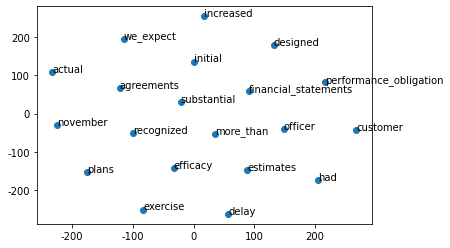

In [ ]:
words_vector_tsne = TSNE(n_components=2).fit_transform(words_vector)  # from high dim to dim = 2

plt.figure()
# plt.rcParams['font.sans-serif'] = ['SimHei'] 
# plt.rcParams['axes.unicode_minus'] = False
plt.scatter(words_vector_tsne[:, 0], words_vector_tsne[:, 1])
for i, vec in enumerate(words_vector_tsne):
    x, y = vec[0], vec[1]
    plt.text(x, y, words_name[i], size=10)
plt.show()  # see if similar words are close